# Step by step guide to accesspr (Version 4.84)

Before starting, make sure of the following

1. Get familiar with the [Swain lab plate reader software/class](http://swainlab.bio.ed.ac.uk/software/platereader/platereader.html).

2. To get the best out of accesspr, I highly recommend getting familiar with [pandas dataframes](http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html#tutorial-modern) and about the [seaborn visualization package](http://stanford.edu/~mwaskom/software/seaborn/index.html) .

3. [Install the seaborn package](http://stanford.edu/~mwaskom/software/seaborn/installing.html)


## About the sample data ##

This dataset was generated to characterise the expression dynamics of hexose transporter Hxt4 in Saccharomyces cerevisiae at different glucose levels.
The transporter was c-terminally tagged with yEGFP in a wild type strain as well in strains with deletions of glucose sensor Rgt2 and repressor Std1.
Cells were grown to stationary phase and put into fresh media with different amounts of glucose.

We aim to compile the results from several experiments. In a  total of 6 experiments, each of which has:

~12 blank (media) wells
3 concentrations X 7 technical replicates X 4 strains--->

* 229.WT- the untagged wild type

* 409.Hxt4- the tagged wild type

* 403.Hxt4std1- the std1 deletion

* 506.Hxt4rgt2- the rgt2 deletion

X 2 biological replicates at least.

As you can see, this dataset is quite complex, and it is not immediately obvious how to approach the data. the complexities include:

* all the data is in the form of time series
* the sampling times of different experiments vary, making it hard to merge biological replicates.

Additionally, you know the contents, but you don't know exactly **what condition is found where**. this makes analysis extremely tedious, especially for repetitive tasks.

plus, these experiments were made by a human and everything that implies.

We start by moving to the folder where accesspr is. then we import pandas, numpy and seaborn and accesspr


In [2]:
cd /Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr 

/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr


In [3]:
from accesspr import *
import platereader as pr
%matplotlib inline


## Paths to data location

In [4]:
homedir= '/Users/s1259407'
dataPath='/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData'


## (optional) Manually importing a plate reader experiment and working with it

Accesspr does not require you to preprocess data, but if you are not familiar with plate reader objects or you'd rather preprocess your data individually, you can save such processing in pickle files* and afterwards use it in accesspr.

pickle files- a way to store your workspace variables in the computer for later use/ long term, just like real pickles.

In [6]:
#folder where we will store the pickles
pickleFileFolder=homedir+'/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/newPickles'

#loading experiments manually and saving the pickles ()

mydir20160212= homedir+dataPath+'/20160212_77_hxt1_hxt2_hxt4'
p20160212=pr.platereader(mydir20160212+'/20160212_77_hxt1_hxt2_hxt4.xlsx', mydir20160212+'/20160212contents.xls')
pickle.dump(p20160212, open(pickleFileFolder+'/p20160212.pkl', 'wb'))

mydir20160629= homedir+dataPath+'/20160629_229_hxt4_std1_rgt2_p2_1_2/'
p20160629=pr.platereader(mydir20160629+'20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet.xlsx', mydir20160629+'20160629contents.xls')
p20160629.ignorewells(['F4', 'E4', 'C10', 'D10', 'E10', 'F10', 'E2', 'F2', 'C8', 'D8' ,'E8', 'F8', 'D11', 'E11', 'F11', 'D3', 'F3', 'E3', 'C9', 'D9', 'E9', 'F9']) ###may wells are not great due to bumps but we cannot afford to remove them.
pickle.dump(p20160629, open(pickleFileFolder+'/p20160629.pkl', 'wb'))


mydir20160630= homedir+dataPath+'/20160630_229_hxt4_std1_rgt2_p2_1_2_rep2/'
p20160630=pr.platereader(mydir20160630+'20160630_229_hxt4_std1_rgt2_p2_1_2_rep2.xlsx', mydir20160630+'20160630contents.xls', asheetnumber=0, dsheetnumber=0)
pickle.dump(p20160630, open(pickleFileFolder+'/p20160630.pkl', 'wb'))


mydir20160701= homedir+dataPath+'/20160701_229_hxt4_std1_rgt2_p4_1_1p5/'
p20160701=pr.platereader(mydir20160701+'20160701_229_hxt4_std1_rgt2_p4_1_1p5.xlsx', mydir20160701+'20160701contents.xls', asheetnumber=0, dsheetnumber=1)
#p20160701.correctauto(refstrain='229.WT')
#p20160701.getstats('all', 'all')
pickle.dump(p20160701, open(pickleFileFolder+'/p20160701.pkl', 'wb'))


mydir20160702= homedir+dataPath+'/20160702_229_hxt4_std1_rgt2_p4_1_1p5/'
p20160702=pr.platereader(mydir20160702+'20160702_229_hxt4_std1_rgt2_p4_1_1p5_rep2.xlsx', mydir20160702+'20160702contents.xls', asheetnumber=0, dsheetnumber=2)
#p20160702.correctauto(refstrain='229.WT')
#p20160702.getstats('all', 'all') ###esterrs=True seems to give me overfitting. 
pickle.dump(p20160702, open(pickleFileFolder+'/p20160702.pkl', 'wb'))


mydir20160703= homedir+dataPath+'/20160703_229_hxt4_std1_rgt2_p6_1_p8/'
p20160703=pr.platereader(mydir20160703+'20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1.xlsx', mydir20160703+'20160703contents.xls')
#p20160703.correctauto(refstrain='229.WT')
#p20160703.getstats()
pickle.dump(p20160703, open(pickleFileFolder+'/p20160703.pkl', 'wb'))


mydir20160704= homedir+dataPath+'/20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2/'
p20160704=pr.platereader(mydir20160704+'20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2.xlsx', mydir20160704+'20160704contents.xls')
p20160704.ignorewells(['H1', 'H2', 'H3'])
#p20160704.correctauto(refstrain='229.WT')
#p20160704.getstats('all', 'all', esterrs=True)
pickle.dump(p20160704, open(pickleFileFolder+'/p20160704.pkl', 'wb'))

#successfully created  a lot of pickle files each containing an experiment!




Platereader 4.84 : loading data

/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160212_77_hxt1_hxt2_hxt4/20160212_77_hxt1_hxt2_hxt4
---
Conditions:
	 Glu 0.2%
	 Glu 0.4%
	 Glu 0.6%
	 Glu 0.8%
	 Glu 1%
	 Glu 1.5%
	 Glu 2%
Strains:
	 WT
	 Hxt1
	 Hxt2
	 Hxt4
	 null
Data types:
	 OD
	 GFP        (gain 100)
	 AutoFL     (gain 100)
Ignored wells:
	 None
Platereader 4.84 : loading data

/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160629_229_hxt4_std1_rgt2_p2_1_2/20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet
---
Conditions:
	 Glu 0.2%
	 Glu 1%
	 Glu 2%
Strains:
	 229.WT
	 409.Hxt4
	 403.Hxt4std1
	 506.Hxt4rgt2
	 null
Data types:
	 OD
	 GFP        (gain 100)
	 AutoFL     (gain 100)
Ignored wells:
	 None
Ignoring well E4
Ignoring well F4
Ignoring well C10
Ignoring well D10
Ignoring well E10
Ignoring well F10
Ignoring well E2
Ignoring well F2
Ignori

## Overview of a particular experiment
This function from prPlottingFunctions is very handy. It allows you to visualise the content of a particular 
experiment.

Accesspr imported a few packages and features already, including the function file prPlottingFunctions. it is imported as ppf


/Users/s1259407/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


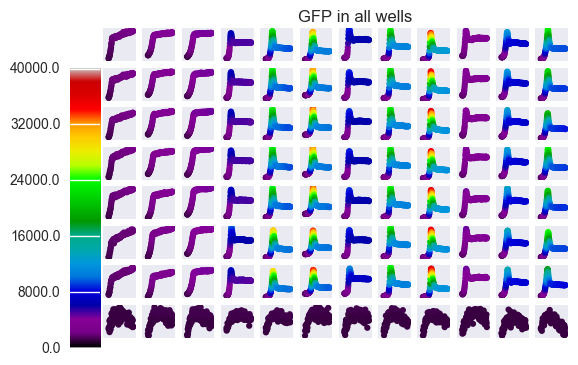

In [7]:
axarray=ppf.experimentOverview(p20160702, dtype='GFP', colormap='spectral', colorMapRange=[0, 40000] )

## optional: Importing from scratch and processing data

In the code below we both import and do basic processing of the experiments:
a) ignore faulty wells
b) get growth rate statistics by fitting a gaussian process
c) correct autofluorescence by spectral unmixing.
d) dump the processed files into the folder processedPickles.

#Note. the block has been disabled to avoid accidental processing as this demo comes with ready processed files.
enable it by switching the block into code


# Create an accesspr object with all your data

We can import data in 3 main ways:


a) raw data: provide a path or list of paths with folders, each of which contain at data sheet and a contents sheet (the file must say 'contents' somewhere on it.
files that are not complete like this won't be imported.

b) a path or list of paths to folders containing pickle files. the pickle files can be immediately there or one level inside the folders given.

c) a combination of the above.
# Declaring consensus fluroescence(s)

The experiments you import may have one shared fluorescence channel, or each may have  different channel names, all which correspond to main/same fluorescence. Provide the FL argument if you want a channel or list of channels to be extracted as a general FL variable. For more information, check out the section on extracting data and the method xpr.makedataframe().
Not assigning anything will default to GFP. 


If you don't care about fluorescence you can specify analyseFL=False, but it won't affect you that much if you don't do it. 


### for example, 
FL=['GFP', 'G_F_P', 'GFP80'] will first assign GFP if it finds it,if not then 'G_F_P' and so on.




In [1]:
#for unprocessed pickles
pickleFileFolder=homedir+'/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/newPickles'
#for processed pickles.
#pickleFileFolder=homedir+'/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/processedPickles'


#either do... for raw experiments. for more than one dir do [dir1, dir2...]
#hxtfolder='/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/hxtmutantCollection'    


xpr=accesspr(homedir+dataPath, FL='GFP')
#or do...for pre existing pickles|
#xpr=accesspr(pickleFileFolder, FL='GFP')
#

#print(xpr.statContents)




NameError: name 'homedir' is not defined

Now, to know everything we can do with accesspr, we do...

In [21]:
help(xpr)

Help on accesspr in module accesspr object:

class accesspr(builtins.object)
 |  accesspr version 4.81(the number matches with that of the compatible platereader software version)
 |  
 |  accesspr is a class that allows to integrate and organize the information
 |  from many plate reader experiments to produce publication-grade plots and tables. 
 |  To fully understand the functionality of accesspr, it is ideal
 |  to learn about pandas (especially dataframes) and the seaborn graphics package. 
 |  
 |  ***Newest FEATURES***
 |  self.assignFL() now receives a list of many potential main fluorescence channel names and you can provide a list of experiments.
 |  self.getvariables() call this to update all variables available at least once i all your experiment colleciton.
 |  self.makedataframe() can now extract information robustrly across all experiments in scalar or 2 time formats. 
 |  self.allreplicates contains the condition in every well in every experiment
 |  self.plotReplicate

## Dealing with impossible-to-load experiments
Giving the path of the raw data assembles the data automatically and creates plate reader objects from scratch for each folder. 

Ocasionally there will be trouble importing some experiments. if that is the case you wil find the xpr.failedfiles dicitonary, which will tell you exactly which experiments couldn't be opened.



In [49]:
xpr.failedfiles


[]

# Exploring your dataset

## Where to find the data

xpr.data= dictionary of platereader instances (the experiments that were loaded).
The keys are each experiment's name, and the values are pr objects of each experiment. This means you have full access to the experiments you provided


## Useful lists

xpr.allstrains - all the strains in every experiment

xpr.allmedia - all the media (conditions) in every experiment

xpr.allexperiments- list of all the experiments

xpr.machines - the ID of the machine that ran the experiment. To make this make sure to incorporate your own serial number and give it an ID

xpr.extractionFieldsScalar -variables useful for data extraction, particularly those that are a single number. this list gets generated by the method xpr.getvariables.

xpr.extractionFieldsTime- variables useful for data extraction, particularly those that are a single number. This list gets generated by the mthod xpr.getvariables.

## Useful dataframes to explore your dataset

xpr.statcontents - dataframe that indicates what fraction (0< p< 1) of the experiment contains a given statistic. all the time varying statistics of the experiment.(add more statistics using  xpr.containsstat(stat). when a stat is not found in any experiment, it is not added).

xpr.allreplicates - description of every well in terms of experiment media, strain, plate coordinates (plateloc)

xpr.allcontents - similar to above, just that plateloc is a list of all the wells with this condition.

xpr.numReplicates - how many biological replicates there is per condition.

xpr.conditionLocTable - dataframe of 0s and 1s declaring relating conditions to experiments.(you make numReplicates from this one). can allow you to not 

## finding what experiments contain a specific condition

xpr.containssetup(media,strain) will give you a list of experiments that contain such condition


## Overviewing the contents of the experiments

We will quickly screen the contents of the experiments.

First we list the content, then we check if any experiment has mCherry with xpr.containsstat(stat)

then we retrieve the entire list of statistics found in the experiment, saved in xpr.statcontents.  the method xpr.containsstat will update this table as long as one of the expeirments contains the desired condition. We will find that mCherry was not added because mCherry is absent from all experiments, so no point adding it in the first place. 




In [50]:
#displaying contents per experiment. 
#it also indexes all the experiments and collects information about their data
xpr.listcontents()

xpr.containsstat('mCherry')
#see a dataframe of statistics
xpr.statcontents

xpr.machines



Scalar variables registered (found in self.extractionFieldsScalar:


Time-varying variables registered (found in self.extractionFieldsTime:




Experiment (20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2) contains:
------------------ 

Medium (Glu 0.8%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 1%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 0.6%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,


Experiment (20160701_229_hxt4_std1_rgt2_p4_1_1p5) contains:
------------------ 

Medium (Glu 1%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 1.5%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 0.4%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,


Experiment (20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1) contains:
------------------ 

Medium (Glu 0.8%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 1%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 0.6%): 
229.W

{'20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet': 'Plate Reader 2',
 '20160630_229_hxt4_std1_rgt2_p2_1_2_rep2': 'Plate Reader 2',
 '20160701_229_hxt4_std1_rgt2_p4_1_1p5': 'Plate Reader 2',
 '20160702_229_hxt4_std1_rgt2_p4_1_1p5_rep2': 'Plate Reader 2',
 '20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1': 'Plate Reader 2',
 '20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2': 'Plate Reader 2'}

## Ignoring and only choosing certain experiments.


## ignoreFiles
If there are experiments you wish to not import or deal with,  povide a list of experiment names ignoreFiles=[filename1, filename2]

I you notice, the p20160212.pkl experiment does not have strains with the names or strains we expected, other than hxt4. 
As we are not interested in these strains for now, we just ignore the file. 

## onlyFiles
if there is one or a some experiments that you'd rather only import instead of the whole cohort, you can also nclude such list of experiments in onlyFiles.

In [73]:
xpr=accesspr(pickleFileFolder, ignoreFiles=['p20160212.pkl'], FL='GFP', FLperod='c-GFPperod')
xpr.statcontents
xpr.data



trying to import .DS_Store
trying to import p20160212.pkl
trying to import p20160629.pkl
trying to import p20160630.pkl
trying to import p20160701.pkl
trying to import p20160702.pkl
trying to import p20160703.pkl
trying to import p20160704.pkl
Scalar variables registered (found in self.extractionFieldsScalar:


Time-varying variables registered (found in self.extractionFieldsTime:


Scalar variables registered (found in self.extractionFieldsScalar:
ignoredwells
plateloc

Time-varying variables registered (found in self.extractionFieldsTime:
AutoFL
AutoFL mean
AutoFL var
GFP
GFP mean
GFP var
OD
OD mean
OD var
time

aligning experiment  20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2
aligning experiment  20160701_229_hxt4_std1_rgt2_p4_1_1p5
aligning experiment  20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1
aligning experiment  20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet
aligning experiment  20160630_229_hxt4_std1_rgt2_p2_1_2_rep2
aligning experiment  20160702_229_hxt4_std1_rgt2_p4_1_1p5_rep2
Proble

{'20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet': <platereader.platereader at 0x11e26eba8>,
 '20160630_229_hxt4_std1_rgt2_p2_1_2_rep2': <platereader.platereader at 0x11f72bac8>,
 '20160701_229_hxt4_std1_rgt2_p4_1_1p5': <platereader.platereader at 0x11eaa1240>,
 '20160702_229_hxt4_std1_rgt2_p4_1_1p5_rep2': <platereader.platereader at 0x1213966a0>,
 '20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1': <platereader.platereader at 0x11e8a2828>,
 '20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2': <platereader.platereader at 0x11eac86d8>}

## Reassigning experiments'  default Fluorescence channels

Each experiment is, by default, assigned the fluorescence channels that were either defined during the creation of the xpr object or is assigned a channel based on a channel that is present in all the experiments. This channel and its channelperod will ultimately be used for data extraction, so if you want to change what channel to be extracted from what experiment you can modify by accessing the xpr.FL dictionary, and re-entering the xpr.FL[expt]['mainFL']  or xpr.FL[expt]['mainFLperod'] for a particular eperiment. <b>Only reassign channels when you are completely sure of what you are doing</b>. 

## Why this is useful

Sometimes we have experiments with the same fluorescence recorded at different gains, or you transformed the data in some channel to be comparable across experiments. by using this structure you will avoid special treatment of those special circumstances every single time you call the experiment. 

In [63]:
#you can call the function xpr.assignFL
#see what happens when you change GFP for AutoFL. But once you check, bring it back to GFP!

xpr.assignFL(mainFL=['GFP'])


xpr.FL

{'20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var'},
 '20160630_229_hxt4_std1_rgt2_p2_1_2_rep2': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var'},
 '20160701_229_hxt4_std1_rgt2_p4_1_1p5': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var'},
 '20160702_229_hxt4_std1_rgt2_p4_1_1p5_rep2': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var'},
 '20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var'},
 '20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var'}}

# Data processing

Processing of the plate reader data involves 4 steps. 


1) Data curation
This step involves general inspection of the data to make sure its quality is acceptable. 

Normally this involves plotting raw data, ignoring wells with faulty growth, fixing the presence of NaNs in some curves or outright  removal of faulty experiments.

2) correcting OD

In the plate reader, the Measured OD does not correspond to real OD because the OD measurements saturate at 1.4. therefore the OD has to be transformed undergo a non linear transformation get a more accurate estimat.

3) correcting autofluorescence
Yeast cells have a natural autofluorescence that changes over time. correcting Fluorescence processes the fluorescence such that the autofluorecence of untagged strains is zero.

4) calculating growth statistics using gaussian processes
to estimate statistics like the growth rate, the derivative of growth rate, lag time 


## Accessing experiments and Running plate reader routines within accesspr

As the xpr.statcontents dataframe indicates above, we notice NaNs in the c-GFPperod field above, we can run correctauto individually for each of them in order to analyse them. Then we check how the statContents has been updated.



# Applying a linear transformation to a channel
(note: this way of doing transformations will soon be replaced for something better. It will be worth the wait)
## Why and when you should care about this

a) Fluoresence data coming from different plate readers and different gains will provide the same information, but there will often be differences in the  'scale' of the signal for these reasons. i.e. the highest fluorescence reached for a the same protein may be 1000 in one experiment but 100000  in others, even though they are replicates. 

The plate reader analysis routines will give you a lot of trouble if you have Nans in there.

b)the data that you have for one gain (for example GFP100) may have overflowed and give you NaNs for this reason. But your daata of the same strain at another gain (GFP60) may be unscathed. yet all your experiments are often at GFP80. 

## How to do it

You can do 2 things assuming the mapping is linear:

a) transform the data of stat  with by scaling or shifting it:

transfromStat(xpr.data[expt], stat, scale, shift, genericLabel=True)

this will create a field called 'transformedstat', with the transformed data. if genericLabel==False, then the field name will be 'statxscale+shift'


b) For each condition in an experiment, find a linear fit between stat1 and stat2 (say, 2 gains), and transform stat1 using that linear fit to create 'transformedstat1'. 

fitDF=transformEach(xpr.data[expt], stat1, stat2, genericLabel=True, plot=False, report=True, jointplot=False): ##performs a linear transformation tailored to every individual channel. if plot is True, you get a scatterplot of slopes and intercepts for each condition, coloured by the R square of that fit. returns a dataframe with the fits for each of the conditions. 


c) replaceStat. replace the values of one channel with another. the default channel to substitute is 'transformedstat'

replaceStat(xpr.data[expt], stat,replaceWith=0, genericLabel=True, excludeNull=True)



In [11]:
#transforming GFP in this experiment, scaling by 2 and shifting by 4
#create transformedGFP channel with such transformation
exptname='20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet'

ppf.transformStat(xpr.data[exptname], stat='GFP',scale=2, shift=4) ##transforming the GFP channel

xpr.data[exptname].d['Glu 2%']['229.WT']['transformedGFP']

##find the linear transformation parameters between 2 channels 
##we will see if we can retrieve the transformation we applied.

d=transformEach(xpr.data[exptname], 'GFP', 'transformedGFP', plot=True)# now inferring the fit between GFP and the transformed channel
##we are able to recover the fit of the traansformed data very well
d.head()

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


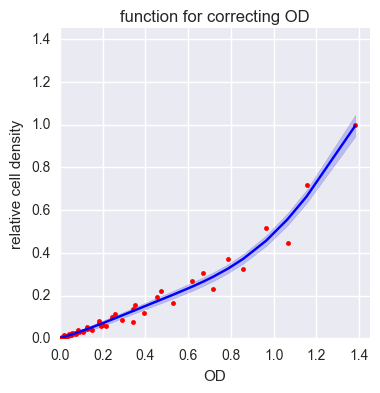

Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.2%


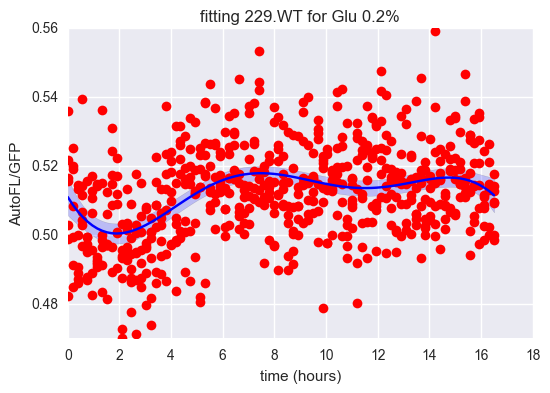

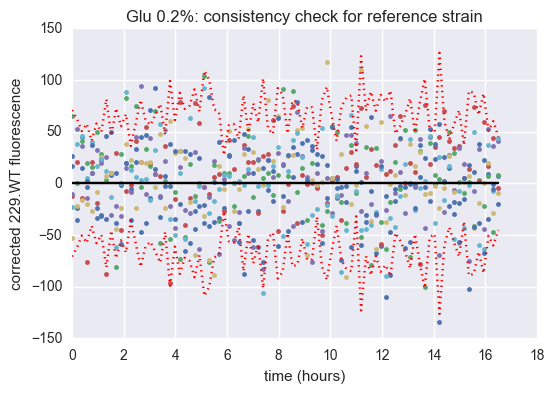

Processing reference strain for GFP in Glu 1%


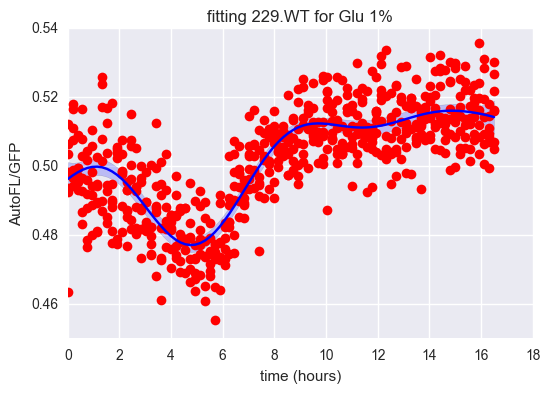

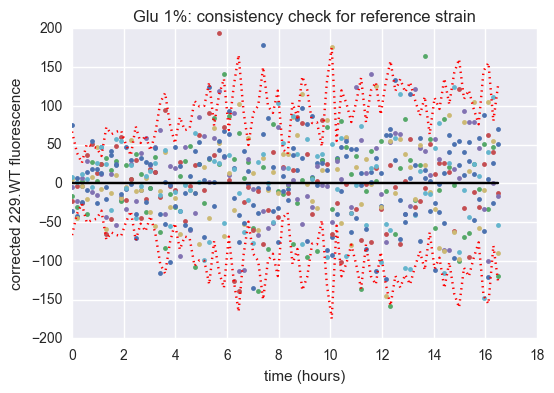

Processing reference strain for GFP in Glu 2%


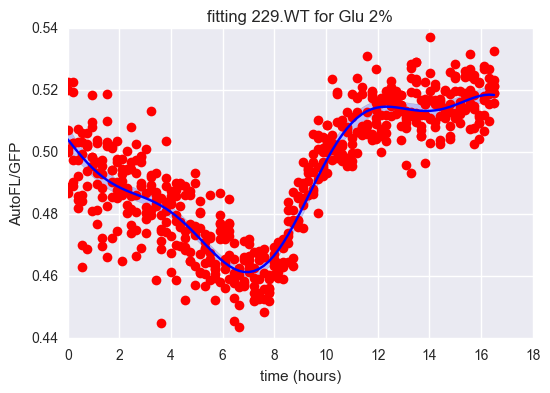

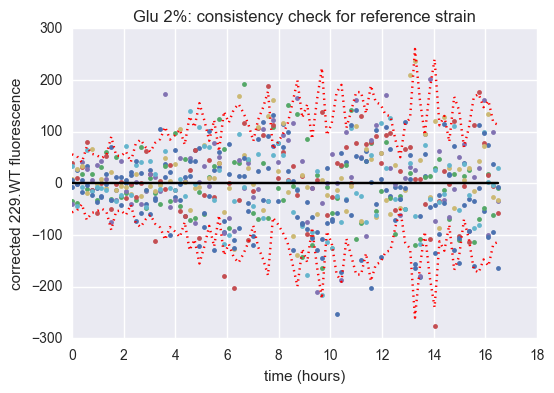

Reference strain is already processed for GFP in Glu 1%
Reference strain is already processed for GFP in Glu 2%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)
	sc-GFPperod (only statistically significant corrected fluorescence per cell)
	sc-GFP (only statistically significant corrected fluorescence)
Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


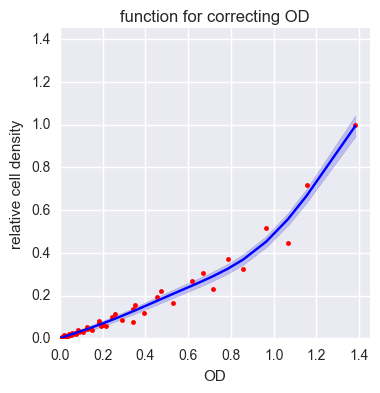

Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.2%


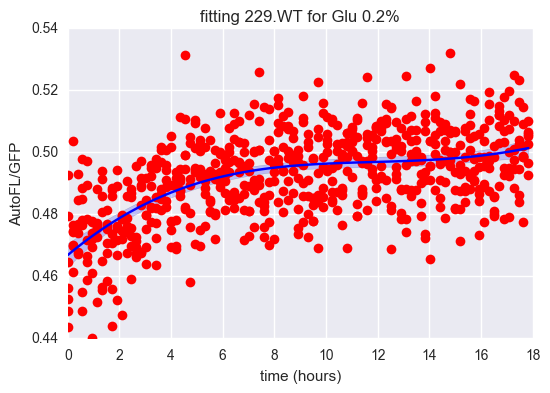

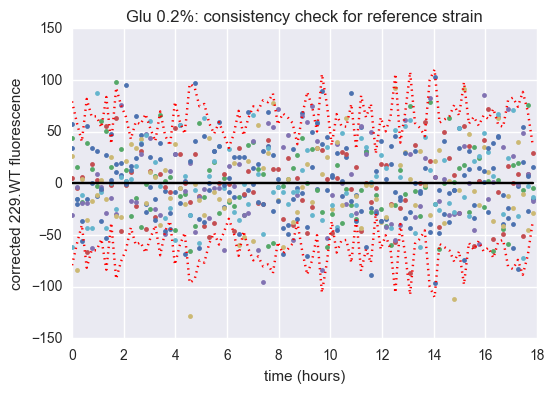

Processing reference strain for GFP in Glu 1%


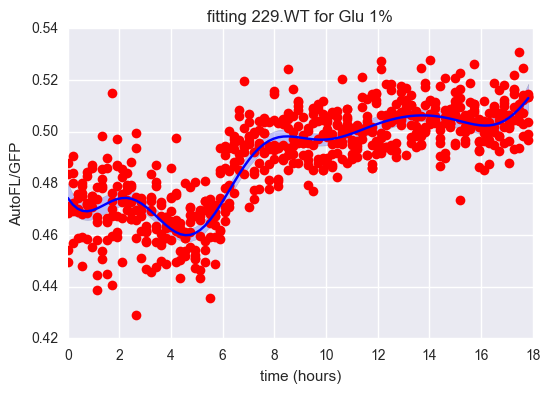

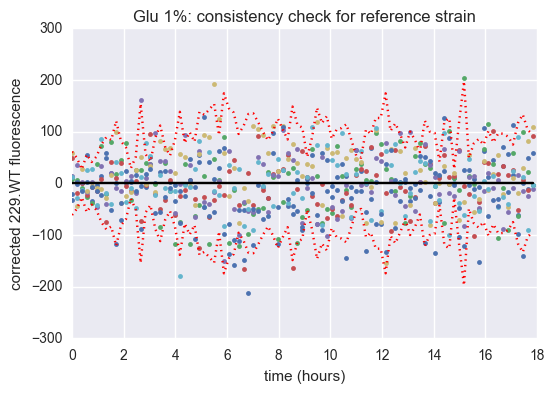

Processing reference strain for GFP in Glu 2%


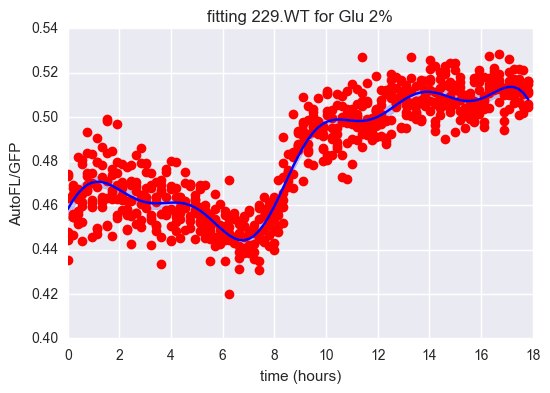

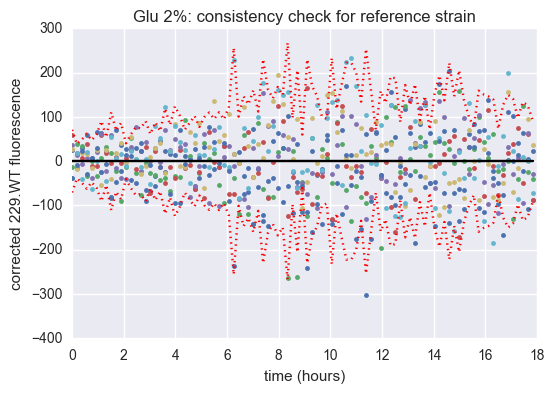

Reference strain is already processed for GFP in Glu 1%
Reference strain is already processed for GFP in Glu 2%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)
	sc-GFPperod (only statistically significant corrected fluorescence per cell)
	sc-GFP (only statistically significant corrected fluorescence)
Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


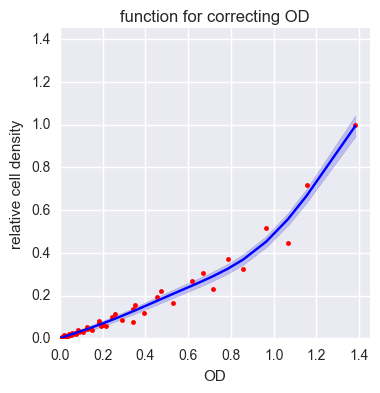

Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.6%


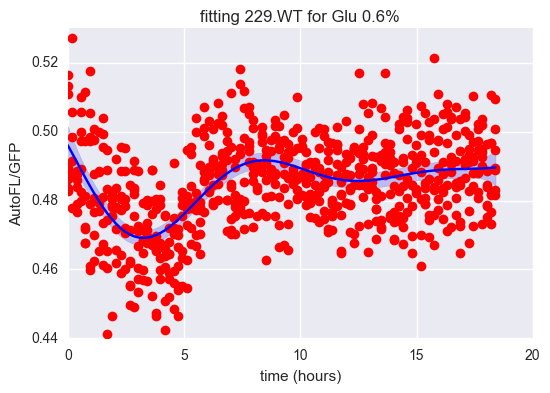

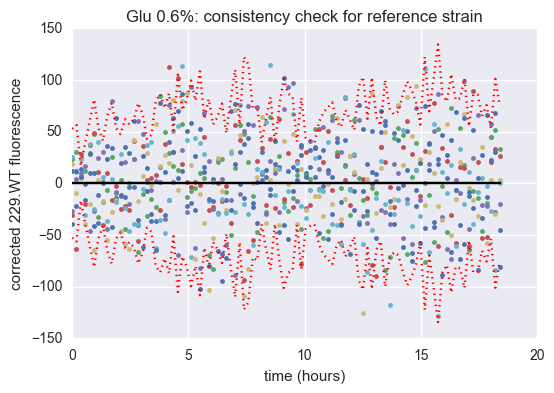

Processing reference strain for GFP in Glu 0.8%


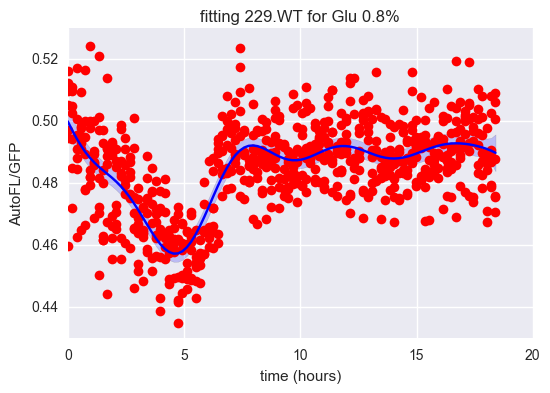

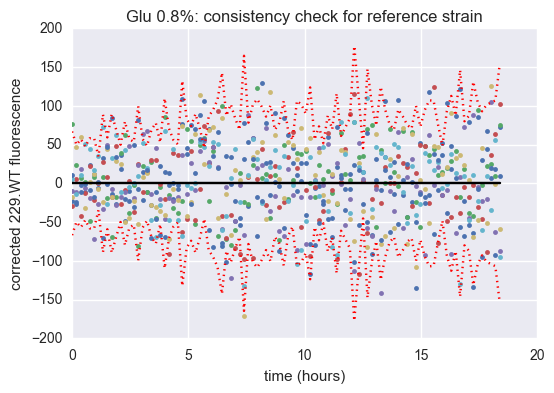

Processing reference strain for GFP in Glu 1%


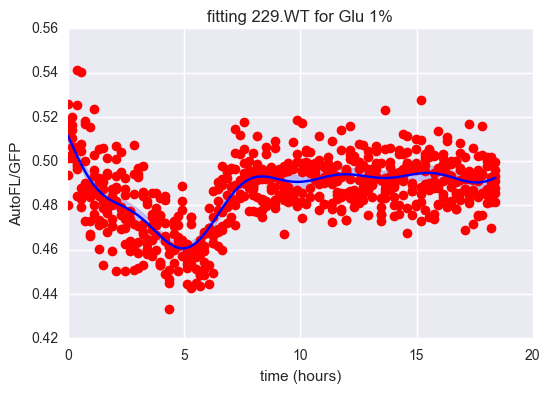

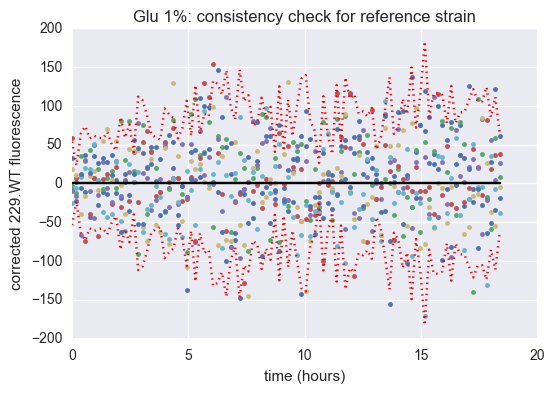

Reference strain is already processed for GFP in Glu 0.8%
Reference strain is already processed for GFP in Glu 1%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)
	sc-GFPperod (only statistically significant corrected fluorescence per cell)
	sc-GFP (only statistically significant corrected fluorescence)
Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


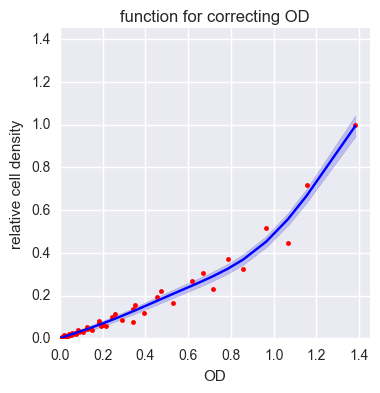

Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.2%


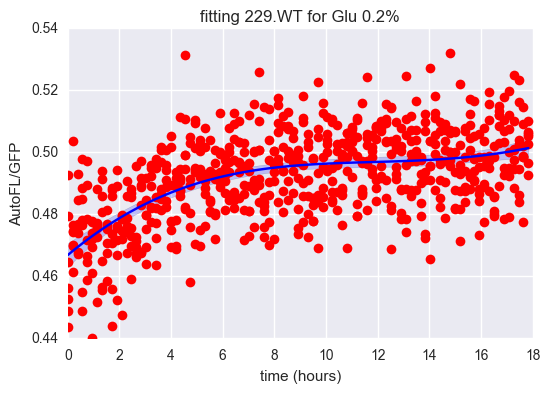

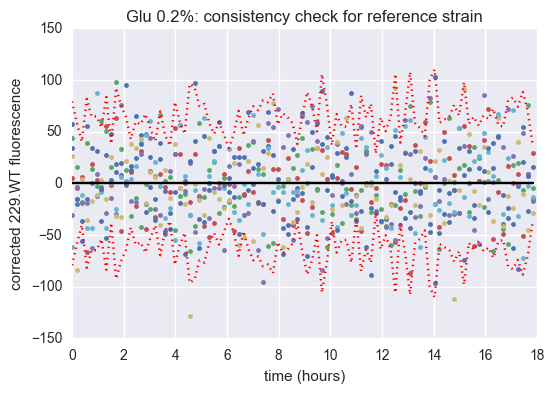

Processing reference strain for GFP in Glu 1%


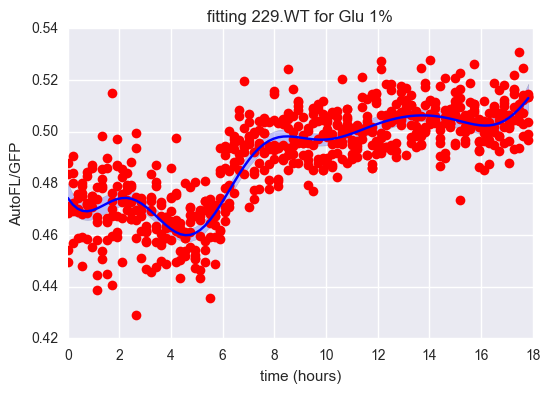

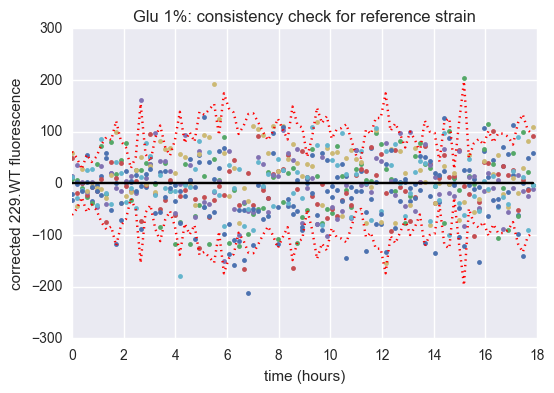

Processing reference strain for GFP in Glu 2%


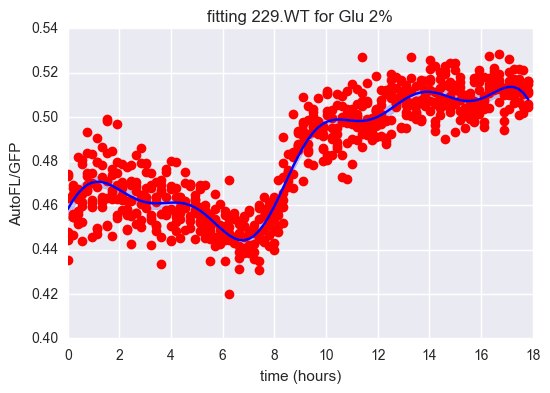

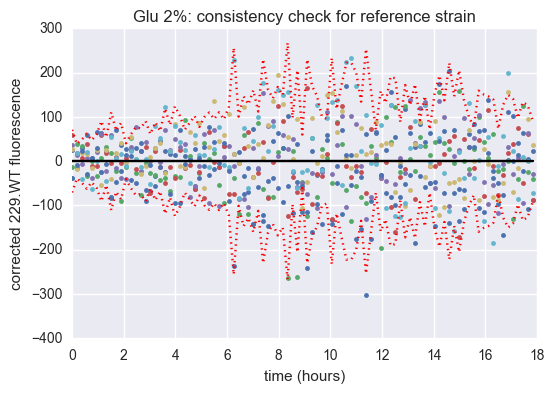

Reference strain is already processed for GFP in Glu 1%
Reference strain is already processed for GFP in Glu 2%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)
	sc-GFPperod (only statistically significant corrected fluorescence per cell)
	sc-GFP (only statistically significant corrected fluorescence)
Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


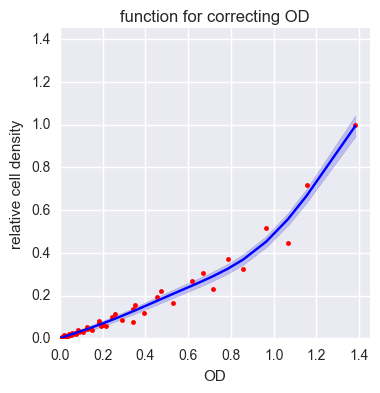

Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.6%


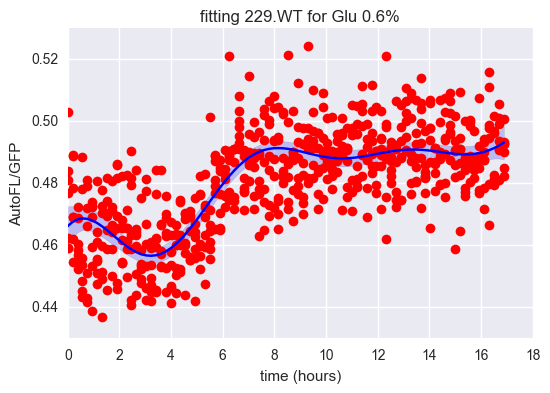

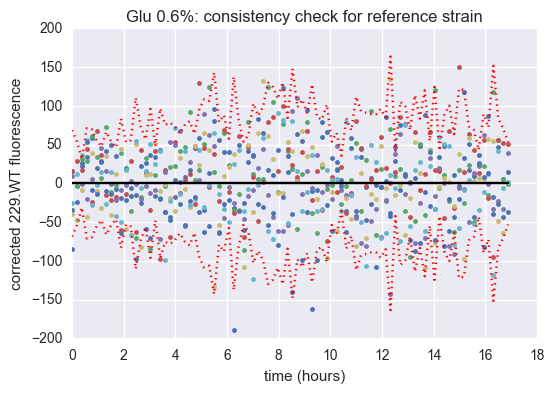

Processing reference strain for GFP in Glu 0.8%


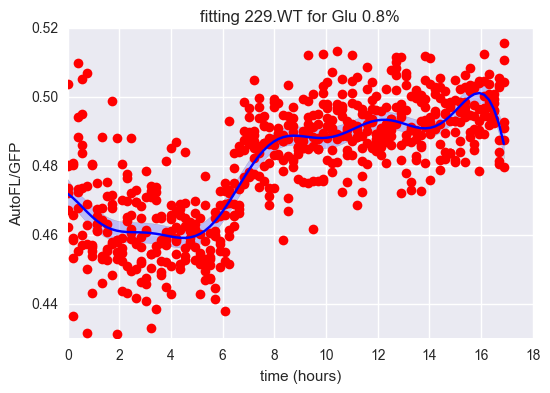

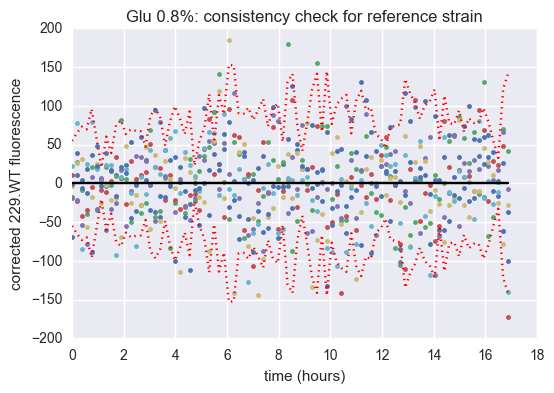

Processing reference strain for GFP in Glu 1%


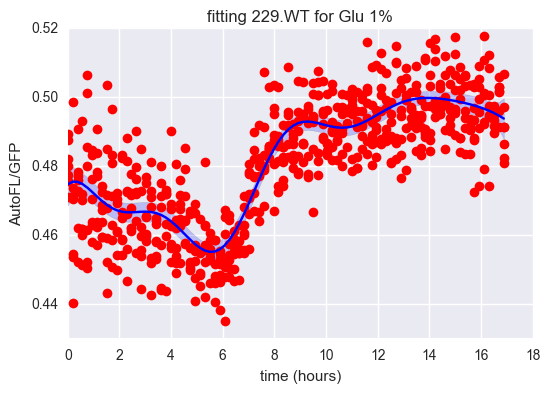

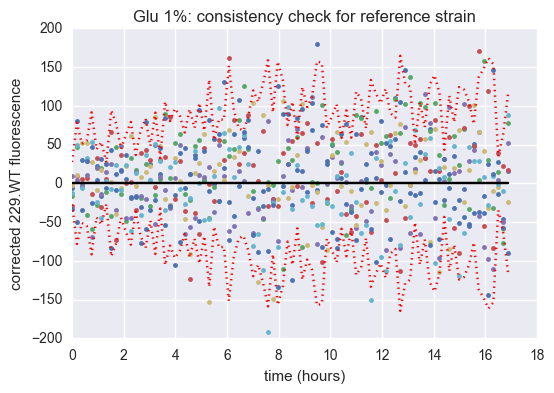

Reference strain is already processed for GFP in Glu 0.8%
Reference strain is already processed for GFP in Glu 1%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)
	sc-GFPperod (only statistically significant corrected fluorescence per cell)
	sc-GFP (only statistically significant corrected fluorescence)
Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


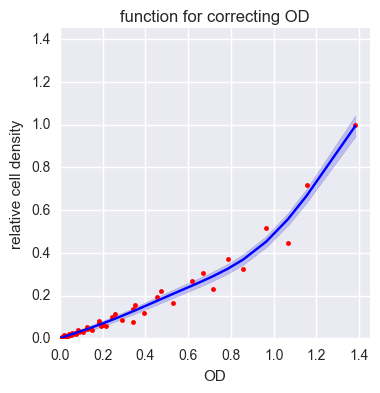

Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.2%
229.WT not found in Glu 0.2%


SystemExit: Running correctauto failed

/Users/s1259407/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
#expt='p20160630.pkl'
#xpr.correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT', correctmedia=False, mediausemean=True)

for expt in xpr.allexperiments:
   xpr.data[expt].correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT', correctmedia=False, mediausemean=True)
    

#xpr.listcontents()


In [87]:

xpr.data[exptname].d['Glu 2%']['229.WT']

{'AutoFL': array([[  380.,   397.,   387.,   402.],
        [  396.,   385.,   382.,   403.],
        [  396.,   397.,   410.,   417.],
        [  395.,   432.,   405.,   430.],
        [  420.,   426.,   435.,   431.],
        [  433.,   459.,   451.,   430.],
        [  435.,   456.,   451.,   459.],
        [  462.,   474.,   465.,   469.],
        [  509.,   486.,   500.,   511.],
        [  514.,   522.,   514.,   493.],
        [  505.,   548.,   517.,   526.],
        [  526.,   553.,   544.,   533.],
        [  564.,   544.,   559.,   558.],
        [  578.,   597.,   585.,   557.],
        [  578.,   642.,   600.,   592.],
        [  632.,   635.,   616.,   627.],
        [  660.,   678.,   673.,   652.],
        [  675.,   697.,   672.,   697.],
        [  698.,   729.,   715.,   709.],
        [  746.,   759.,   771.,   720.],
        [  768.,   797.,   769.,   795.],
        [  846.,   843.,   816.,   795.],
        [  857.,   891.,   849.,   855.],
        [  904.,   896.,

In [85]:
p

## Calculating growth statistics in batch for all the experiments.


you can call the getstats agument to do gaussian process fitting of your data. 

It will run for every experiment  in the list using the same parameters.


Fitting OD for 409.Hxt4 in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.466002e+03
hparam[0]= 1.972518e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.335902e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 9.226175e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.913153e-01 +/- 2.763378e-03 [2.763378e-04]
 time of max growth rate= 1.879571e+00 +/- 5.427119e-02 [5.427119e-03]
           doubling time= 3.623815e+00 +/- 5.216564e-02 [5.216564e-03]
                  max OD= 6.409045e-01 +/- 2.008273e-03 [2.008273e-04]
                lag time= 1.001898e+00 +/- 2.134574e-02 [2.134574e-03]


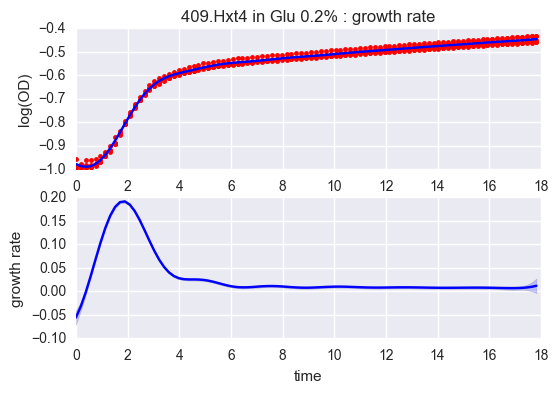


Fitting OD for 403.Hxt4std1 in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.252849e+03
hparam[0]= 3.292437e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.315385e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 5.282272e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.639548e-01 +/- 2.087280e-03 [2.087280e-04]
 time of max growth rate= 2.274048e+00 +/- 1.886883e-02 [1.886883e-03]
           doubling time= 4.228356e+00 +/- 5.377670e-02 [5.377670e-03]
                  max OD= 6.027495e-01 +/- 1.378471e-03 [1.378471e-04]
                lag time= 1.093815e+00 +/- 1.924639e-02 [1.924639e-03]


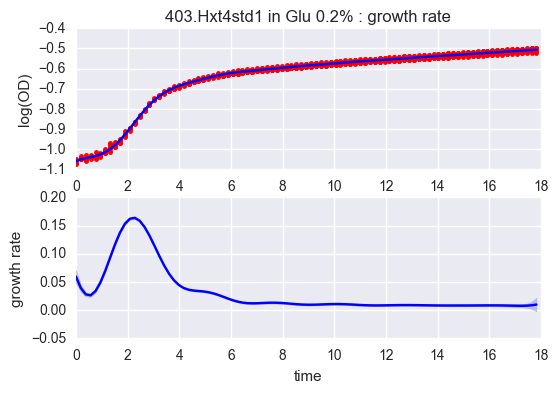


Fitting OD for 506.Hxt4rgt2 in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 7.924798e+02
hparam[0]= 1.726503e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.728238e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.571857e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.824408e-01 +/- 3.361150e-03 [3.361150e-04]
 time of max growth rate= 1.727860e+00 +/- 5.933607e-02 [5.933607e-03]
           doubling time= 3.800588e+00 +/- 6.999600e-02 [6.999600e-03]
                  max OD= 6.594864e-01 +/- 3.453725e-03 [3.453725e-04]
                lag time= 1.006789e+00 +/- 3.985210e-02 [3.985210e-03]


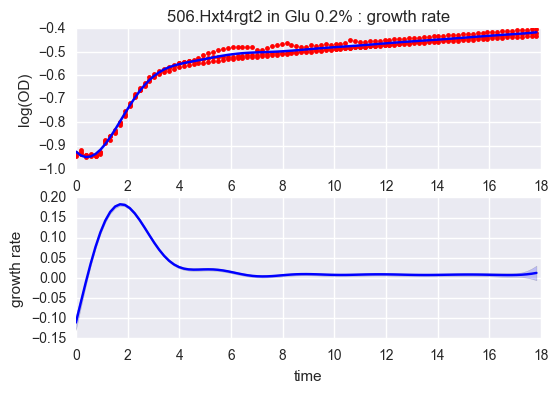


Fitting OD for null in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.061546e+03
hparam[0]= 3.837566e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 6.517358e-04 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.995360e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= -2.964129e-04 +/- 3.977246e-04 [3.977246e-05]
 time of max growth rate= 1.298167e+01 +/- 2.226479e+00 [2.226479e-01]
           doubling time= -2.656122e+03 +/- 4.122032e+04 [4.122032e+03]
                  max OD= 8.908177e-02 +/- 2.324875e-04 [2.324875e-05]
                lag time= -1.371046e+02 +/- 2.334937e+03 [2.334937e+02]


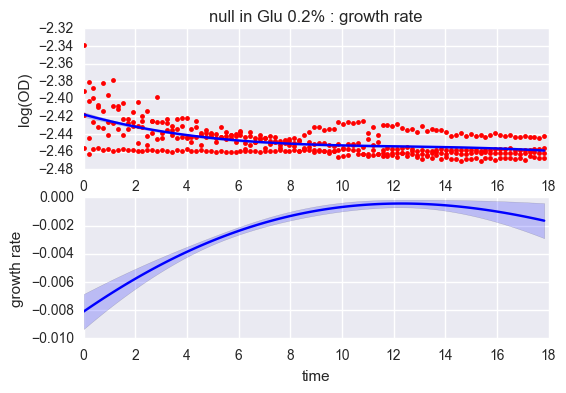


Fitting OD for 229.WT in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.399682e+03
hparam[0]= 2.058736e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.768966e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.341260e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.926599e-01 +/- 1.863460e-03 [1.863460e-04]
 time of max growth rate= 1.739239e+00 +/- 7.123459e-02 [7.123459e-03]
           doubling time= 3.598113e+00 +/- 3.477523e-02 [3.477523e-03]
                  max OD= 6.601555e-01 +/- 1.311216e-03 [1.311216e-04]
                lag time= 9.084934e-01 +/- 1.275553e-02 [1.275553e-03]


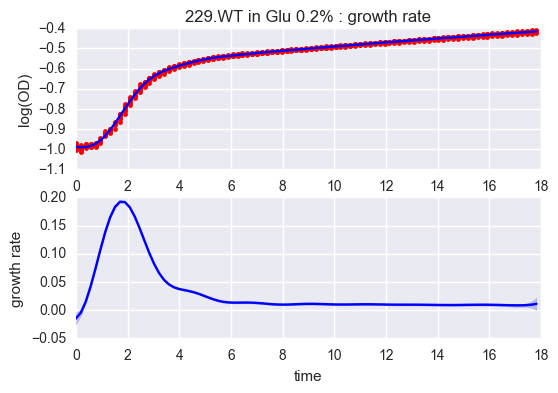


Fitting OD for 409.Hxt4 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.065130e+03
hparam[0]= 1.134000e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.584626e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 9.944781e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.378701e-01 +/- 1.764170e-03 [1.764170e-04]
 time of max growth rate= 2.520587e+00 +/- 8.606354e-02 [8.606354e-03]
           doubling time= 2.914133e+00 +/- 2.161227e-02 [2.161227e-03]
                  max OD= 9.958387e-01 +/- 1.874919e-03 [1.874919e-04]
                lag time= 1.103830e+00 +/- 1.782751e-02 [1.782751e-03]


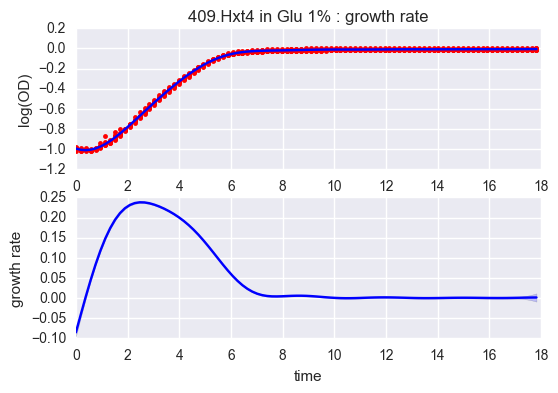


Fitting OD for 403.Hxt4std1 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 8.806048e+02
hparam[0]= 1.527750e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.537998e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 8.397078e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.958488e-01 +/- 2.398172e-03 [2.398172e-04]
 time of max growth rate= 3.195739e+00 +/- 1.428717e-01 [1.428717e-02]
           doubling time= 3.539727e+00 +/- 4.347548e-02 [4.347548e-03]
                  max OD= 9.452662e-01 +/- 2.383629e-03 [2.383629e-04]
                lag time= 1.320836e+00 +/- 2.685458e-02 [2.685458e-03]


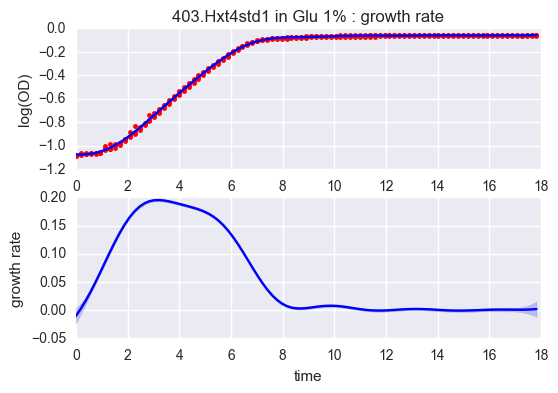


Fitting OD for 506.Hxt4rgt2 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.322993e+03
hparam[0]= 9.243191e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.037297e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.994680e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.554883e-01 +/- 1.744176e-03 [1.744176e-04]
 time of max growth rate= 2.494033e+00 +/- 6.772455e-02 [6.772455e-03]
           doubling time= 2.713156e+00 +/- 1.854237e-02 [1.854237e-03]
                  max OD= 1.024160e+00 +/- 1.514389e-03 [1.514389e-04]
                lag time= 1.244954e+00 +/- 1.356680e-02 [1.356680e-03]


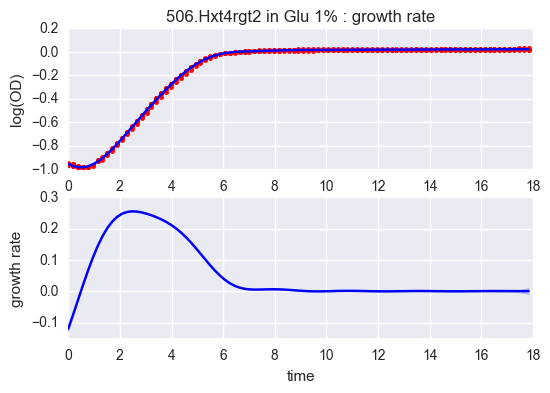


Fitting OD for null in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.138383e+03
hparam[0]= 3.699937e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 5.691716e-04 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.329262e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.718331e-04 +/- 5.046440e-04 [5.046440e-05]
 time of max growth rate= 1.506780e+01 +/- 1.984600e+00 [1.984600e-01]
           doubling time= -2.939750e+03 +/- 1.113817e+04 [1.113817e+03]
                  max OD= 8.927203e-02 +/- 1.838888e-04 [1.838888e-05]
                lag time= -1.587645e+02 +/- 6.563296e+02 [6.563296e+01]


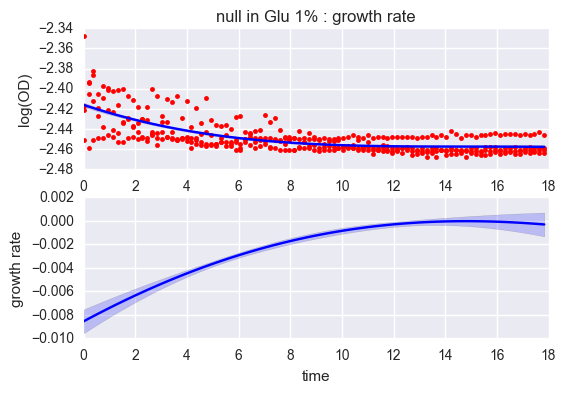


Fitting OD for 229.WT in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.481962e+03
hparam[0]= 1.165305e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.541590e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 9.116037e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.379945e-01 +/- 1.840553e-03 [1.840553e-04]
 time of max growth rate= 2.499723e+00 +/- 7.286755e-02 [7.286755e-03]
           doubling time= 2.912624e+00 +/- 2.244237e-02 [2.244237e-03]
                  max OD= 9.871227e-01 +/- 2.068830e-03 [2.068830e-04]
                lag time= 1.061452e+00 +/- 1.831311e-02 [1.831311e-03]


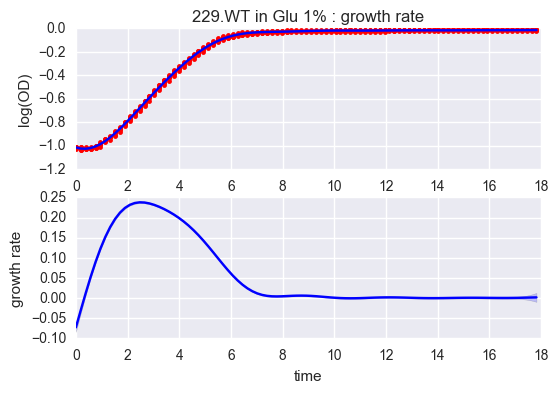


Fitting OD for 409.Hxt4 in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.494950e+03
hparam[0]= 1.396465e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.797063e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 2.615270e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.445415e-01 +/- 1.139204e-03 [1.139204e-04]
 time of max growth rate= 2.459894e+00 +/- 3.234997e-02 [3.234997e-03]
           doubling time= 2.834538e+00 +/- 1.319973e-02 [1.319973e-03]
                  max OD= 1.207700e+00 +/- 1.233888e-03 [1.233888e-04]
                lag time= 1.132384e+00 +/- 7.689965e-03 [7.689965e-04]


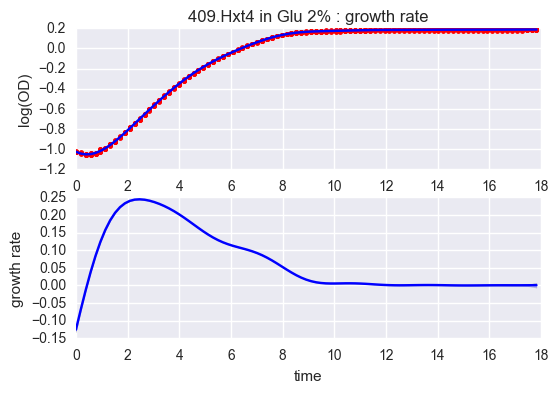


Fitting OD for 403.Hxt4std1 in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 8.533090e+02
hparam[0]= 1.686912e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 8.309393e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.100287e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.993542e-01 +/- 1.800928e-03 [1.800928e-04]
 time of max growth rate= 3.421419e+00 +/- 7.054974e-02 [7.054974e-03]
           doubling time= 3.477246e+00 +/- 3.135959e-02 [3.135959e-03]
                  max OD= 1.168944e+00 +/- 3.174937e-03 [3.174937e-04]
                lag time= 1.353762e+00 +/- 3.036104e-02 [3.036104e-03]


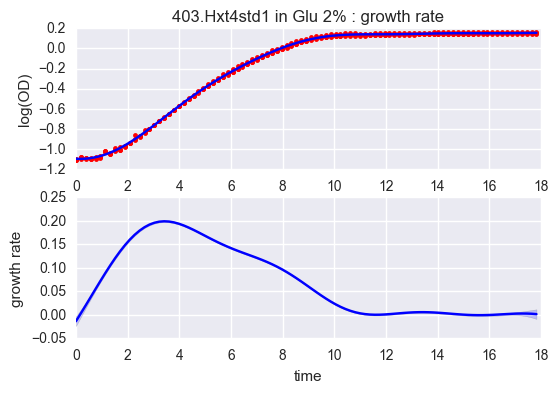


Fitting OD for 506.Hxt4rgt2 in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.378700e+03
hparam[0]= 1.251627e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.986343e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.721426e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.603409e-01 +/- 1.280727e-03 [1.280727e-04]
 time of max growth rate= 2.619213e+00 +/- 7.440640e-02 [7.440640e-03]
           doubling time= 2.662524e+00 +/- 1.308341e-02 [1.308341e-03]
                  max OD= 1.256142e+00 +/- 1.411057e-03 [1.411057e-04]
                lag time= 1.262018e+00 +/- 9.414086e-03 [9.414086e-04]


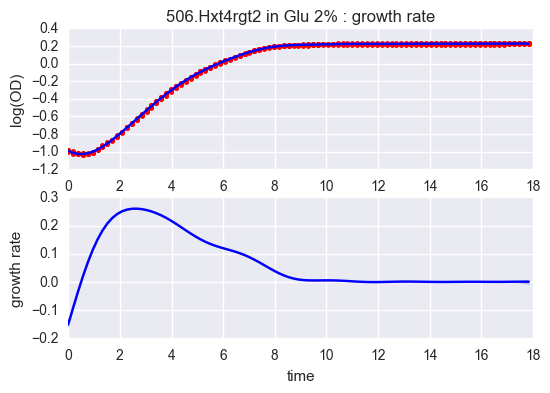


Fitting OD for null in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 9.426666e+02
hparam[0]= 2.667588e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 7.181158e-05 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.839947e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 8.675475e-04 +/- 6.422826e-04 [6.422826e-05]
 time of max growth rate= 1.782719e+01 +/- 3.552714e-15 [3.552714e-16]
           doubling time= 9.771549e+02 +/- 4.226190e+03 [4.226190e+02]
                  max OD= 8.794406e-02 +/- 2.754933e-04 [2.754933e-05]
                lag time= 6.741599e+01 +/- 1.706164e+02 [1.706164e+01]


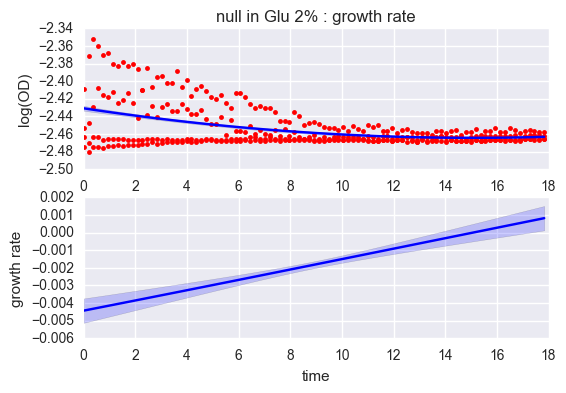


Fitting OD for 229.WT in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.272050e+03
hparam[0]= 1.481347e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.696148e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 5.298846e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.396607e-01 +/- 1.976749e-03 [1.976749e-04]
 time of max growth rate= 2.429552e+00 +/- 7.908271e-02 [7.908271e-03]
           doubling time= 2.892399e+00 +/- 2.378666e-02 [2.378666e-03]
                  max OD= 1.198664e+00 +/- 1.870029e-03 [1.870029e-04]
                lag time= 1.043340e+00 +/- 1.856169e-02 [1.856169e-03]


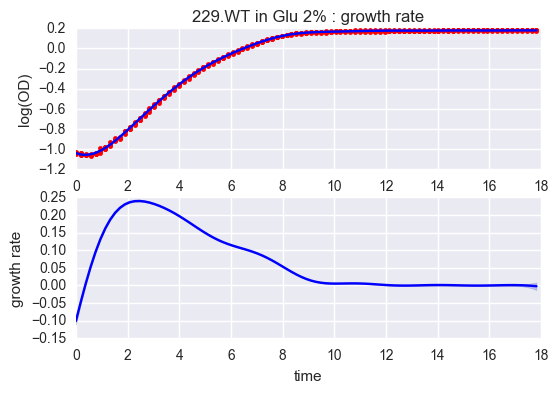


Fitting OD for 409.Hxt4 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.234141e+03
hparam[0]= 1.798850e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.282647e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 4.052113e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.513643e-01 +/- 1.015600e-03 [1.015600e-04]
 time of max growth rate= 3.009680e+00 +/- 6.377621e-02 [6.377621e-03]
           doubling time= 2.757585e+00 +/- 1.113617e-02 [1.113617e-03]
                  max OD= 1.080434e+00 +/- 1.042003e-03 [1.042003e-04]
                lag time= 1.425596e+00 +/- 1.087781e-02 [1.087781e-03]


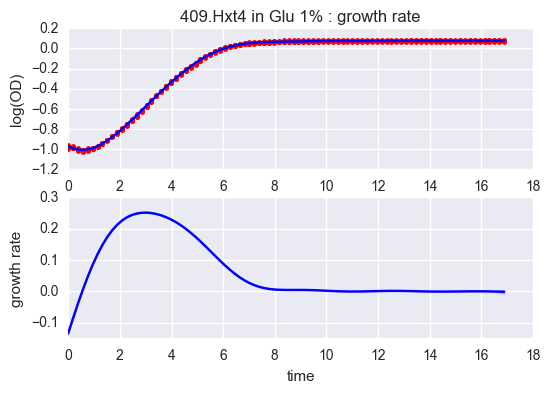


Fitting OD for 403.Hxt4std1 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.929873e+03
hparam[0]= 1.649551e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.153204e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.094642e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.174043e-01 +/- 1.598229e-03 [1.598229e-04]
 time of max growth rate= 3.064676e+00 +/- 8.361333e-02 [8.361333e-03]
           doubling time= 3.188459e+00 +/- 2.346013e-02 [2.346013e-03]
                  max OD= 1.044456e+00 +/- 1.934577e-03 [1.934577e-04]
                lag time= 1.508180e+00 +/- 1.572564e-02 [1.572564e-03]


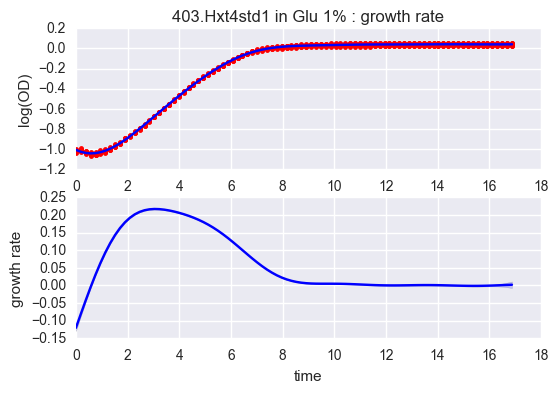


Fitting OD for 506.Hxt4rgt2 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.849768e+03
hparam[0]= 1.625296e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.222015e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.414406e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.276854e-01 +/- 1.802737e-03 [1.802737e-04]
 time of max growth rate= 3.269486e+00 +/- 8.943238e-02 [8.943238e-03]
           doubling time= 3.044510e+00 +/- 2.414207e-02 [2.414207e-03]
                  max OD= 1.068548e+00 +/- 2.171017e-03 [2.171017e-04]
                lag time= 1.593162e+00 +/- 1.803809e-02 [1.803809e-03]


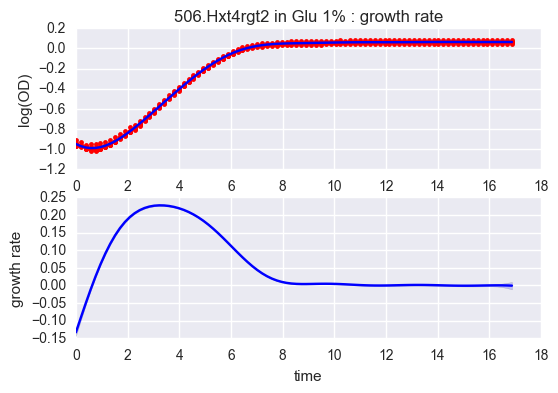


Fitting OD for null in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 8.041207e+02
hparam[0]= 4.136691e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.000000e-06 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.401626e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.327476e-03 +/- 1.522041e-04 [1.522041e-05]
 time of max growth rate= 1.400851e+01 +/- 6.339826e+00 [6.339826e-01]
           doubling time= 5.295025e+02 +/- 6.499169e+01 [6.499169e+00]
                  max OD= 7.759103e-02 +/- 1.099059e-04 [1.099059e-05]
                lag time= 2.925846e-01 +/- 2.514374e-01 [2.514374e-02]


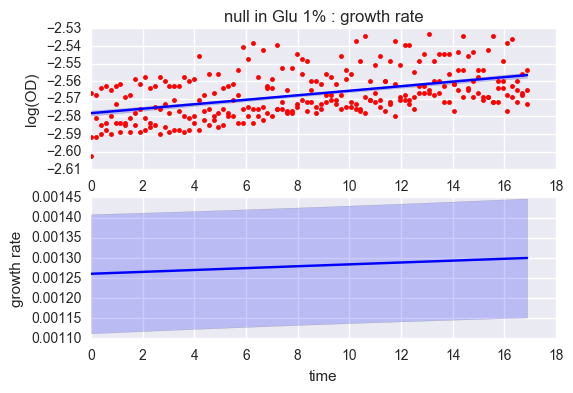


Fitting OD for 229.WT in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.064777e+03
hparam[0]= 1.347129e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.159356e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 7.099680e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.507173e-01 +/- 1.417452e-03 [1.417452e-04]
 time of max growth rate= 2.844694e+00 +/- 1.332268e-15 [1.332268e-16]
           doubling time= 2.764745e+00 +/- 1.564349e-02 [1.564349e-03]
                  max OD= 1.140883e+00 +/- 1.059791e-03 [1.059791e-04]
                lag time= 1.223002e+00 +/- 1.400030e-02 [1.400030e-03]


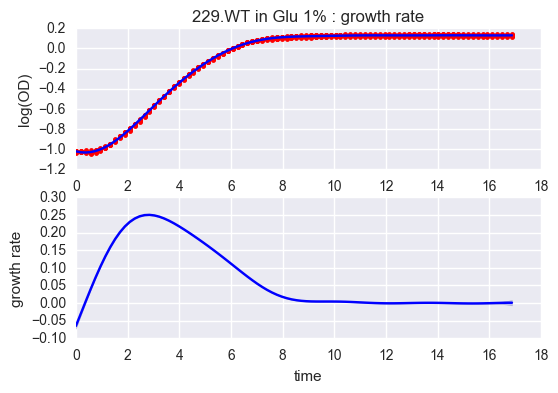


Fitting OD for 409.Hxt4 in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.894918e+03
hparam[0]= 1.310457e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.478643e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.213843e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.541439e-01 +/- 1.750161e-03 [1.750161e-04]
 time of max growth rate= 3.146220e+00 +/- 9.327072e-02 [9.327072e-03]
           doubling time= 2.727510e+00 +/- 1.877369e-02 [1.877369e-03]
                  max OD= 1.016454e+00 +/- 1.530717e-03 [1.530717e-04]
                lag time= 1.412617e+00 +/- 1.658084e-02 [1.658084e-03]


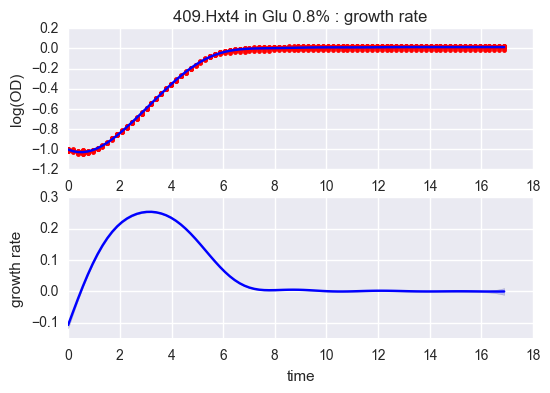


Fitting OD for 403.Hxt4std1 in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.874139e+03
hparam[0]= 1.361361e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.328179e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.305545e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.166798e-01 +/- 1.714865e-03 [1.714865e-04]
 time of max growth rate= 3.407917e+00 +/- 1.212872e-01 [1.212872e-02]
           doubling time= 3.199146e+00 +/- 2.527655e-02 [2.527655e-03]
                  max OD= 9.733266e-01 +/- 1.626698e-03 [1.626698e-04]
                lag time= 1.520443e+00 +/- 2.089612e-02 [2.089612e-03]


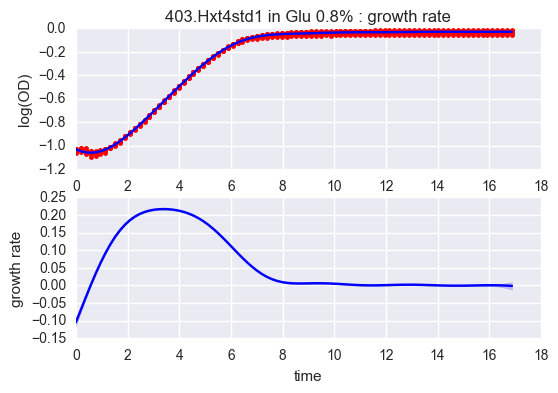


Fitting OD for 506.Hxt4rgt2 in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.123230e+03
hparam[0]= 1.023173e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.830159e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 5.737895e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.247488e-01 +/- 1.391297e-03 [1.391297e-04]
 time of max growth rate= 3.510312e+00 +/- 9.850738e-02 [9.850738e-03]
           doubling time= 3.084215e+00 +/- 1.912191e-02 [1.912191e-03]
                  max OD= 9.837081e-01 +/- 1.406271e-03 [1.406271e-04]
                lag time= 1.589942e+00 +/- 1.587928e-02 [1.587928e-03]


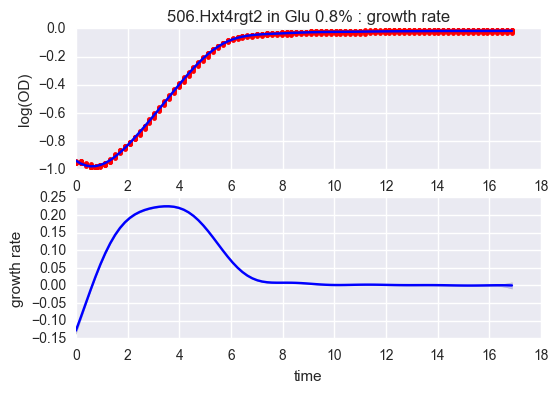


Fitting OD for null in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 8.191076e+02
hparam[0]= 3.363979e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.000000e-06 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.255246e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.680509e-04 +/- 1.479607e-04 [1.479607e-05]
 time of max growth rate= 1.441813e+01 +/- 5.896253e+00 [5.896253e-01]
           doubling time= 2.963430e+03 +/- 4.119678e+03 [4.119678e+02]
                  max OD= 7.628121e-02 +/- 1.025694e-04 [1.025694e-05]
                lag time= 1.687999e+00 +/- 3.020253e+00 [3.020253e-01]


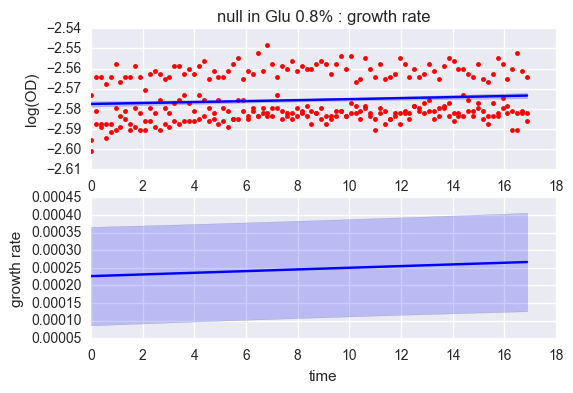


Fitting OD for 229.WT in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.081499e+03
hparam[0]= 1.597348e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.202530e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 6.688364e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.477209e-01 +/- 1.150081e-03 [1.150081e-04]
 time of max growth rate= 2.880726e+00 +/- 7.439551e-02 [7.439551e-03]
           doubling time= 2.798158e+00 +/- 1.300566e-02 [1.300566e-03]
                  max OD= 1.058875e+00 +/- 1.237537e-03 [1.237537e-04]
                lag time= 1.236950e+00 +/- 1.177968e-02 [1.177968e-03]


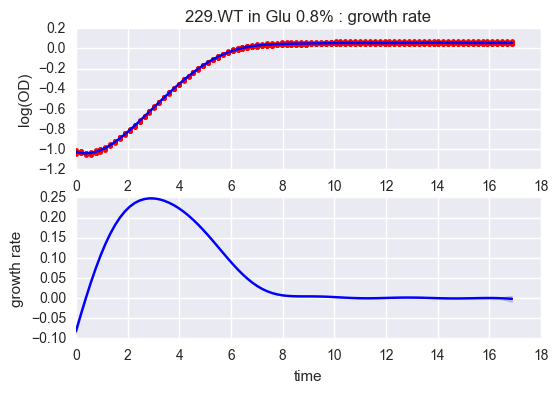


Fitting OD for 409.Hxt4 in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.121647e+03
hparam[0]= 9.989260e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.740531e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 5.592357e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.490707e-01 +/- 1.857329e-03 [1.857329e-04]
 time of max growth rate= 3.246729e+00 +/- 6.162534e-02 [6.162534e-03]
           doubling time= 2.783089e+00 +/- 2.077985e-02 [2.077985e-03]
                  max OD= 9.118179e-01 +/- 1.205273e-03 [1.205273e-04]
                lag time= 1.473222e+00 +/- 1.694849e-02 [1.694849e-03]


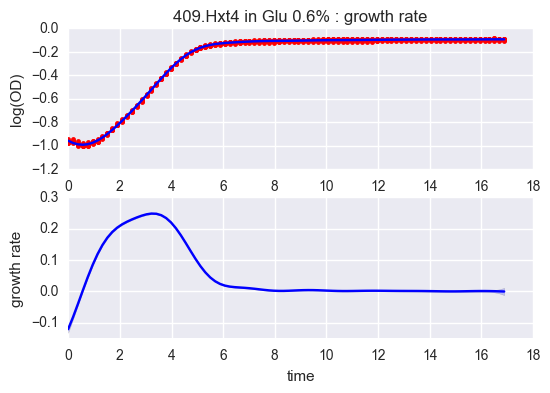


Fitting OD for 403.Hxt4std1 in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.985947e+03
hparam[0]= 1.286462e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.132681e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 8.817668e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.155479e-01 +/- 1.875498e-03 [1.875498e-04]
 time of max growth rate= 3.713214e+00 +/- 1.044885e-01 [1.044885e-02]
           doubling time= 3.215989e+00 +/- 2.799723e-02 [2.799723e-03]
                  max OD= 8.844205e-01 +/- 1.545313e-03 [1.545313e-04]
                lag time= 1.493673e+00 +/- 2.571417e-02 [2.571417e-03]


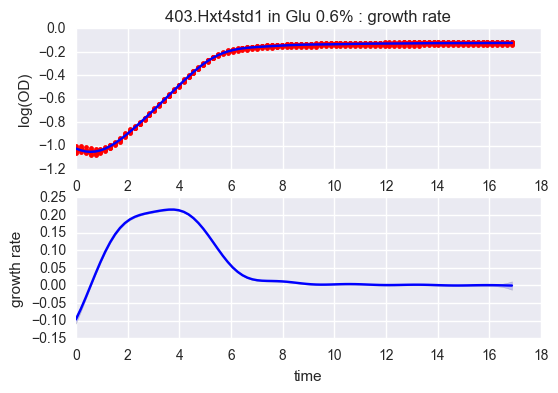


Fitting OD for 506.Hxt4rgt2 in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.892999e+03
hparam[0]= 9.696322e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.156710e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.200128e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.304546e-01 +/- 2.153245e-03 [2.153245e-04]
 time of max growth rate= 3.407922e+00 +/- 4.201988e-02 [4.201988e-03]
           doubling time= 3.008001e+00 +/- 2.807020e-02 [2.807020e-03]
                  max OD= 9.136303e-01 +/- 2.098280e-03 [2.098280e-04]
                lag time= 1.657014e+00 +/- 2.183327e-02 [2.183327e-03]


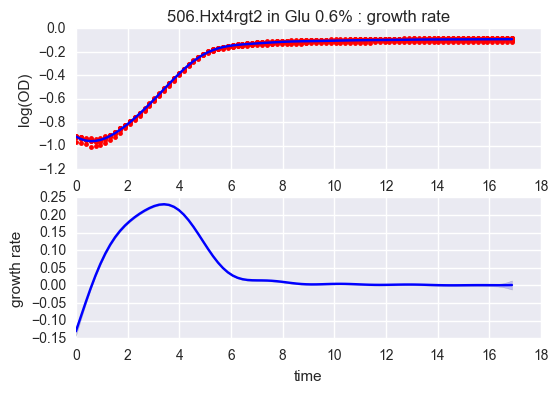


Fitting OD for null in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 8.558530e+02
hparam[0]= 1.017618e+01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.841748e-05 [1.000000e-06, 1.000000e+02]
hparam[2]= 9.280559e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.720914e-03 +/- 4.349000e-04 [4.349000e-05]
 time of max growth rate= 0.000000e+00 +/- 0.000000e+00 [0.000000e+00]
           doubling time= 4.315067e+02 +/- 1.214639e+02 [1.214639e+01]
                  max OD= 7.605136e-02 +/- 7.358102e-05 [7.358102e-06]
                lag time= 0.000000e+00 +/- 0.000000e+00 [0.000000e+00]


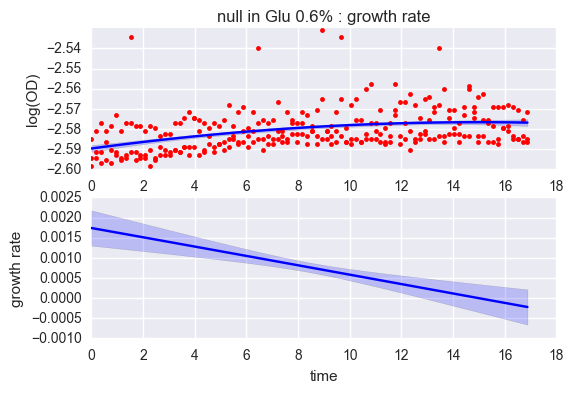


Fitting OD for 229.WT in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.905356e+03
hparam[0]= 1.376874e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.022514e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.196701e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.462480e-01 +/- 1.342361e-03 [1.342361e-04]
 time of max growth rate= 3.034333e+00 +/- 0.000000e+00 [0.000000e+00]
           doubling time= 2.814917e+00 +/- 1.534158e-02 [1.534158e-03]
                  max OD= 9.633002e-01 +/- 1.905161e-03 [1.905161e-04]
                lag time= 1.175343e+00 +/- 1.564110e-02 [1.564110e-03]


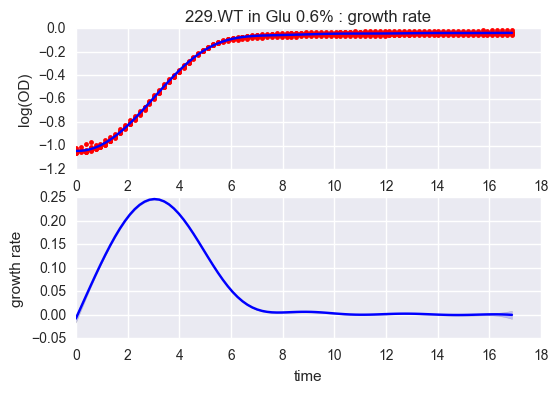


Fitting OD for 409.Hxt4 in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.564730e+03
hparam[0]= 1.582212e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 8.651402e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.281722e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.314393e-01 +/- 3.543244e-03 [3.543244e-04]
 time of max growth rate= 2.827821e+00 +/- 5.427119e-02 [5.427119e-03]
           doubling time= 2.995641e+00 +/- 4.568661e-02 [4.568661e-03]
                  max OD= 8.321646e-01 +/- 5.189611e-03 [5.189611e-04]
                lag time= 1.343801e+00 +/- 5.127465e-02 [5.127465e-03]


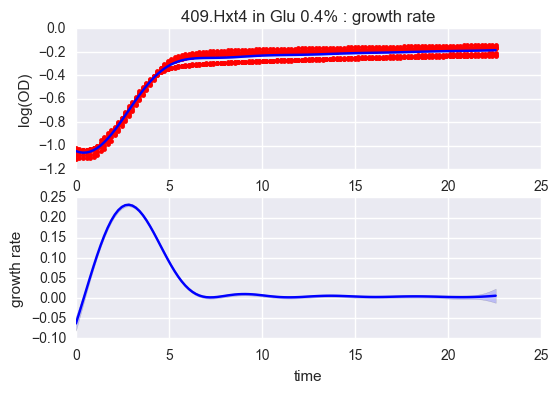


Fitting OD for 403.Hxt4std1 in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.741926e+03
hparam[0]= 9.916766e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.452691e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 7.287911e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.116626e-01 +/- 1.444619e-03 [1.444619e-04]
 time of max growth rate= 2.465583e+00 +/- 8.881784e-16 [8.881784e-17]
           doubling time= 3.274927e+00 +/- 2.237122e-02 [2.237122e-03]
                  max OD= 8.164443e-01 +/- 1.839176e-03 [1.839176e-04]
                lag time= 1.173335e+00 +/- 1.557346e-02 [1.557346e-03]


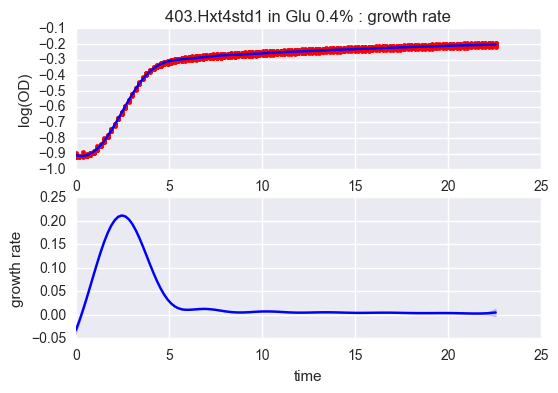


Fitting OD for 506.Hxt4rgt2 in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.476389e+03
hparam[0]= 1.457645e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.491505e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.375984e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.579640e-01 +/- 1.796532e-03 [1.796532e-04]
 time of max growth rate= 2.841096e+00 +/- 2.654944e-02 [2.654944e-03]
           doubling time= 2.687122e+00 +/- 1.875164e-02 [1.875164e-03]
                  max OD= 8.031423e-01 +/- 1.951699e-03 [1.951699e-04]
                lag time= 1.475817e+00 +/- 1.737953e-02 [1.737953e-03]


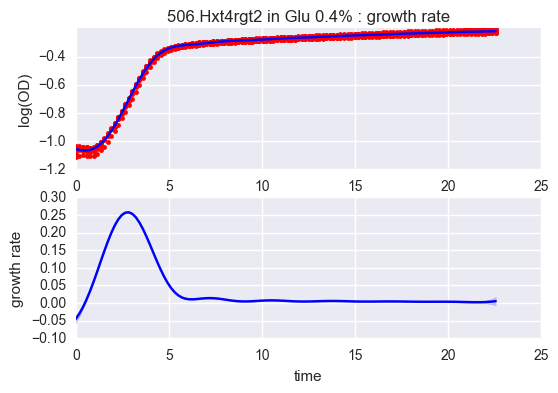


Fitting OD for null in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 9.277165e+02
hparam[0]= 2.639500e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 8.261624e-05 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.166889e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 4.572220e-04 +/- 1.004460e-03 [1.004460e-04]
 time of max growth rate= 2.256839e+01 +/- 7.105427e-15 [7.105427e-16]
           doubling time= -5.421893e+02 +/- 4.767967e+03 [4.767967e+02]
                  max OD= 9.273717e-02 +/- 4.545248e-04 [4.545248e-05]
                lag time= -3.763893e+01 +/- 5.422594e+02 [5.422594e+01]


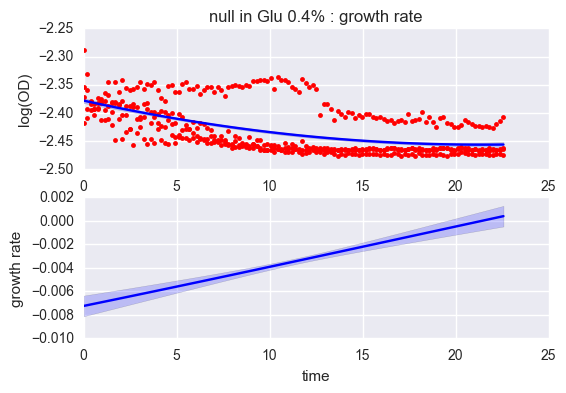


Fitting OD for 229.WT in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.465902e+03
hparam[0]= 1.677351e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.049531e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.614753e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.336887e-01 +/- 5.684196e-03 [5.684196e-04]
 time of max growth rate= 1.917503e+00 +/- 7.043085e-02 [7.043085e-03]
           doubling time= 2.967864e+00 +/- 7.202208e-02 [7.202208e-03]
                  max OD= 7.881814e-01 +/- 6.856028e-03 [6.856028e-04]
                lag time= 6.236184e-01 +/- 5.951095e-02 [5.951095e-03]


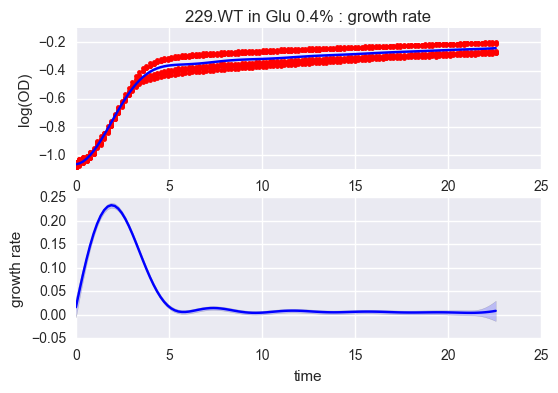


Fitting OD for 409.Hxt4 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.673655e+03
hparam[0]= 2.439260e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 4.897110e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 9.982152e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.434245e-01 +/- 2.588118e-03 [2.588118e-04]
 time of max growth rate= 3.474518e+00 +/- 8.846202e-02 [8.846202e-03]
           doubling time= 2.847806e+00 +/- 3.038452e-02 [3.038452e-03]
                  max OD= 1.081645e+00 +/- 5.303796e-03 [5.303796e-04]
                lag time= 1.414370e+00 +/- 4.765757e-02 [4.765757e-03]


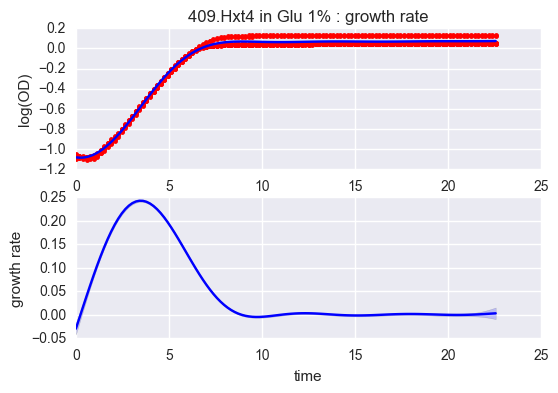


Fitting OD for 403.Hxt4std1 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.131217e+03
hparam[0]= 8.487075e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.531568e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.208836e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.234856e-01 +/- 2.515196e-03 [2.515196e-04]
 time of max growth rate= 3.025050e+00 +/- 1.240001e-01 [1.240001e-02]
           doubling time= 3.101925e+00 +/- 3.513149e-02 [3.513149e-03]
                  max OD= 1.052075e+00 +/- 3.401292e-03 [3.401292e-04]
                lag time= 1.328103e+00 +/- 2.852336e-02 [2.852336e-03]


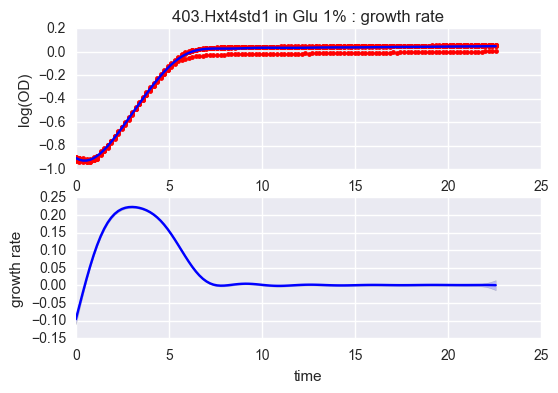


Fitting OD for 506.Hxt4rgt2 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.939611e+03
hparam[0]= 1.832236e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 7.148184e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 5.208762e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.753081e-01 +/- 1.991839e-03 [1.991839e-04]
 time of max growth rate= 3.377802e+00 +/- 7.439551e-02 [7.439551e-03]
           doubling time= 2.517846e+00 +/- 1.819181e-02 [1.819181e-03]
                  max OD= 1.040987e+00 +/- 4.082133e-03 [4.082133e-04]
                lag time= 1.610300e+00 +/- 2.628520e-02 [2.628520e-03]


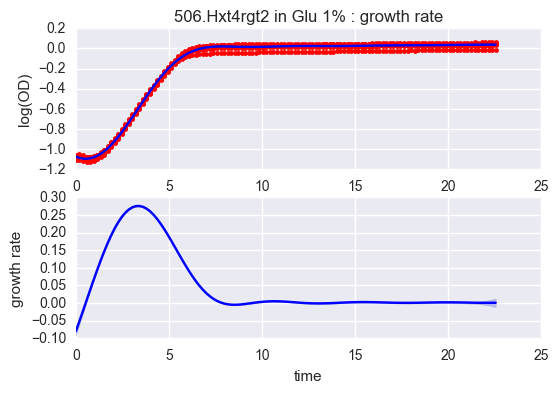


Fitting OD for null in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.345009e+03
hparam[0]= 3.844074e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 4.160228e-04 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.996345e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 5.628342e-04 +/- 6.003443e-04 [6.003443e-05]
 time of max growth rate= 2.008399e+01 +/- 2.046715e+00 [2.046715e-01]
           doubling time= 4.730204e+03 +/- 3.722833e+04 [3.722833e+03]
                  max OD= 9.032386e-02 +/- 2.222502e-04 [2.222502e-05]
                lag time= 4.428727e+02 +/- 3.378700e+03 [3.378700e+02]


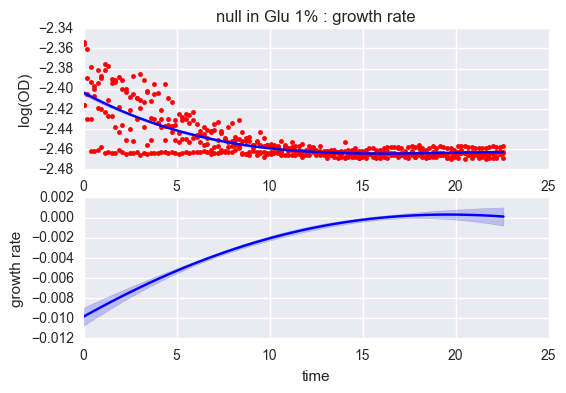


Fitting OD for 229.WT in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.487920e+03
hparam[0]= 2.247970e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 5.723010e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.556095e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.615170e-01 +/- 3.115624e-03 [3.115624e-04]
 time of max growth rate= 2.757655e+00 +/- 9.451554e-02 [9.451554e-03]
           doubling time= 2.650863e+00 +/- 3.168207e-02 [3.168207e-03]
                  max OD= 1.082783e+00 +/- 5.173711e-03 [5.173711e-04]
                lag time= 8.263673e-01 +/- 5.728117e-02 [5.728117e-03]


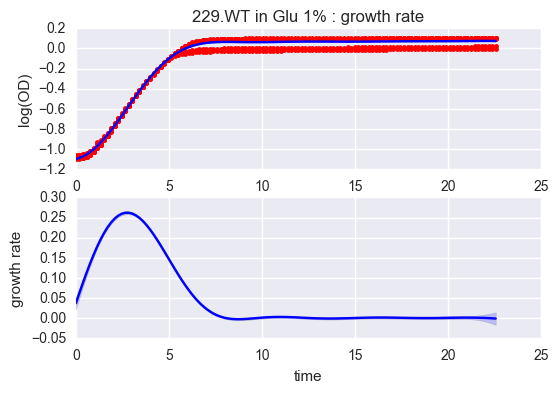


Fitting OD for 409.Hxt4 in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.728492e+03
hparam[0]= 1.838673e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 8.797495e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 8.605240e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.437597e-01 +/- 3.118838e-03 [3.118838e-04]
 time of max growth rate= 3.227984e+00 +/- 9.283262e-02 [9.283262e-03]
           doubling time= 2.844034e+00 +/- 3.644215e-02 [3.644215e-03]
                  max OD= 1.208533e+00 +/- 5.083437e-03 [5.083437e-04]
                lag time= 1.462580e+00 +/- 4.104669e-02 [4.104669e-03]


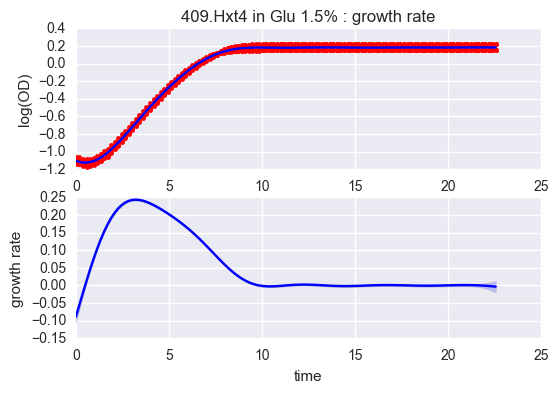


Fitting OD for 403.Hxt4std1 in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.105117e+03
hparam[0]= 1.169681e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.133704e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.448570e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.304965e-01 +/- 2.477021e-03 [2.477021e-04]
 time of max growth rate= 2.964361e+00 +/- 9.155847e-02 [9.155847e-03]
           doubling time= 3.007537e+00 +/- 3.213053e-02 [3.213053e-03]
                  max OD= 1.183387e+00 +/- 3.007640e-03 [3.007640e-04]
                lag time= 1.377670e+00 +/- 3.051114e-02 [3.051114e-03]


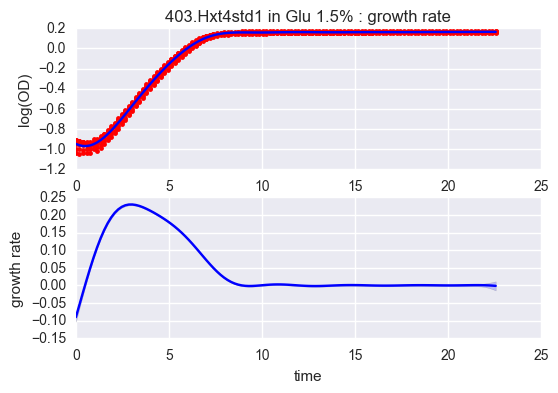


Fitting OD for 506.Hxt4rgt2 in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.074280e+03
hparam[0]= 1.355408e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.238176e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.691227e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.692547e-01 +/- 2.612424e-03 [2.612424e-04]
 time of max growth rate= 3.188157e+00 +/- 8.351647e-02 [8.351647e-03]
           doubling time= 2.574561e+00 +/- 2.501486e-02 [2.501486e-03]
                  max OD= 1.193607e+00 +/- 3.214632e-03 [3.214632e-04]
                lag time= 1.565876e+00 +/- 2.392206e-02 [2.392206e-03]


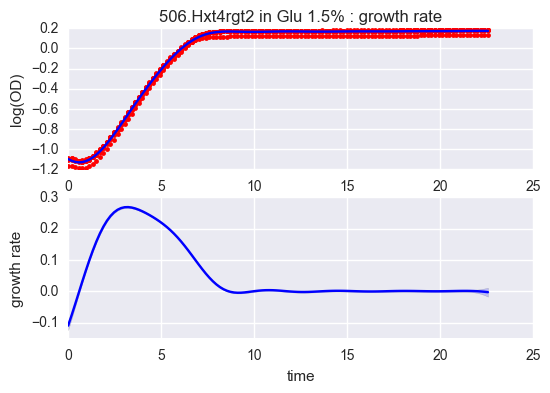


Fitting OD for null in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.056469e+03
hparam[0]= 2.586446e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.273164e-04 [1.000000e-06, 1.000000e+02]
hparam[2]= 6.784999e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 4.736909e-03 +/- 7.373259e-04 [7.373259e-05]
 time of max growth rate= 2.256839e+01 +/- 7.105427e-15 [7.105427e-16]
           doubling time= 1.501935e+02 +/- 2.541692e+01 [2.541692e+00]
                  max OD= 8.956983e-02 +/- 3.113584e-04 [3.113584e-05]
                lag time= 2.937014e+01 +/- 1.746972e+00 [1.746972e-01]


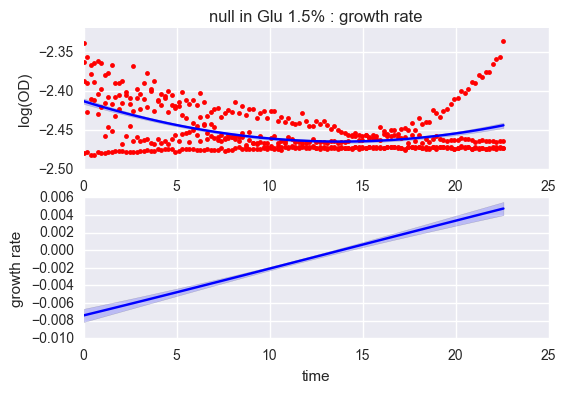


Fitting OD for 229.WT in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.569193e+03
hparam[0]= 2.777194e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 4.804937e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.282637e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.601623e-01 +/- 3.084433e-03 [3.084433e-04]
 time of max growth rate= 2.803168e+00 +/- 7.855721e-02 [7.855721e-03]
           doubling time= 2.664663e+00 +/- 3.164394e-02 [3.164394e-03]
                  max OD= 1.138493e+00 +/- 6.311369e-03 [6.311369e-04]
                lag time= 7.412807e-01 +/- 4.707009e-02 [4.707009e-03]


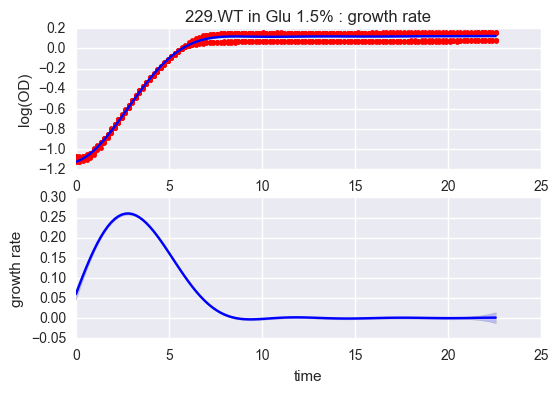


Fitting OD for 409.Hxt4 in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.845437e+03
hparam[0]= 1.368950e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.126241e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 6.450844e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.343878e-01 +/- 2.794026e-03 [2.794026e-04]
 time of max growth rate= 2.653131e+00 +/- 1.886883e-02 [1.886883e-03]
           doubling time= 2.957686e+00 +/- 3.520012e-02 [3.520012e-03]
                  max OD= 8.036837e-01 +/- 3.285160e-03 [3.285160e-04]
                lag time= 1.410705e+00 +/- 3.483731e-02 [3.483731e-03]


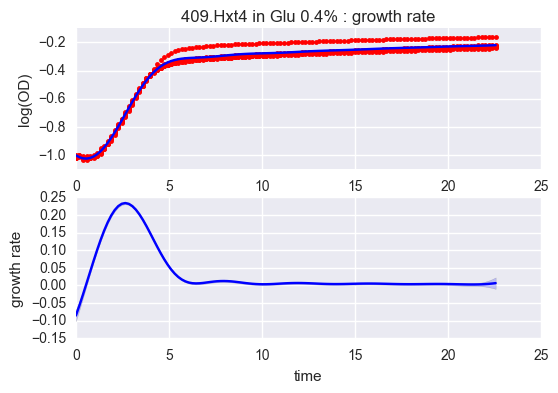


Fitting OD for 403.Hxt4std1 in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.899369e+03
hparam[0]= 1.432784e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.186617e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 5.644130e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.405436e-01 +/- 2.958248e-03 [2.958248e-04]
 time of max growth rate= 2.649339e+00 +/- 3.234997e-02 [3.234997e-03]
           doubling time= 2.882022e+00 +/- 3.549218e-02 [3.549218e-03]
                  max OD= 7.981452e-01 +/- 4.266167e-03 [4.266167e-04]
                lag time= 1.335863e+00 +/- 3.906628e-02 [3.906628e-03]


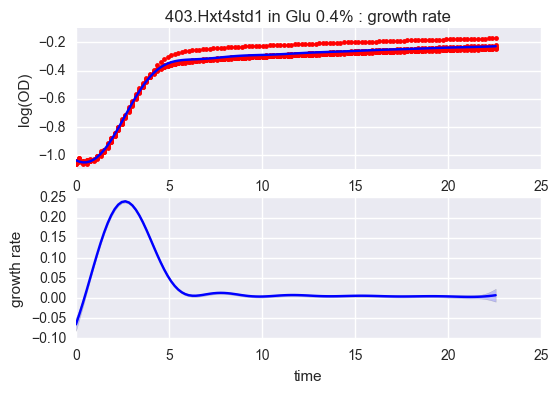


Fitting OD for 506.Hxt4rgt2 in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.228497e+03
hparam[0]= 1.601179e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.656450e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 2.491941e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.103530e-01 +/- 2.314431e-03 [2.314431e-04]
 time of max growth rate= 2.328869e+00 +/- 8.513518e-02 [8.513518e-03]
           doubling time= 3.295560e+00 +/- 3.617702e-02 [3.617702e-03]
                  max OD= 7.291157e-01 +/- 3.052015e-03 [3.052015e-04]
                lag time= 1.292206e+00 +/- 2.817383e-02 [2.817383e-03]


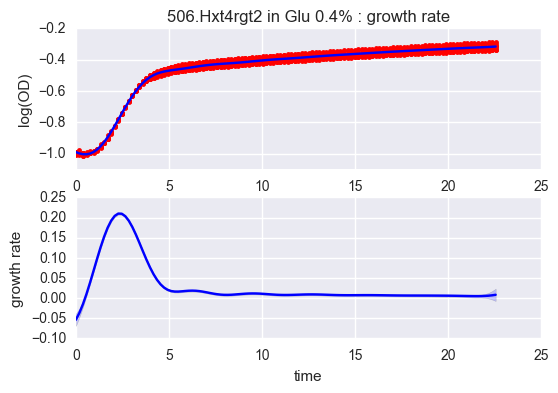


Fitting OD for null in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.325611e+03
hparam[0]= 2.609777e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 4.402515e-05 [1.000000e-06, 1.000000e+02]
hparam[2]= 2.209430e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.136722e-03 +/- 3.553558e-04 [3.553558e-05]
 time of max growth rate= 2.256656e+01 +/- 7.105427e-15 [7.105427e-16]
           doubling time= 6.984887e+02 +/- 3.520989e+02 [3.520989e+01]
                  max OD= 8.829691e-02 +/- 1.644392e-04 [1.644392e-05]
                lag time= 4.374480e+01 +/- 1.201274e+01 [1.201274e+00]


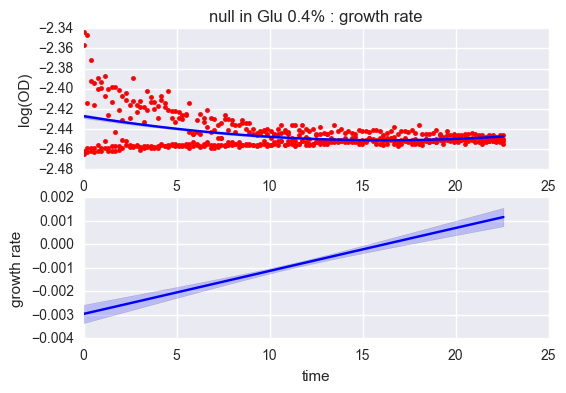


Fitting OD for 229.WT in Glu 0.4%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.514027e+03
hparam[0]= 1.133867e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.251928e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.436670e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.002573e-01 +/- 5.725115e-03 [5.725115e-04]
 time of max growth rate= 2.088187e+00 +/- 5.685501e-02 [5.685501e-03]
           doubling time= 3.464116e+00 +/- 9.912786e-02 [9.912786e-03]
                  max OD= 8.195765e-01 +/- 5.803242e-03 [5.803242e-04]
                lag time= 9.728484e-01 +/- 7.368882e-02 [7.368882e-03]


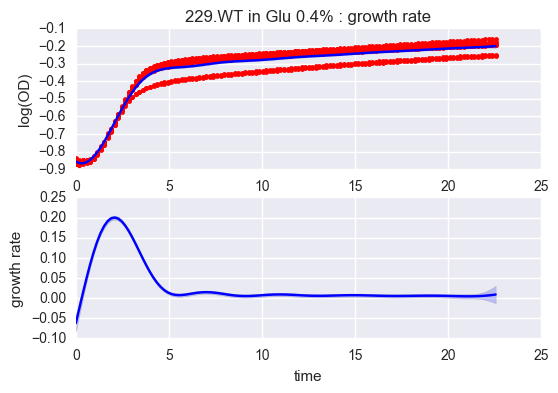


Fitting OD for 409.Hxt4 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.729711e+03
hparam[0]= 2.245433e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 5.730629e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 8.686816e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.561609e-01 +/- 2.397079e-03 [2.397079e-04]
 time of max growth rate= 3.341503e+00 +/- 9.203466e-02 [9.203466e-03]
           doubling time= 2.706144e+00 +/- 2.552569e-02 [2.552569e-03]
                  max OD= 1.084314e+00 +/- 4.441286e-03 [4.441286e-04]
                lag time= 1.440332e+00 +/- 3.789685e-02 [3.789685e-03]


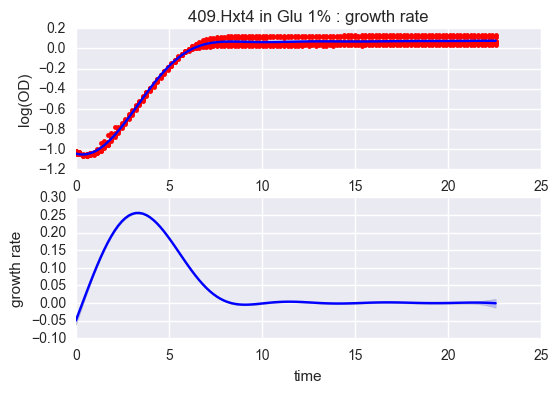


Fitting OD for 403.Hxt4std1 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.005563e+03
hparam[0]= 9.153529e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.968834e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.764836e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.441068e-01 +/- 1.037948e-03 [1.037948e-04]
 time of max growth rate= 2.928108e+00 +/- 1.014878e-01 [1.014878e-02]
           doubling time= 2.839575e+00 +/- 1.206480e-02 [1.206480e-03]
                  max OD= 1.054995e+00 +/- 1.340254e-03 [1.340254e-04]
                lag time= 1.348940e+00 +/- 1.074506e-02 [1.074506e-03]


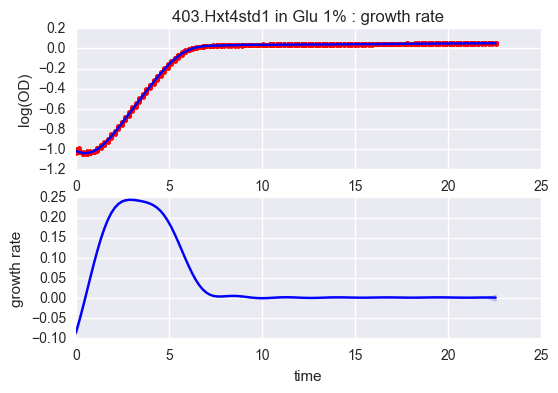


Fitting OD for 506.Hxt4rgt2 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.306504e+03
hparam[0]= 9.024003e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.674352e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 2.084472e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.478699e-01 +/- 2.256905e-03 [2.256905e-04]
 time of max growth rate= 3.311166e+00 +/- 9.450169e-02 [9.450169e-03]
           doubling time= 2.796646e+00 +/- 2.540451e-02 [2.540451e-03]
                  max OD= 9.877767e-01 +/- 2.943470e-03 [2.943470e-04]
                lag time= 1.513218e+00 +/- 2.191635e-02 [2.191635e-03]


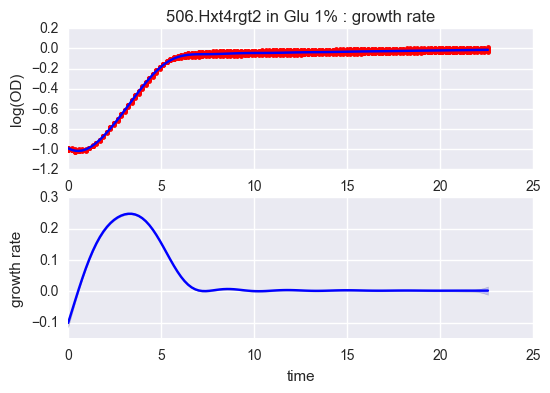


Fitting OD for null in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.370398e+03
hparam[0]= 2.728076e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.151336e-03 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.775695e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.280144e-03 +/- 1.096975e-03 [1.096975e-04]
 time of max growth rate= 2.010512e+01 +/- 3.899073e+00 [3.899073e-01]
           doubling time= 1.227694e+03 +/- 1.865426e+03 [1.865426e+02]
                  max OD= 9.003604e-02 +/- 2.065089e-04 [2.065089e-05]
                lag time= 9.027802e+01 +/- 1.023052e+02 [1.023052e+01]


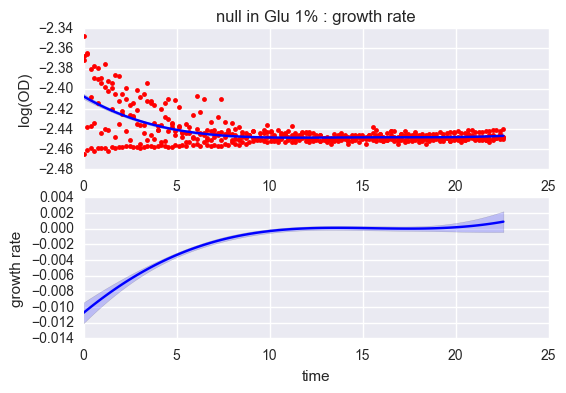


Fitting OD for 229.WT in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.441857e+03
hparam[0]= 1.249056e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 8.300402e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.732464e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.400755e-01 +/- 4.157165e-03 [4.157165e-04]
 time of max growth rate= 2.774500e+00 +/- 9.155847e-02 [9.155847e-03]
           doubling time= 2.888073e+00 +/- 5.015832e-02 [5.015832e-03]
                  max OD= 1.045943e+00 +/- 5.514616e-03 [5.514616e-04]
                lag time= 1.197693e+00 +/- 5.786993e-02 [5.786993e-03]


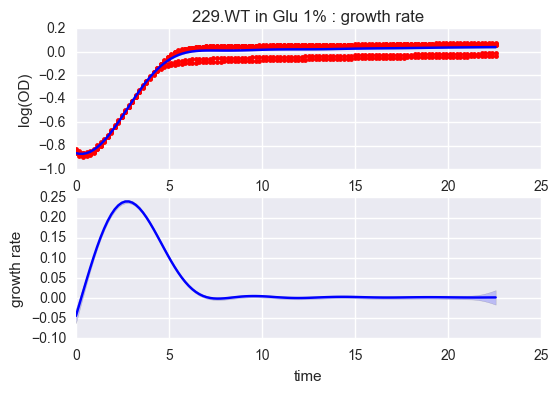


Fitting OD for 409.Hxt4 in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.495612e+03
hparam[0]= 1.248886e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.297236e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.327994e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.510367e-01 +/- 1.805827e-03 [1.805827e-04]
 time of max growth rate= 3.049477e+00 +/- 5.801834e-02 [5.801834e-03]
           doubling time= 2.761281e+00 +/- 1.986117e-02 [1.986117e-03]
                  max OD= 1.191140e+00 +/- 2.367663e-03 [2.367663e-04]
                lag time= 1.412210e+00 +/- 1.539295e-02 [1.539295e-03]


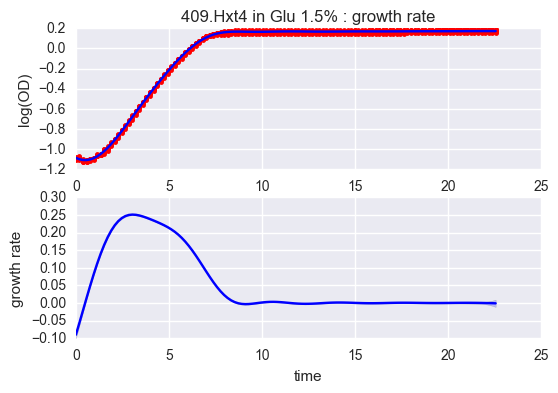


Fitting OD for 403.Hxt4std1 in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.714548e+03
hparam[0]= 1.148855e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.381402e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 7.790392e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.530819e-01 +/- 1.372887e-03 [1.372887e-04]
 time of max growth rate= 2.903455e+00 +/- 8.770670e-02 [8.770670e-03]
           doubling time= 2.738906e+00 +/- 1.483683e-02 [1.483683e-03]
                  max OD= 1.189468e+00 +/- 1.694963e-03 [1.694963e-04]
                lag time= 1.372113e+00 +/- 1.242104e-02 [1.242104e-03]


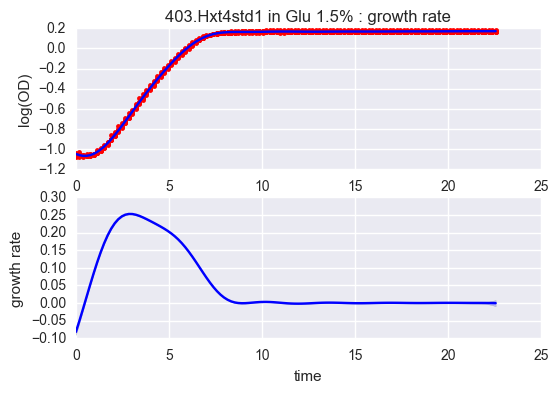


Fitting OD for 506.Hxt4rgt2 in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.828462e+03
hparam[0]= 2.273929e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 5.620486e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 6.849295e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.573938e-01 +/- 2.327013e-03 [2.327013e-04]
 time of max growth rate= 3.436312e+00 +/- 6.162534e-02 [6.162534e-03]
           doubling time= 2.693165e+00 +/- 2.434499e-02 [2.434499e-03]
                  max OD= 1.135719e+00 +/- 5.456864e-03 [5.456864e-04]
                lag time= 1.551256e+00 +/- 3.502806e-02 [3.502806e-03]


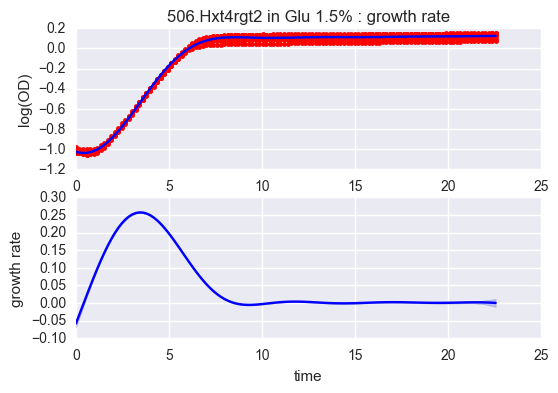


Fitting OD for null in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.246475e+03
hparam[0]= 2.657687e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 3.440960e-05 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.082401e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.004478e-03 +/- 4.531371e-04 [4.531371e-05]
 time of max growth rate= 2.256656e+01 +/- 7.105427e-15 [7.105427e-16]
           doubling time= 7.969316e+02 +/- 1.927521e+03 [1.927521e+02]
                  max OD= 8.755328e-02 +/- 1.963116e-04 [1.963116e-05]
                lag time= 3.947810e+01 +/- 3.413117e+01 [3.413117e+00]


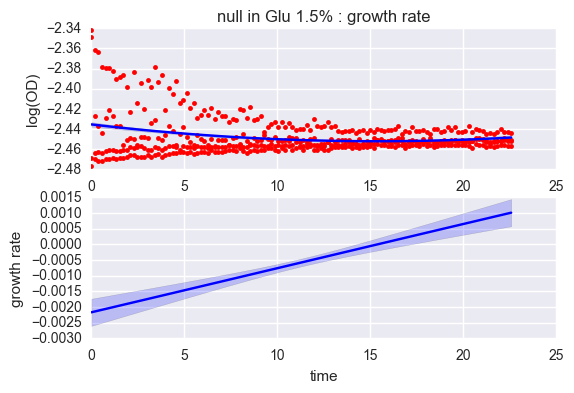


Fitting OD for 229.WT in Glu 1.5%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.481190e+03
hparam[0]= 9.733800e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.587335e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.365949e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.378636e-01 +/- 1.999156e-03 [1.999156e-04]
 time of max growth rate= 2.490042e+00 +/- 6.377621e-02 [6.377621e-03]
           doubling time= 2.914260e+00 +/- 2.454271e-02 [2.454271e-03]
                  max OD= 1.182250e+00 +/- 2.313332e-03 [2.313332e-04]
                lag time= 1.212794e+00 +/- 1.974806e-02 [1.974806e-03]


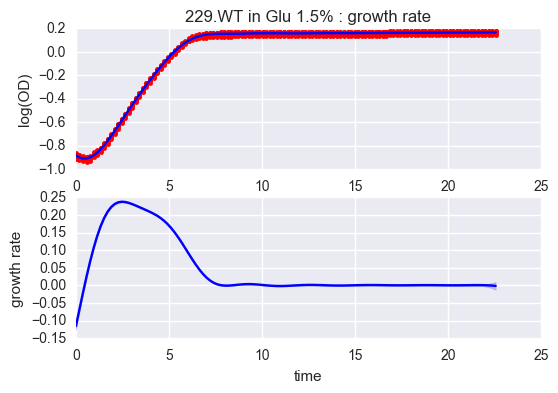


Fitting OD for 409.Hxt4 in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.180970e+03
hparam[0]= 2.590767e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.222912e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.117424e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.837443e-01 +/- 4.627070e-03 [4.627070e-04]
 time of max growth rate= 2.029303e+00 +/- 8.690346e-02 [8.690346e-03]
           doubling time= 3.774746e+00 +/- 9.534155e-02 [9.534155e-03]
                  max OD= 6.187676e-01 +/- 4.050523e-03 [4.050523e-04]
                lag time= 1.085207e+00 +/- 7.079745e-02 [7.079745e-03]


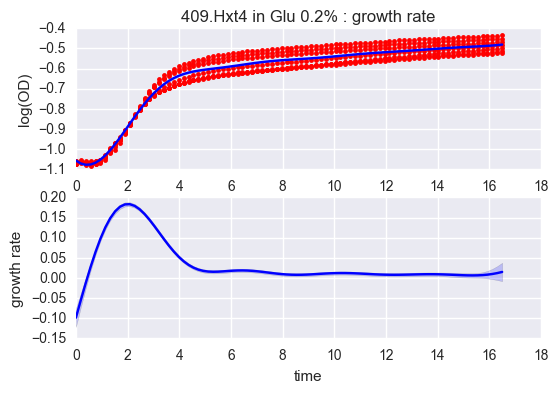


Fitting OD for 403.Hxt4std1 in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.321718e+03
hparam[0]= 2.360291e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.043889e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 7.079375e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.858585e-01 +/- 3.499367e-03 [3.499367e-04]
 time of max growth rate= 2.429441e+00 +/- 7.439551e-02 [7.439551e-03]
           doubling time= 3.730760e+00 +/- 7.046836e-02 [7.046836e-03]
                  max OD= 6.372273e-01 +/- 4.208444e-03 [4.208444e-04]
                lag time= 1.296361e+00 +/- 5.243678e-02 [5.243678e-03]


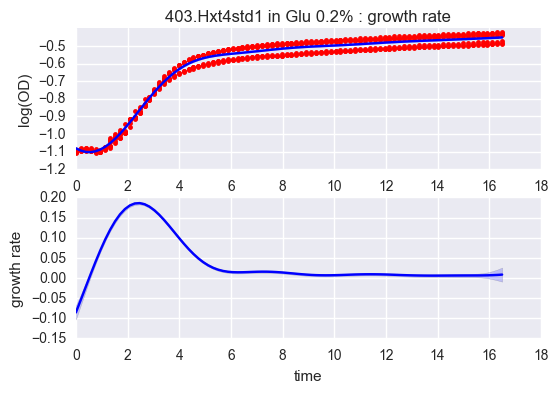


Fitting OD for 506.Hxt4rgt2 in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.038897e+03
hparam[0]= 4.432732e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.864317e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 6.006624e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.261244e-01 +/- 2.099756e-03 [2.099756e-04]
 time of max growth rate= 2.029303e+00 +/- 8.690346e-02 [8.690346e-03]
           doubling time= 3.065600e+00 +/- 2.854564e-02 [2.854564e-03]
                  max OD= 6.360610e-01 +/- 1.324103e-03 [1.324103e-04]
                lag time= 1.284373e+00 +/- 1.417689e-02 [1.417689e-03]


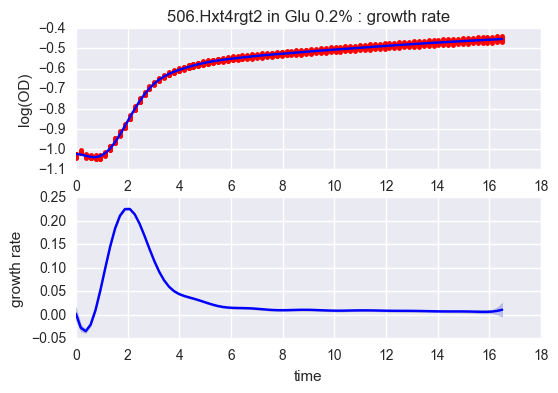


Fitting OD for null in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 9.794152e+02
hparam[0]= 2.638164e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.667271e-04 [1.000000e-06, 1.000000e+02]
hparam[2]= 2.068604e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.629795e-03 +/- 6.003665e-04 [6.003665e-05]
 time of max growth rate= 1.649889e+01 +/- 0.000000e+00 [0.000000e+00]
           doubling time= 2.814056e+02 +/- 9.316326e+01 [9.316326e+00]
                  max OD= 8.992261e-02 +/- 2.034941e-04 [2.034941e-05]
                lag time= 3.746383e+01 +/- 7.451144e+00 [7.451144e-01]


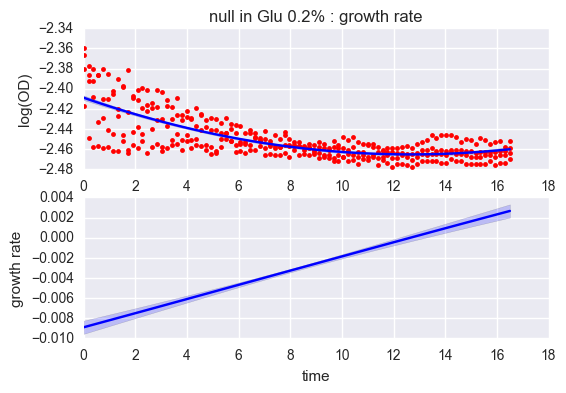


Fitting OD for 229.WT in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.719461e+03
hparam[0]= 1.755671e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.793638e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.853690e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.000394e-01 +/- 2.540723e-03 [2.540723e-04]
 time of max growth rate= 1.896556e+00 +/- 6.661338e-16 [6.661338e-17]
           doubling time= 3.465614e+00 +/- 4.414338e-02 [4.414338e-03]
                  max OD= 6.652583e-01 +/- 2.482949e-03 [2.482949e-04]
                lag time= 1.049349e+00 +/- 2.668574e-02 [2.668574e-03]


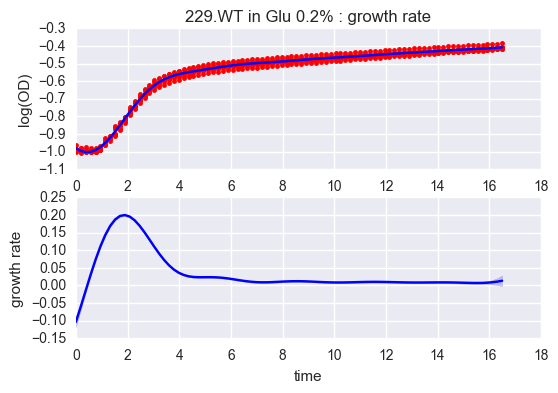


Fitting OD for 409.Hxt4 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.126473e+03
hparam[0]= 1.368054e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.550436e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 4.874495e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.499863e-01 +/- 1.209820e-03 [1.209820e-04]
 time of max growth rate= 2.829604e+00 +/- 5.802586e-02 [5.802586e-03]
           doubling time= 2.772806e+00 +/- 1.342034e-02 [1.342034e-03]
                  max OD= 1.035945e+00 +/- 1.290473e-03 [1.290473e-04]
                lag time= 1.281915e+00 +/- 1.032392e-02 [1.032392e-03]


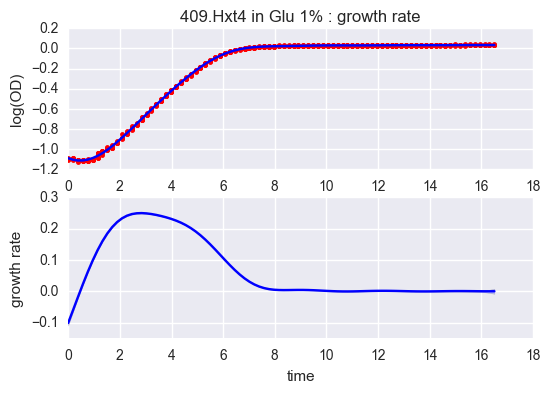


Fitting OD for 403.Hxt4std1 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.139525e+03
hparam[0]= 1.490790e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.302632e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 4.714143e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.266050e-01 +/- 1.039217e-03 [1.039217e-04]
 time of max growth rate= 3.303704e+00 +/- 9.359789e-02 [9.359789e-03]
           doubling time= 3.058898e+00 +/- 1.404107e-02 [1.404107e-03]
                  max OD= 9.993869e-01 +/- 1.084918e-03 [1.084918e-04]
                lag time= 1.442459e+00 +/- 1.104513e-02 [1.104513e-03]


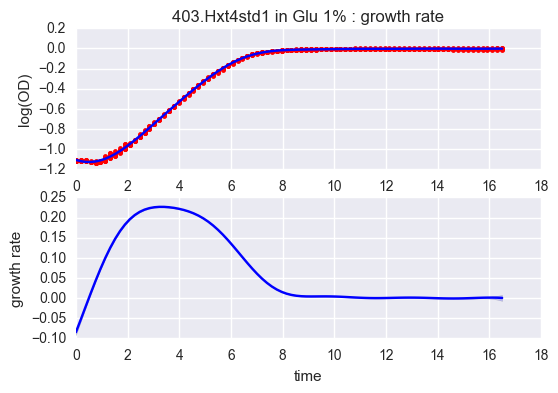


Fitting OD for 506.Hxt4rgt2 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.394866e+03
hparam[0]= 8.310908e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 4.152147e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.699654e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.608029e-01 +/- 1.566229e-03 [1.566229e-04]
 time of max growth rate= 3.243019e+00 +/- 5.689167e-02 [5.689167e-03]
           doubling time= 2.657839e+00 +/- 1.599679e-02 [1.599679e-03]
                  max OD= 1.036693e+00 +/- 8.952471e-04 [8.952471e-05]
                lag time= 1.417958e+00 +/- 1.207938e-02 [1.207938e-03]


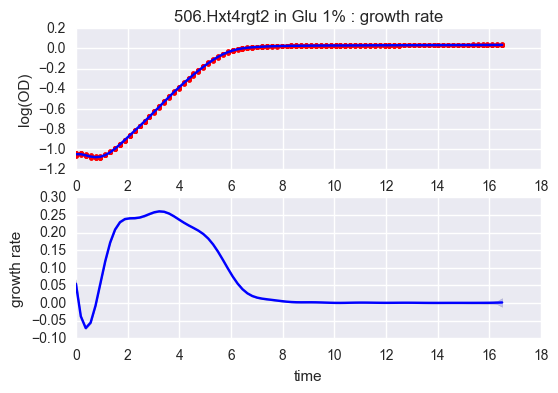


Fitting OD for null in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 9.047247e+02
hparam[0]= 2.631614e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.175933e-04 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.182786e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 6.266891e-04 +/- 6.906499e-04 [6.906499e-05]
 time of max growth rate= 1.649889e+01 +/- 0.000000e+00 [0.000000e+00]
           doubling time= 3.751368e+03 +/- 2.540063e+04 [2.540063e+03]
                  max OD= 8.993225e-02 +/- 2.189651e-04 [2.189651e-05]
                lag time= 3.312146e+02 +/- 2.161793e+03 [2.161793e+02]


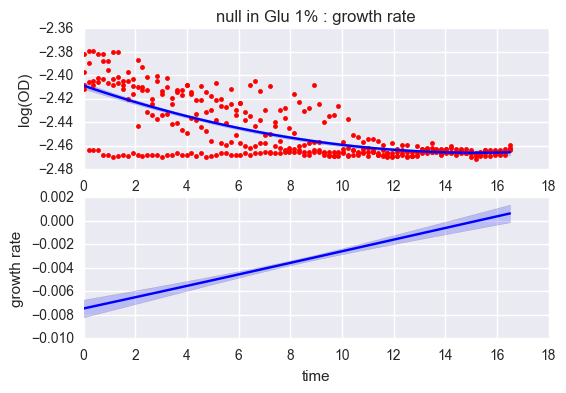


Fitting OD for 229.WT in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.145067e+03
hparam[0]= 1.636690e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.557020e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 4.562882e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.428143e-01 +/- 1.363994e-03 [1.363994e-04]
 time of max growth rate= 2.529949e+00 +/- 8.983361e-02 [8.983361e-03]
           doubling time= 2.854729e+00 +/- 1.603827e-02 [1.603827e-03]
                  max OD= 1.042835e+00 +/- 1.534117e-03 [1.534117e-04]
                lag time= 1.212000e+00 +/- 1.061491e-02 [1.061491e-03]


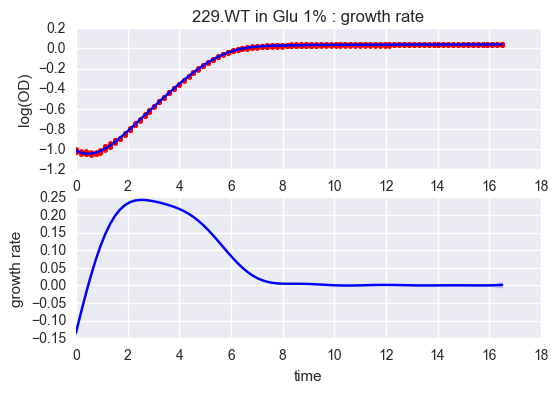


Fitting OD for 409.Hxt4 in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.177523e+03
hparam[0]= 1.471331e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.706046e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 4.079220e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.597011e-01 +/- 1.225925e-03 [1.225925e-04]
 time of max growth rate= 2.859949e+00 +/- 5.144774e-02 [5.144774e-03]
           doubling time= 2.669078e+00 +/- 1.260467e-02 [1.260467e-03]
                  max OD= 1.245613e+00 +/- 1.453075e-03 [1.453075e-04]
                lag time= 1.343025e+00 +/- 1.056713e-02 [1.056713e-03]


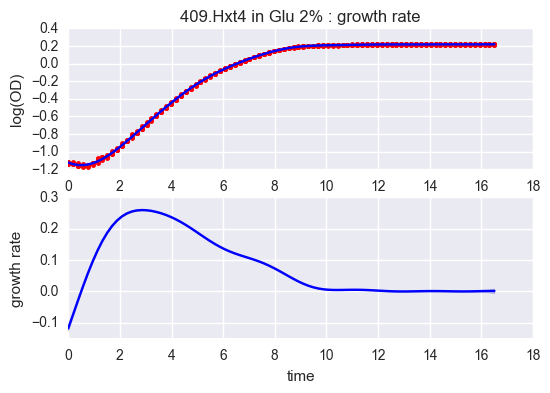


Fitting OD for 403.Hxt4std1 in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.927291e+03
hparam[0]= 1.706610e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.366758e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 9.470658e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.346889e-01 +/- 1.460244e-03 [1.460244e-04]
 time of max growth rate= 3.282844e+00 +/- 9.171545e-02 [9.171545e-03]
           doubling time= 2.953587e+00 +/- 1.838239e-02 [1.838239e-03]
                  max OD= 1.211620e+00 +/- 1.788141e-03 [1.788141e-04]
                lag time= 1.474765e+00 +/- 1.560053e-02 [1.560053e-03]


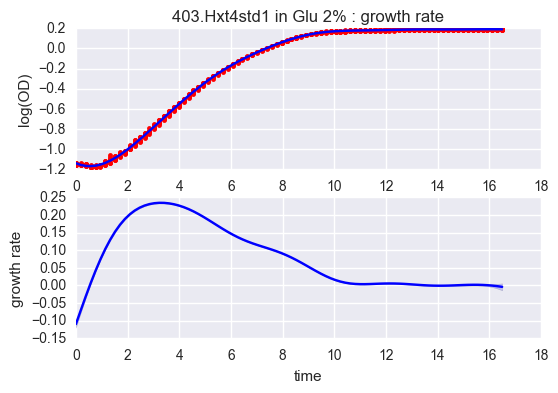


Fitting OD for 506.Hxt4rgt2 in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.406569e+03
hparam[0]= 2.554845e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 9.934992e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 5.353441e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.711192e-01 +/- 2.780641e-03 [2.780641e-04]
 time of max growth rate= 2.867534e+00 +/- 6.162534e-02 [6.162534e-03]
           doubling time= 2.556883e+00 +/- 2.622180e-02 [2.622180e-03]
                  max OD= 1.247173e+00 +/- 3.823297e-03 [3.823297e-04]
                lag time= 1.423309e+00 +/- 3.099853e-02 [3.099853e-03]


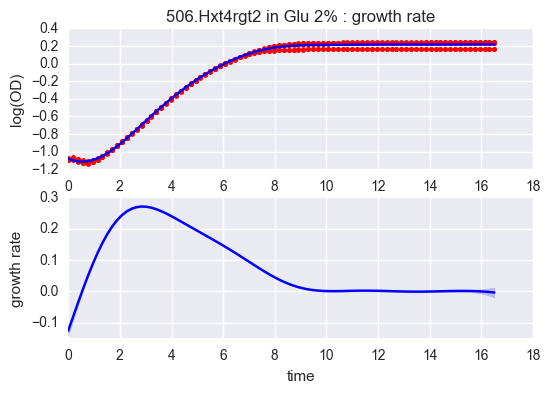


Fitting OD for null in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 8.284946e+02
hparam[0]= 2.641630e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.303806e-04 [1.000000e-06, 1.000000e+02]
hparam[2]= 4.921523e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.822223e-03 +/- 9.557900e-04 [9.557900e-05]
 time of max growth rate= 1.649889e+01 +/- 0.000000e+00 [0.000000e+00]
           doubling time= 1.589485e+03 +/- 1.125029e+04 [1.125029e+03]
                  max OD= 8.874058e-02 +/- 3.080969e-04 [3.080969e-05]
                lag time= 1.159541e+02 +/- 6.879046e+02 [6.879046e+01]


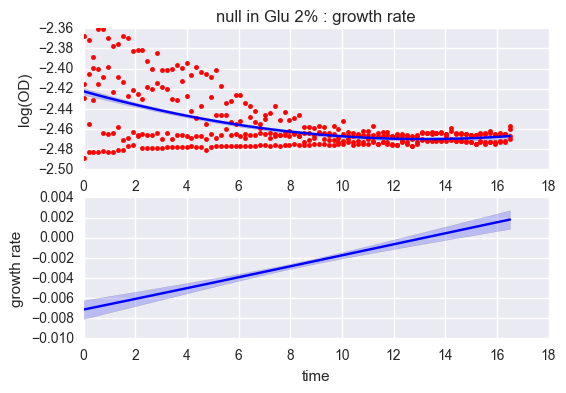


Fitting OD for 229.WT in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.364268e+03
hparam[0]= 1.870825e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.749197e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 2.175468e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.514361e-01 +/- 8.435745e-04 [8.435745e-05]
 time of max growth rate= 2.615287e+00 +/- 7.724148e-02 [7.724148e-03]
           doubling time= 2.756784e+00 +/- 9.259599e-03 [9.259599e-04]
                  max OD= 1.257499e+00 +/- 1.116930e-03 [1.116930e-04]
                lag time= 1.264531e+00 +/- 7.650594e-03 [7.650594e-04]


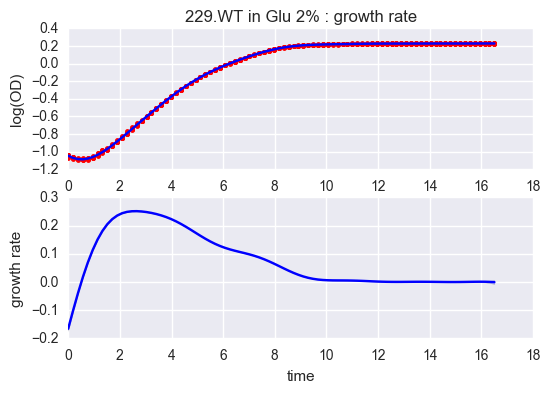


Fitting OD for 409.Hxt4 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.382565e+03
hparam[0]= 1.269845e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.336761e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 4.737645e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.389566e-01 +/- 1.223660e-03 [1.223660e-04]
 time of max growth rate= 2.694846e+00 +/- 7.723017e-02 [7.723017e-03]
           doubling time= 2.900800e+00 +/- 1.485111e-02 [1.485111e-03]
                  max OD= 1.068091e+00 +/- 8.358655e-04 [8.358655e-05]
                lag time= 1.370468e+00 +/- 1.138947e-02 [1.138947e-03]


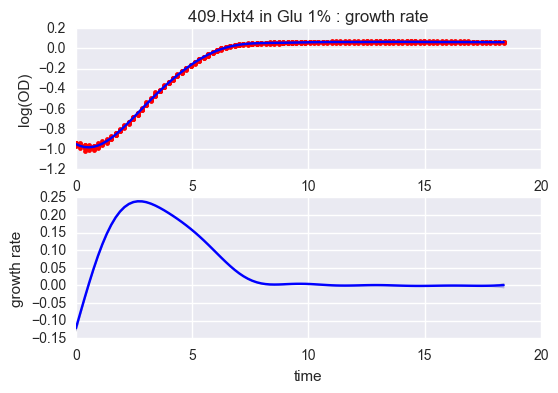


Fitting OD for 403.Hxt4std1 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.214849e+03
hparam[0]= 1.330285e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.186688e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 7.850933e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.387002e-01 +/- 1.404306e-03 [1.404306e-04]
 time of max growth rate= 2.924287e+00 +/- 9.359789e-02 [9.359789e-03]
           doubling time= 2.903941e+00 +/- 1.705384e-02 [1.705384e-03]
                  max OD= 1.026508e+00 +/- 9.333400e-04 [9.333400e-05]
                lag time= 1.445890e+00 +/- 1.554742e-02 [1.554742e-03]


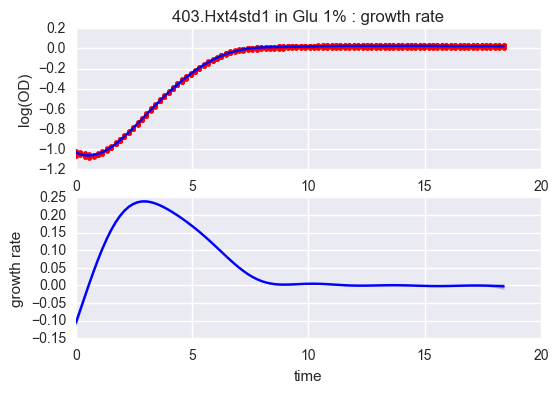


Fitting OD for 506.Hxt4rgt2 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.220245e+03
hparam[0]= 1.315113e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.276249e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 7.694721e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.289885e-01 +/- 1.234514e-03 [1.234514e-04]
 time of max growth rate= 3.053242e+00 +/- 5.689167e-02 [5.689167e-03]
           doubling time= 3.027083e+00 +/- 1.628806e-02 [1.628806e-03]
                  max OD= 1.068758e+00 +/- 9.668518e-04 [9.668518e-05]
                lag time= 1.574442e+00 +/- 1.237256e-02 [1.237256e-03]


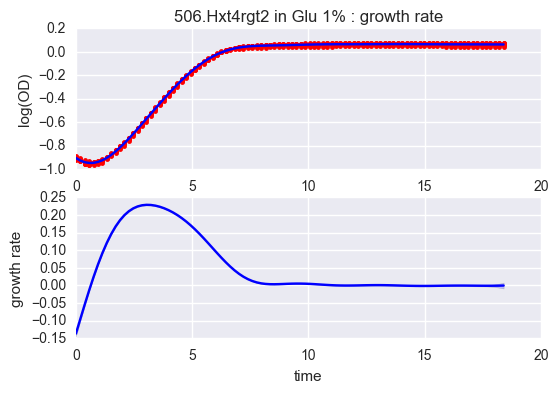


Fitting OD for null in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.316068e+03
hparam[0]= 1.010526e+01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.121187e-05 [1.000000e-06, 1.000000e+02]
hparam[2]= 6.566794e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 9.966114e-04 +/- 2.894447e-04 [2.894447e-05]
 time of max growth rate= 0.000000e+00 +/- 0.000000e+00 [0.000000e+00]
           doubling time= 7.767669e+02 +/- 3.161406e+02 [3.161406e+01]
                  max OD= 7.786072e-02 +/- 4.162597e-05 [4.162597e-06]
                lag time= 0.000000e+00 +/- 0.000000e+00 [0.000000e+00]


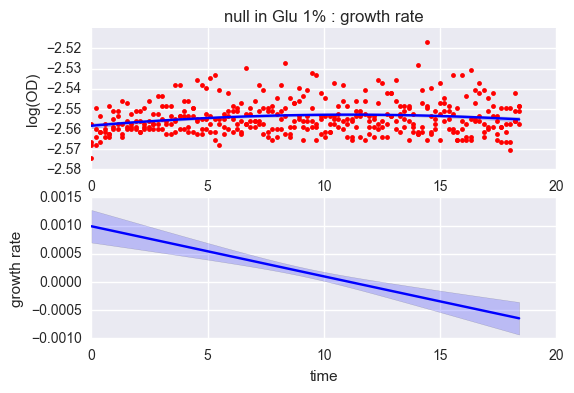


Fitting OD for 229.WT in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.511104e+03
hparam[0]= 8.657218e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.606923e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 3.096444e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.413518e-01 +/- 1.366912e-03 [1.366912e-04]
 time of max growth rate= 2.840847e+00 +/- 2.654556e-02 [2.654556e-03]
           doubling time= 2.872030e+00 +/- 1.629506e-02 [1.629506e-03]
                  max OD= 1.019897e+00 +/- 6.149608e-04 [6.149608e-05]
                lag time= 1.179175e+00 +/- 1.253152e-02 [1.253152e-03]


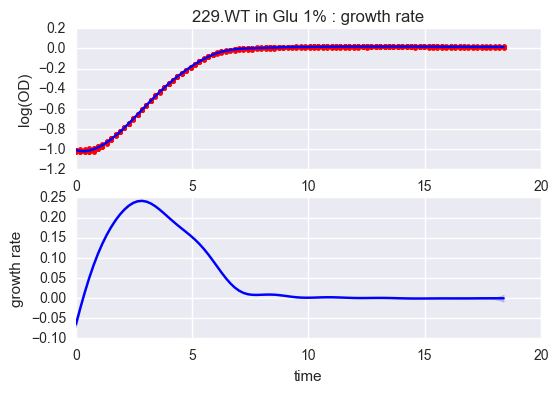


Fitting OD for 409.Hxt4 in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.341089e+03
hparam[0]= 1.272322e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.534560e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 5.311233e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.355598e-01 +/- 1.403647e-03 [1.403647e-04]
 time of max growth rate= 2.878774e+00 +/- 7.285688e-02 [7.285688e-03]
           doubling time= 2.942657e+00 +/- 1.754679e-02 [1.754679e-03]
                  max OD= 9.919383e-01 +/- 7.696168e-04 [7.696168e-05]
                lag time= 1.386752e+00 +/- 1.272287e-02 [1.272287e-03]


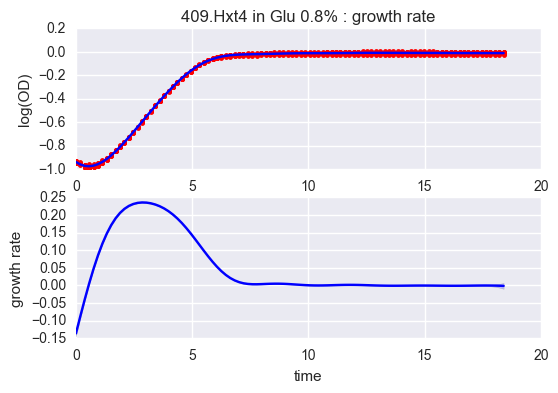


Fitting OD for 403.Hxt4std1 in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.164769e+03
hparam[0]= 1.296373e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.338022e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 9.051679e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.350282e-01 +/- 1.429791e-03 [1.429791e-04]
 time of max growth rate= 3.165129e+00 +/- 8.770670e-02 [8.770670e-03]
           doubling time= 2.949318e+00 +/- 1.790171e-02 [1.790171e-03]
                  max OD= 9.493668e-01 +/- 1.170638e-03 [1.170638e-04]
                lag time= 1.484536e+00 +/- 1.632656e-02 [1.632656e-03]


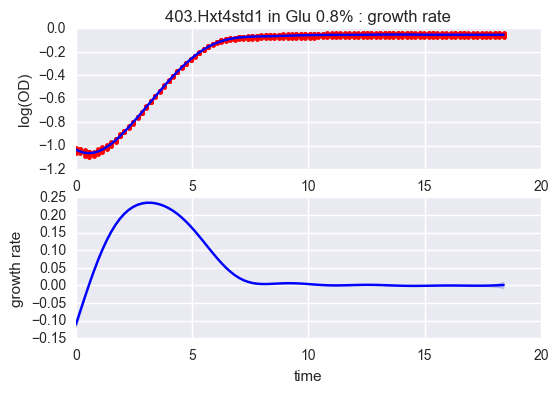


Fitting OD for 506.Hxt4rgt2 in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.279626e+03
hparam[0]= 9.040212e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.678884e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 6.387400e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.273413e-01 +/- 1.338090e-03 [1.338090e-04]
 time of max growth rate= 3.258052e+00 +/- 8.213794e-02 [8.213794e-03]
           doubling time= 3.049034e+00 +/- 1.796733e-02 [1.796733e-03]
                  max OD= 9.878229e-01 +/- 9.941959e-04 [9.941959e-05]
                lag time= 1.581248e+00 +/- 1.564495e-02 [1.564495e-03]


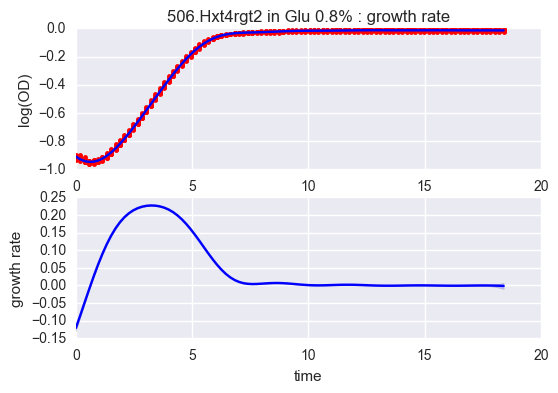


Fitting OD for null in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.519672e+03
hparam[0]= 5.702908e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.788797e-04 [1.000000e-06, 1.000000e+02]
hparam[2]= 2.260100e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.948550e-03 +/- 4.053120e-04 [4.053120e-05]
 time of max growth rate= 0.000000e+00 +/- 0.000000e+00 [0.000000e+00]
           doubling time= 3.718473e+02 +/- 8.048477e+01 [8.048477e+00]
                  max OD= 7.579947e-02 +/- 4.383918e-05 [4.383918e-06]
                lag time= 0.000000e+00 +/- 0.000000e+00 [0.000000e+00]


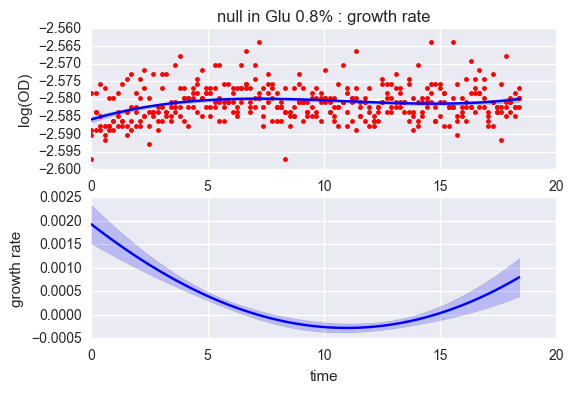


Fitting OD for 229.WT in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.078569e+03
hparam[0]= 1.295789e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.212960e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.176155e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.368060e-01 +/- 1.383494e-03 [1.383494e-04]
 time of max growth rate= 2.846536e+00 +/- 4.235961e-02 [4.235961e-03]
           doubling time= 2.927168e+00 +/- 1.711803e-02 [1.711803e-03]
                  max OD= 9.938493e-01 +/- 1.123774e-03 [1.123774e-04]
                lag time= 1.130094e+00 +/- 1.778678e-02 [1.778678e-03]


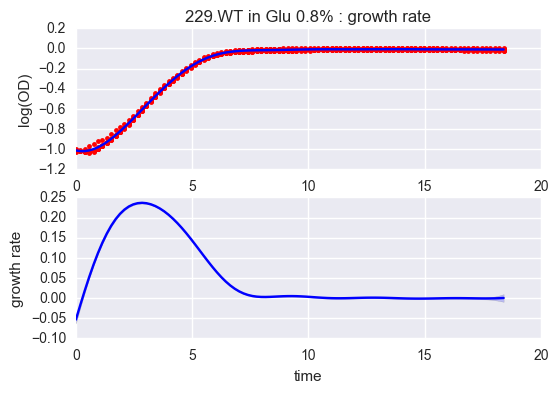


Fitting OD for 409.Hxt4 in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.510610e+03
hparam[0]= 1.489203e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 9.374790e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 6.402815e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.411369e-01 +/- 2.882911e-03 [2.882911e-04]
 time of max growth rate= 2.831366e+00 +/- 4.837871e-02 [4.837871e-03]
           doubling time= 2.874910e+00 +/- 3.451965e-02 [3.451965e-03]
                  max OD= 8.772589e-01 +/- 3.061200e-03 [3.061200e-04]
                lag time= 1.403776e+00 +/- 4.025737e-02 [4.025737e-03]


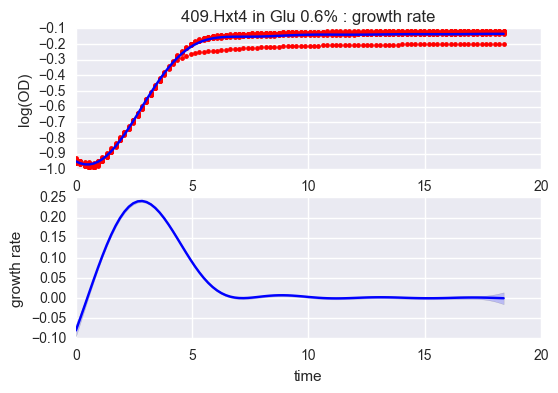


Fitting OD for 403.Hxt4std1 in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.570321e+03
hparam[0]= 1.772842e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 8.008424e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 5.383726e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.433694e-01 +/- 2.045150e-03 [2.045150e-04]
 time of max growth rate= 3.034278e+00 +/- 4.440892e-16 [4.440892e-17]
           doubling time= 2.848330e+00 +/- 2.398338e-02 [2.398338e-03]
                  max OD= 8.792741e-01 +/- 3.092459e-03 [3.092459e-04]
                lag time= 1.468636e+00 +/- 3.074639e-02 [3.074639e-03]


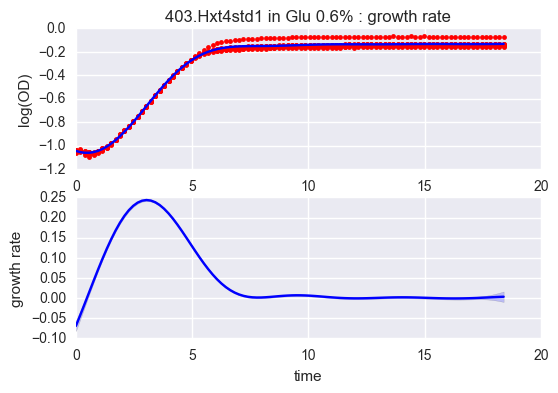


Fitting OD for 506.Hxt4rgt2 in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.286737e+03
hparam[0]= 8.761127e-02 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.088045e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 6.163383e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.293397e-01 +/- 1.429886e-03 [1.429886e-04]
 time of max growth rate= 3.322529e+00 +/- 9.474356e-02 [9.474356e-03]
           doubling time= 3.022477e+00 +/- 1.884447e-02 [1.884447e-03]
                  max OD= 9.220120e-01 +/- 1.188587e-03 [1.188587e-04]
                lag time= 1.601226e+00 +/- 1.632659e-02 [1.632659e-03]


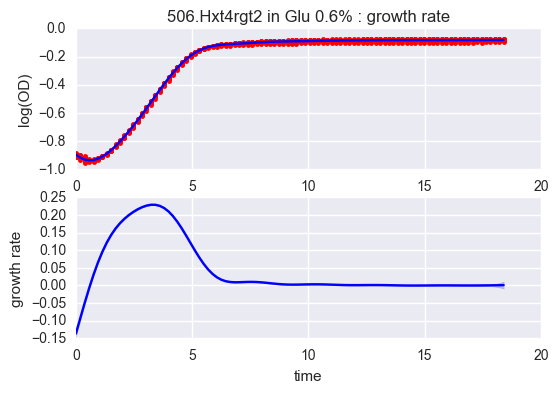


Fitting OD for null in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.268043e+03
hparam[0]= 1.033775e+01 [1.000000e-05, 1.000000e+05]
hparam[1]= 3.263040e-05 [1.000000e-06, 1.000000e+02]
hparam[2]= 8.377575e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 1.750146e-03 +/- 3.493749e-04 [3.493749e-05]
 time of max growth rate= 0.000000e+00 +/- 0.000000e+00 [0.000000e+00]
           doubling time= 4.159972e+02 +/- 1.073360e+02 [1.073360e+01]
                  max OD= 7.606590e-02 +/- 4.419672e-05 [4.419672e-06]
                lag time= 0.000000e+00 +/- 0.000000e+00 [0.000000e+00]


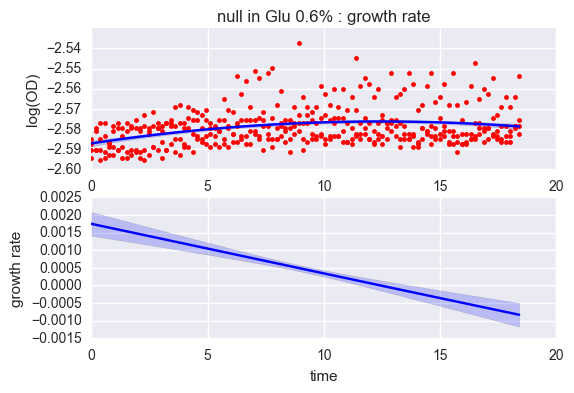


Fitting OD for 229.WT in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.072831e+03
hparam[0]= 1.293909e-01 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.388040e-01 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.187259e-04 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max growth rate= 2.387531e-01 +/- 1.780124e-03 [1.780124e-04]
 time of max growth rate= 3.021003e+00 +/- 4.838580e-02 [4.838580e-03]
           doubling time= 2.903357e+00 +/- 2.158425e-02 [2.158425e-03]
                  max OD= 8.674277e-01 +/- 1.916729e-03 [1.916729e-04]
                lag time= 1.092857e+00 +/- 1.846783e-02 [1.846783e-03]


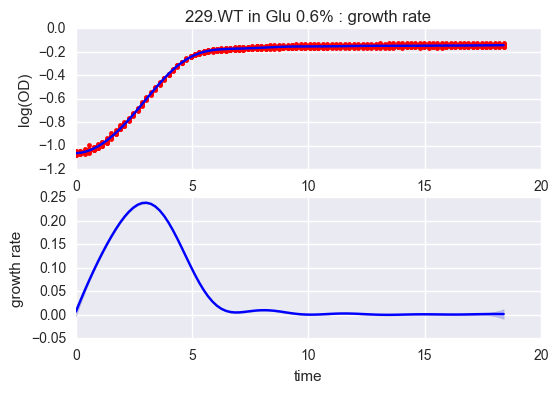

In [14]:
xpr.getstats()

FLperod gr  GFP  c-GFPperod
p20160701.pkl     NaN  1  1.0         1.0
p20160630.pkl     NaN  1  1.0         1.0
p20160704.pkl     NaN  1  1.0         1.0
p20160703.pkl     NaN  1  1.0         1.0
p20160702.pkl     NaN  1  1.0         1.0
p20160629.pkl     NaN  1  1.0         1.0

## Checking all condition contents in the experiments

xpr.allContents contains all unique conditions in the experiments.

In [256]:
xpr.allContents.head() ###head just shows a few rows of the dataframe . remove head to see it all.


media        strain
0  Glu 1%  506.Hxt4rgt2
1  Glu 1%          null
2  Glu 1%      409.Hxt4
3  Glu 1%        229.WT
4  Glu 1%  403.Hxt4std1

## Finding experiments with a particular condition
In the end, xpr.listcontents() provides a comprehensive list. But we are lazy and want a list of all experiments that contain a specific combination of media and strain. therefore we do:

In [257]:
media='Glu 2%'
strain='409.Hxt4'
xpr.containssetup(media, strain, strict=False) #we interrogate which experiments contain the desired condition. 
#It automatically looks for experiments where growth rate has been calculated, unless we specify strict to be False
print('experiments with such condition:' ,xpr.containslist) #containslist temporarily stores the list of experiments that have the condition 
xpr.containssetup(media, strain, strict=True) #we interrogate which experiments contain the desired condition. 
print('experiments with such condition and growth rate calculated for it:' ,xpr.containslist)

#Warning: containslist gets modified constantly so make sure you call containssetup when you need it.



experiments with such condition: ['p20160630.pkl', 'p20160629.pkl']
experiments with such condition and growth rate calculated for it: ['p20160630.pkl', 'p20160629.pkl']


## Assessing replicate quality

It is important to assess how reproducible is the growth and fluorescence of individual experiments before proceeding to 
do more complicated analyses. we have 7 within-experiment replicates per condition, and 2 biological replicates. lets assess how they vary by plotting the raw data. 

### Assigning, randomising and storing plot colors

If you notice closely, the method xpr.plotRawReplicates  outputs a dictionary that indicates what color was used for each experiment. you can iterate this process many times until you find a color set you like, or provide the color dictionary yourself through the argument exptColors. Keep this trick in mind for other plotting functions. 

{'p20160629.pkl': '#8253c5', 'p20160630.pkl': '#5bb4be'}

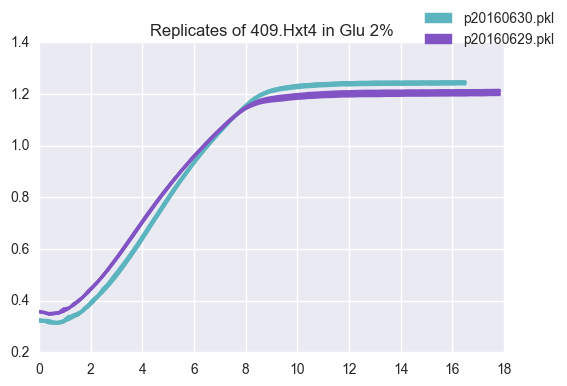

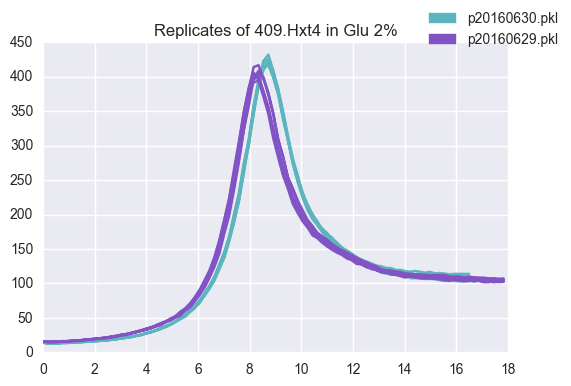

In [42]:
exptColors=xpr.plotrawreplicates(media,strain, dtype='OD')
plt.figure()
xpr.plotrawreplicates(media,strain, dtype='GFP', exptColors=exptColors)


It seems as though there is some (though tolerable) biological replicate variation even thought these technical replicates are near-impecable. If we realize that there are super dodgy experiments, we could go back and ignore them from the accesspr structure.

## Checking processing status
We check whether the experiments have been processed: a) the growth curves have been fitted and b) the Fluorescence has been corrected. having experiments whose processing may be incomplete might interfere with certain analyses. 

We are particularly interested in knowing, besides the basics, whether the fluorescence time derivative has been calculated. we interrogate about this too.

### Checking for more and more statistics

You can add and update the process of as many statistics as you want, and these checks will be recorded as long as one experiment contains the statistic.


In [262]:
xpr.alignAll(rerun=True)
xpr.containsstat('c-GFPperod')#now  checking for the flperod derivative
xpr.statContents
xpr.containsstat('Time centered at gr peak')#now  checking for the flperod derivative
xpr.statContents

aligning experiment  p20160630.pkl
aligning experiment  p20160704.pkl
aligning experiment  p20160703.pkl
aligning experiment  p20160702.pkl
aligning experiment  p20160629.pkl
aligning experiment  p20160701.pkl
Experiments aligned successfully.


FLperod gr  GFP  c-GFPperod  Time centered at gr peak
p20160630.pkl     NaN  1  1.0         1.0                      0.75
p20160704.pkl     NaN  1  1.0         1.0                      0.75
p20160703.pkl     NaN  1  1.0         1.0                      0.75
p20160702.pkl     NaN  1  1.0         1.0                      0.75
p20160629.pkl     NaN  1  1.0         1.0                      0.75
p20160701.pkl     NaN  1  1.0         1.0                      0.75

It looks like all experiments have the growth rate calculated, and that 3/4ths of the strains have the FLperod also calculated. I suspect the missing one is the untagged strain, for which the FLperod is not calculated. For now we won't bother too much about it.



# Plotting time-series information

## Combining replicates from different experiments

The challenge of combining replicates from different experiments, besides the obvious fact that= matching replicates are disperesed within the dataset, is:

* **sampling times for the same time series vary.** one experiment may have been measured at 3 hours, whereas another one may have been measured at 3.2. Even though the times are similar, collapsing them together just like that would be not only wrong – we would lose important information about the timing of events.  

* **lag time variability of cell growth**. As we are studying cells from stationary phase, release from the lag could vary each time.

The function xpr.plotReplicateMean solves these two problems by: 
* aligns all experiments by so that the time of the max growth rate is 0
* making sure all experiments have the same sampling times using interpolation 


## New: bootstrapping replicates for different experiments (not displayed)

When several replicates for one experiment are collected, one could simply average them all, but one or 2 experiments may affect the mean estimation. therefore by adding the argument bootstrap = n, then the average of n random combinations of experiments is put together, increasing robustness to outlier experiments. bootstraping is not done for individual values, but for the entire experiment value. 

In this tutorial we do not show this as there are only 2 experiments per condition, but this can be done when collecting more experiments.






processing experimentp20160629.pkl...
processing experimentp20160630.pkl...
processing experimentp20160629.pkl...
processing experimentp20160630.pkl...
processing experimentp20160629.pkl...
processing experimentp20160630.pkl...
processing experimentp20160629.pkl...
processing experimentp20160630.pkl...
processing experimentp20160629.pkl...
processing experimentp20160630.pkl...
processing experimentp20160629.pkl...
processing experimentp20160630.pkl...


/Users/s1259407/anaconda3/lib/python3.5/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/Users/s1259407/anaconda3/lib/python3.5/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


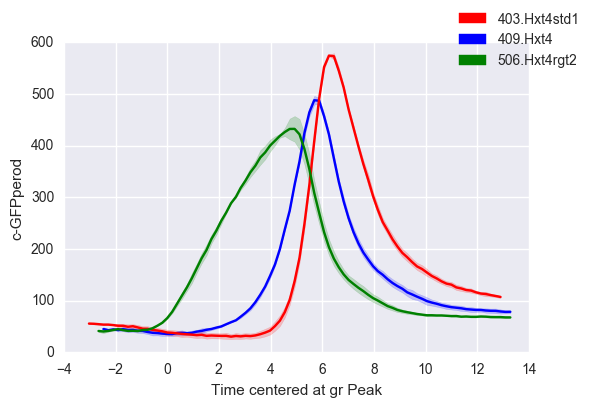

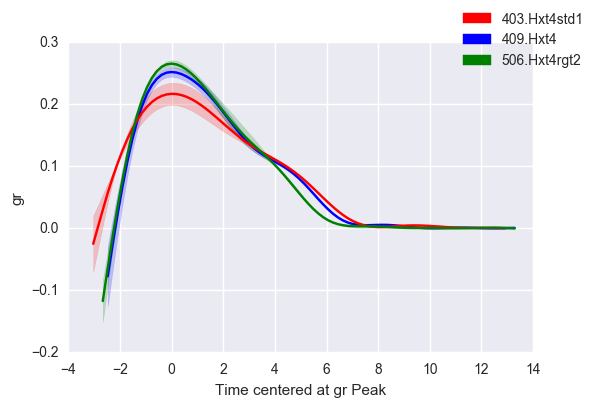

In [61]:
media='Glu 2%'
strainColors= {'409.Hxt4': 'blue', '403.Hxt4std1':'red', '506.Hxt4rgt2':'green'}
for st in strainColors.keys():
    xpr.plotReplicateMean(media, st,dtype='c-GFPperod', col=strainColors[st]) 
createFigLegend(dic=strainColors)
#plotting growth rate
plt.figure()
for st in strainColors.keys():
    xpr.plotReplicateMean(media, st,dtype='gr', col=strainColors[st])
createFigLegend(dic=strainColors)


#xpr.containssetup(media, '403.Hxt4std1')


We can also do the same plot for multiple media (one strain). Therefore we can spot any processing faults and problematic conditions if they exist.

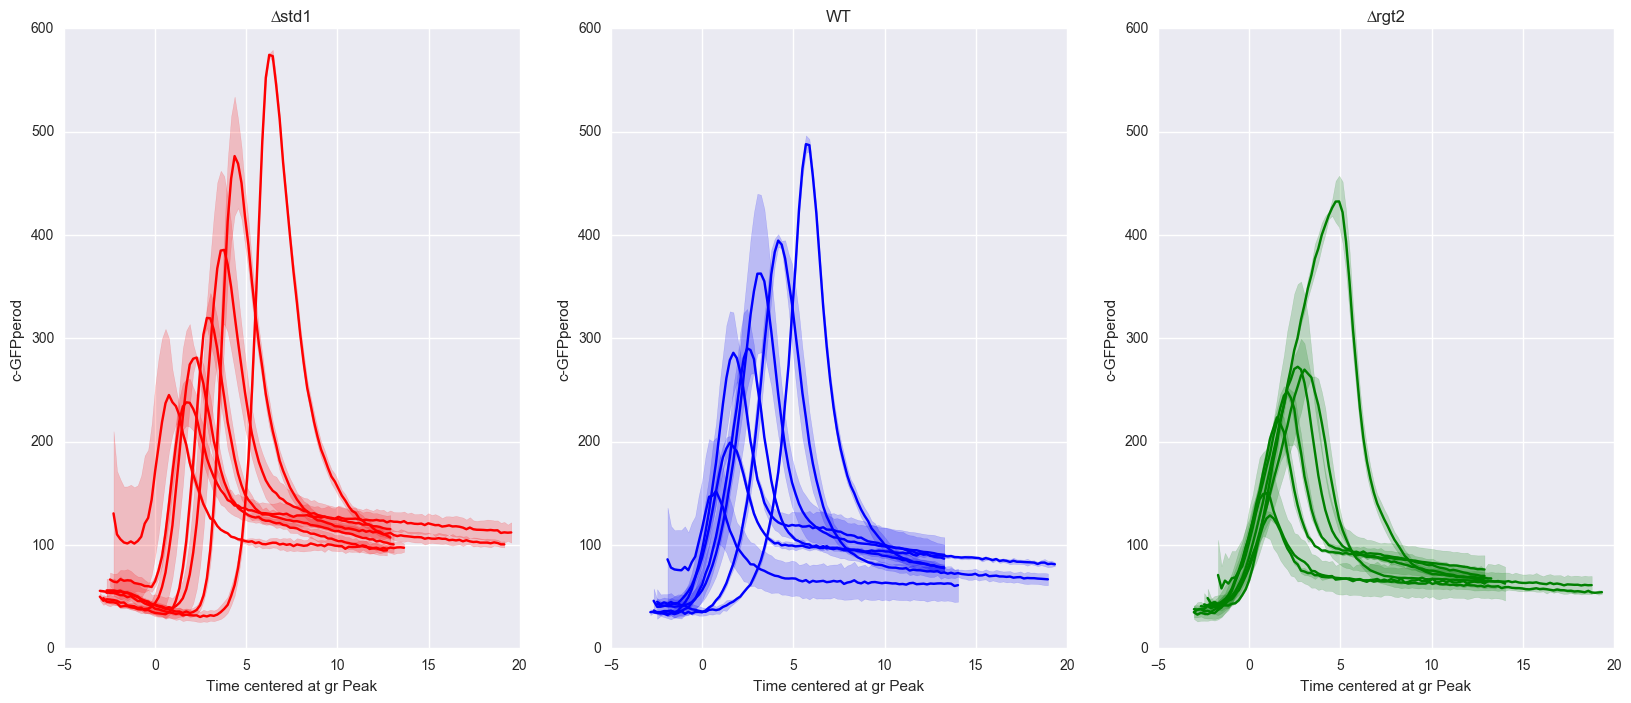

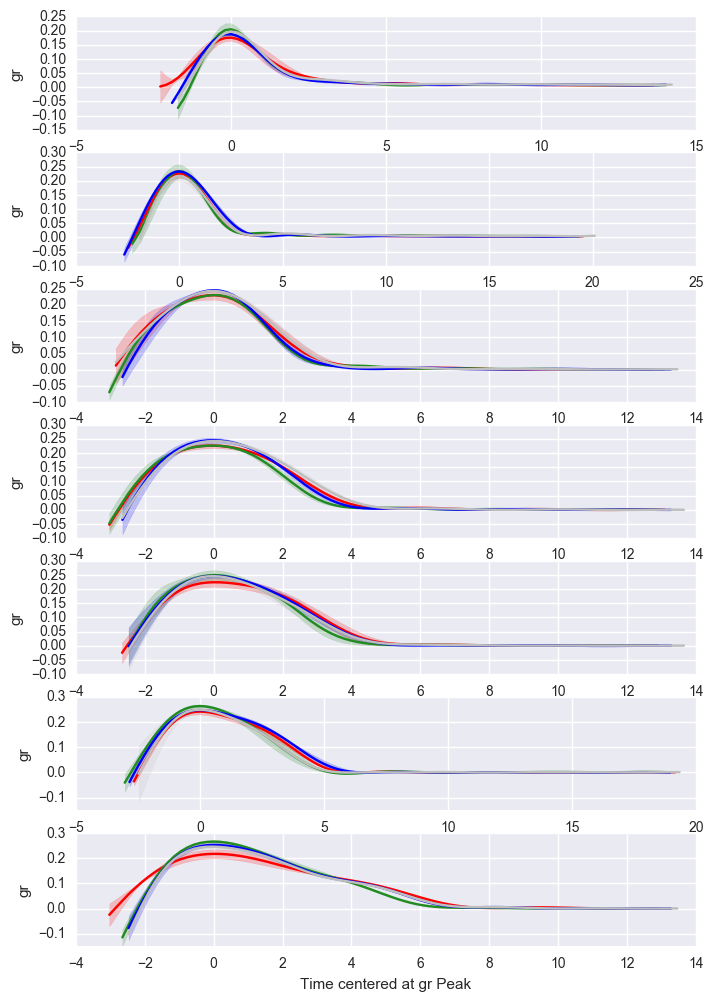

In [122]:
strainColors= {'229.WT': '#bebebe','409.Hxt4': '#0000ff', '403.Hxt4std1':'#ff0000', '506.Hxt4rgt2':'#228b22'}

plt.figure(figsize=[20,8])
plt.subplot(1,3,1)
xpr.plotReplicateMean(media=['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'],strain='403.Hxt4std1',dtype='c-GFPperod', col='red')
plt.title('∆std1')
plt.ylim([0,600])
plt.subplot(1,3,2)

plt.title('WT')
xpr.plotReplicateMean(media=['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'],strain='409.Hxt4',dtype='c-GFPperod', col='blue')
plt.ylim([0,600])
plt.subplot(1,3,3)

xpr.plotReplicateMean(media=['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'],strain='506.Hxt4rgt2',dtype='c-GFPperod', col='green')
plt.ylim([0,600])
plt.title('∆rgt2')

media=['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%']

plt.figure(figsize=[8,12])
for j in range(0,np.size(media)):
    for st in strainColors.keys():
        plt.subplot(7,1, j+1)
        try:
            xpr.plotReplicateMean(media=media[j],strain=st,dtype='gr', col=strainColors[st])
            #plt.ylim([0,600])
        except:
            continue





## Calculating the derivative of a data type and its statistics.

the pr.correctauto() function is able to perform gaussian process fitting of growth rates, but also can do it for fluorescence and other variables like growth rate. However, as of version  4.5, doing this for many channels is a bit problematic. 

As a temporary, quick and dirty  solution to this problem, if you absolutely need change rate statistics calculation, you can calculate a simple gradient and some statistics about it through the function xpr.statDerivative(dtype).
Make sure you provide only single vector variables, such as c-GFPperod or ODmn or gr.

In [25]:
xpr.statDerivative('c-GFPperod')
xpr.statDerivative('gr')

experiment p20160701.pkl media Glu 0.4% strain 403.Hxt4std1 :
experiment p20160701.pkl media Glu 0.4% strain 506.Hxt4rgt2 :
experiment p20160701.pkl media Glu 0.4% strain 409.Hxt4 :
experiment p20160701.pkl media Glu 0.4% strain 229.WT :
experiment p20160701.pkl media Glu 1% strain 403.Hxt4std1 :
experiment p20160701.pkl media Glu 1% strain 506.Hxt4rgt2 :
experiment p20160701.pkl media Glu 1% strain 409.Hxt4 :
experiment p20160701.pkl media Glu 1% strain 229.WT :
experiment p20160701.pkl media Glu 1.5% strain 403.Hxt4std1 :
experiment p20160701.pkl media Glu 1.5% strain 506.Hxt4rgt2 :
experiment p20160701.pkl media Glu 1.5% strain 409.Hxt4 :
experiment p20160701.pkl media Glu 1.5% strain 229.WT :
experiment p20160630.pkl media Glu 2% strain 403.Hxt4std1 :
experiment p20160630.pkl media Glu 2% strain 506.Hxt4rgt2 :
experiment p20160630.pkl media Glu 2% strain 409.Hxt4 :
experiment p20160630.pkl media Glu 2% strain 229.WT :
experiment p20160630.pkl media Glu 1% strain 403.Hxt4std1 :
expe

## Managing colours and figure legends (quick primer)
Usually you want to assign colours to specific conditions or strains. xpr functions in general receive dictionaries where each strain or media
is assigned a colour and assigns random colours when needed. you can quickly create  colour dictionaries and figure legends from those dictionaries like this. 

Note: dictionaries are not ordered, so reordering the label manually can be super tedious. a solution to this is to create a colour dictionary from a <b>sorted list of keys</b>

the dictionary is: {'Glu 0.2%': '#f7fcf0', 'Glu 0.6%': '#ccebc5', 'Glu 1.5%': '#4eb3d3', 'Glu 0.4%': '#e0f3db', 'Glu 1%': '#7bccc4', 'Glu 0.8%': '#a8ddb5', 'Glu 2%': '#2b8cbe'}


/Users/s1259407/anaconda3/lib/python3.5/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


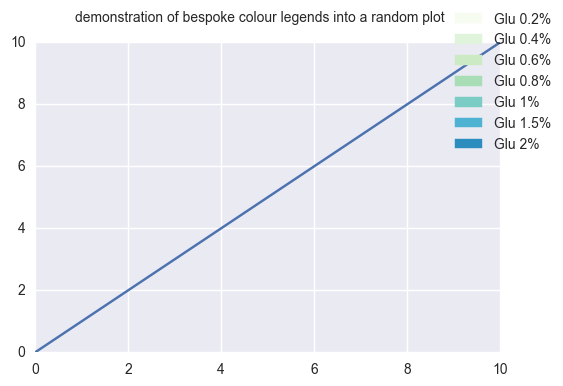

In [82]:
plt.plot(np.linspace(0,10,10),np.linspace(0,10,10))
plt.suptitle('demonstration of bespoke colour legends into a random plot')
## went to http://colorbrewer2.org and stole a nice gradient of blues

blueColors=['#f7fcf0',
'#e0f3db',
'#ccebc5',
'#a8ddb5',
'#7bccc4',
'#4eb3d3',
'#2b8cbe',
'#08589e']

##colorDict is in prPlottingFunctions
##create coloured dictionary ordered from lowest to highest concentration of my glucoses. 
bc= colorDict(keys=np.sort(list(xpr.allMedia)), colors=blueColors)
print('the dictionary is:', bc)

#createFigLegend is in prPlottingFunctions              
##insert a figure legend in our plot using this dictionary. 
createFigLegend(dic=bc)
##Note: Careful when calling createFigLegend multiple times as it will yield unexpected results!

## Line plots of X vs Y coloured by Z

Colouring an xy line piece wise by another factor can help find non obvious sequence patterns across several variables. We can do this with the function colorContour, in prPlottingFunctions.

Here we show
the growth rate curves for many concentrations, but when we colour by the GFP production rate we can see nice gene activation waves, and how they are disrupted in the mutants.

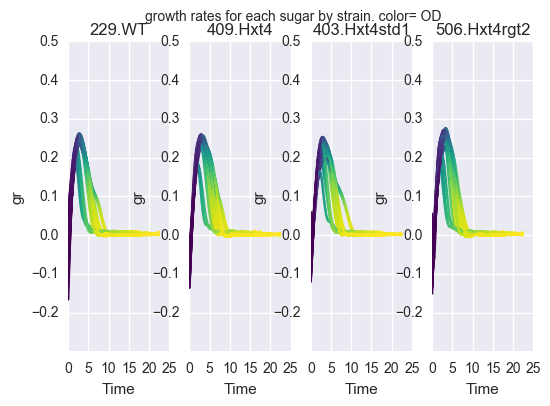

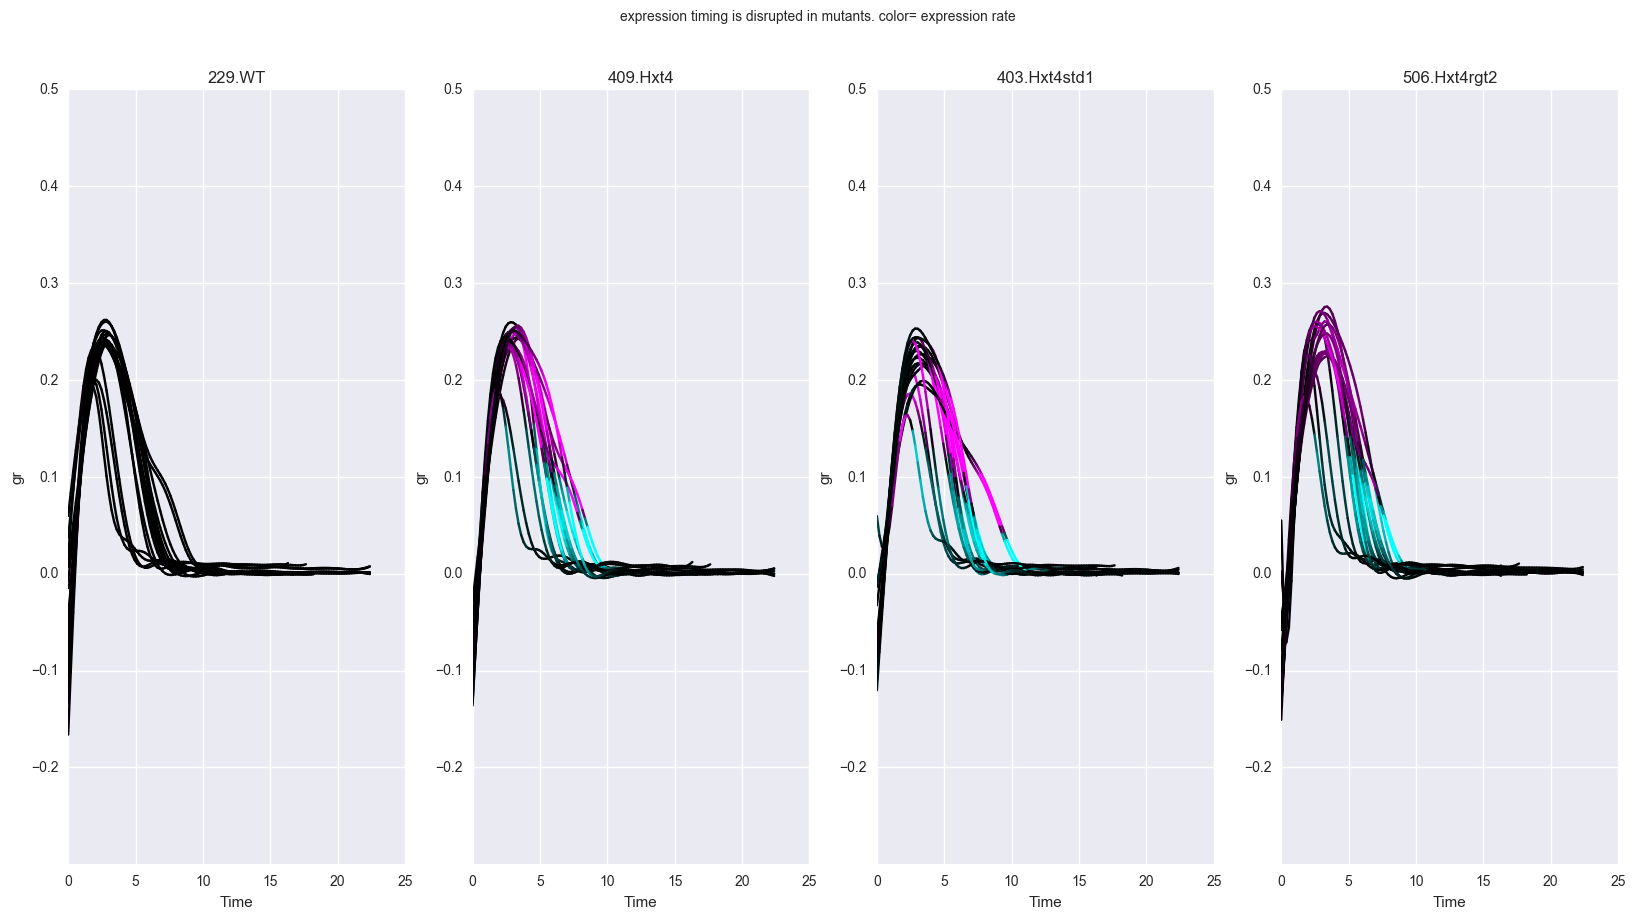

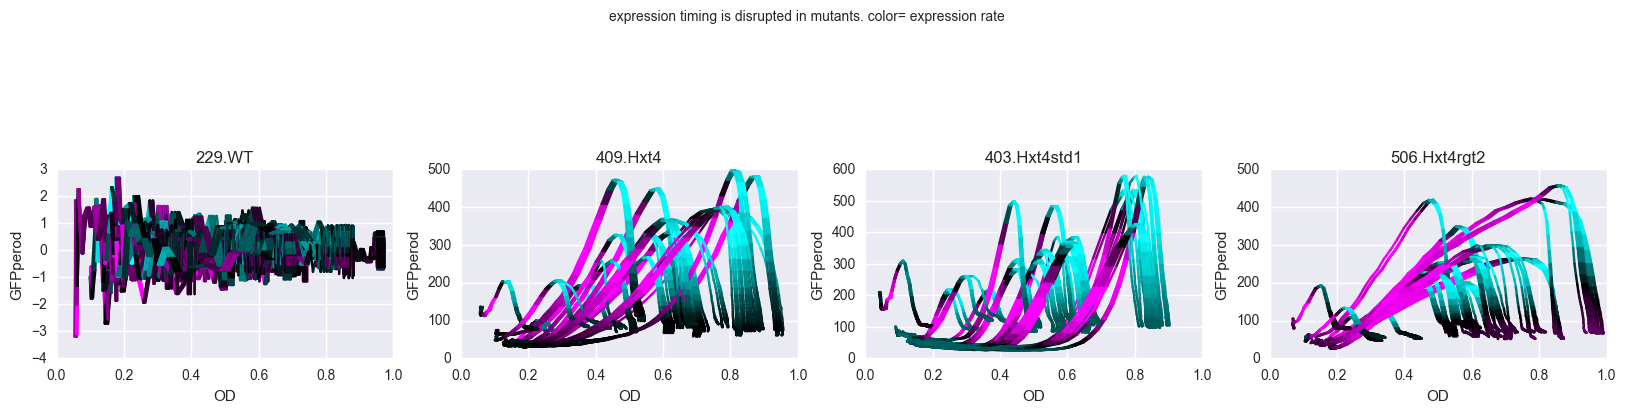

In [123]:


cols=np.row_stack([np.column_stack([np.linspace(0,0,100),np.linspace(1,0,100),np.linspace(1,0,100),np.linspace(1,1,100)]),
np.column_stack([np.linspace(0,1,100),np.linspace(0,0,100),np.linspace(0,1,100),np.linspace(1,1,100)])])

cmap = matplotlib.colors.ListedColormap(cols, name='from_list', N=None)

colorBy='d/dtc-GFPperod'
xstat='time'

for expt in xpr.allExperiments:
    #plt.figure()
    plt.suptitle('growth rates for each sugar by strain. color= OD')
    for j in range(0,np.size(xpr.data[expt].allstrains)):
        strain=xpr.data[expt].allstrains[j]
        plt.subplot(1,np.size(xpr.data[expt].allstrains), j+1)
        for md in xpr.data[expt].d.keys():
            colorContour(xpr.data[expt], media=md, strain=strain, xstat=xstat, colorBy='ODmn', ystat='gr', vmin=0,vmax=2, cmap='viridis')
            plt.ylim([-.3, .5])
            plt.title(strain)
            plt.xlabel('Time')
            plt.ylabel('gr')
#plt.colorbar()
plt.figure(figsize=[20,10])

for expt in xpr.allExperiments:
    #plt.figure()
    plt.suptitle('expression timing is disrupted in mutants. color= expression rate')
    for j in range(0,np.size(xpr.data[expt].allstrains)):
        strain=xpr.data[expt].allstrains[j]
        plt.subplot(1,np.size(xpr.data[expt].allstrains), j+1)
        for md in xpr.data[expt].d.keys():
            colorContour(xpr.data[expt], media=md, strain=strain, xstat=xstat, ystat='gr', colorBy=colorBy, cmap=cmap, vmin=-30, vmax=30)
            plt.ylim([-.3, .5])
            plt.title(strain)
            plt.xlabel('Time')
            plt.ylabel('gr')
            
plt.figure(figsize=[20,20])

for expt in xpr.allExperiments:
    #plt.figure()
    plt.suptitle('expression timing is disrupted in mutants. color= expression rate')
    for j in range(0,np.size(xpr.data[expt].allstrains)):
        strain=xpr.data[expt].allstrains[j]
        plt.subplot(7,np.size(xpr.data[expt].allstrains), j+1)
        for md in xpr.data[expt].d.keys():
            colorContour(xpr.data[expt], media=md, strain=strain, xstat='OD', ystat='c-GFPperod', colorBy=colorBy, cmap=cmap)#color=strainColors[strain])
            #plt.ylim([-.3, .5])
            #plt.xlim([-.2, 2])
            plt.title(strain)
            plt.xlabel('OD')
            plt.ylabel('GFPperod')
#plt.colorbar()

## Thresholding and overlaying contour plots

Some times it is good to place lines for different strains on the same plot and only highlight specific values values above a certain cutoff.
for a solid color, set color to a particular color and the color gradient will be ignored in favour of a solid line. 

cu=n allows you to set a plotting threshold for the colouring variable.

/Users/s1259407/anaconda3/lib/python3.5/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


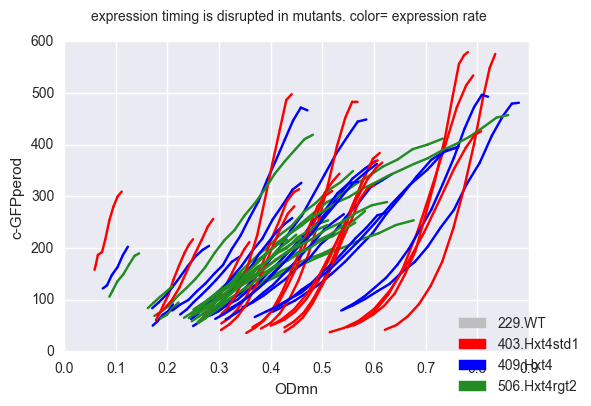

In [113]:
cu=10
plt.figure()
xstat='ODmn'
ystat='c-GFPperod'
colorBy='d/dtc-GFPperod'
for expt in xpr.allExperiments:
    #plt.figure()
    plt.suptitle('expression timing is disrupted in mutants. color= expression rate')
    for j in range(0,np.size(xpr.data[expt].allstrains)):
        strain=xpr.data[expt].allstrains[j]
        #plt.subplot(1,np.size(xpr.data[expt].allstrains), j+1)
        for md in xpr.data[expt].d.keys():
            colorContour(xpr.data[expt], media=md, strain=strain, xstat=xstat, ystat=ystat, colorBy=colorBy,color=strainColors[strain], cutoff=cu)
            #plt.ylim([-.1, .3])
            #plt.xlim([0, 8])
            #plt.title(strain)
            plt.xlabel(xstat)
            plt.ylabel(ystat)
            
createFigLegend(dic=strainColors, loc='lower right')

## Comparing values at specific timepoints

Perhaps what is interesting is not the full time series, but specific values of our replicates at specific timepoints of it (for example, the max growth rate time, or exactlu 4.5 hours after induction. 

To this aim, we will use the functions timeStat, timeStatAligned and timeStatAll. 

For specific media and strain,

* xpr.timeStat(media, strain, times=[4], includeMediaStrain=True) retrieves a time-dependent statistic at specific time points (hrs) from the start of the experiment. 
* xpr.timeStatAligned(media, strain, times=[0], includeMediaStrain=True) retrieves a time-dependent statistic at specific time points (hrs) relative to the time of max growth rate of a specific strain.
* xpr.timeStatAll(times, aligned=False, includeMediaStrain=True)  retrieves a time-dependent statistic at specific time points. aligned determintes wherhet the times are absolute or relative to the max growth rate of the experiment.

The functions return a **dataframe** with the columns **experiment, media, strain**, and a column for each time.  

In [92]:
xpr.timeStat('Glu 2%', '409.Hxt4', times=[0,2,4,6], dtype='c-GFPperod')

experiment         machine   media    strain        0        2        4  \
0  p20160630.pkl  Plate Reader 2  Glu 2%  409.Hxt4  49.2204  36.1307  36.7177   
1  p20160629.pkl  Plate Reader 2  Glu 2%  409.Hxt4   48.582  42.3768  47.1521   

         6  
0  85.3893  
1  101.554

In [93]:
xpr.timeStatAligned('Glu 2%', '409.Hxt4', times=[-1,0,1], dtype='GFPmn') ##retrieving 1 hr before and after max growth rate time

experiment         machine   media    strain       -1        0        1
0  p20160630.pkl  Plate Reader 2  Glu 2%  409.Hxt4  15.8513  19.2357  25.8405
1  p20160629.pkl  Plate Reader 2  Glu 2%  409.Hxt4  17.4086  21.1343  28.1871

In [94]:
timedf=xpr.timeStatAll(times=[0,2,4,6,8,10], aligned=False, dtype='GFP')
timedf.head() ##to see the full thing remove .head()

experiment         machine     media        strain        0        2  \
0  p20160701.pkl  Plate Reader 2  Glu 0.4%  403.Hxt4std1  18.4643  23.1905   
1  p20160702.pkl  Plate Reader 2  Glu 0.4%  403.Hxt4std1  18.3329  21.2238   
2  p20160701.pkl  Plate Reader 2  Glu 0.4%  506.Hxt4rgt2  14.7486  18.8065   
3  p20160702.pkl  Plate Reader 2  Glu 0.4%  506.Hxt4rgt2  15.9429  22.2516   
4  p20160701.pkl  Plate Reader 2  Glu 0.4%      409.Hxt4  14.0443  19.1442   

         4        6        8       10  
0   84.893  67.5972  62.0416  61.9961  
1  78.8535  70.4194  62.8294  62.9675  
2  53.1833  41.7425  41.3576  41.6483  
3   41.025  33.8715  33.3433  33.7041  
4  66.7055  62.4411  55.1014  56.1975

Then we can transform the dataframe so that the time columns are reorganized into one variable column. this will allow us to do fancy plots.

In [95]:
## putting all the time values as a single value variable 'time'. This removes the individual time columns and creates a
##an extra row per condition per time. then we can plot by time as a category.
tidydf=pd.melt(timedf, id_vars=['media', 'strain'], value_vars=[0,2,4,6,8,10], var_name='time', value_name='c-GFPperod')
tidydf.head()

media        strain time c-GFPperod
0  Glu 0.4%  403.Hxt4std1    0    18.4643
1  Glu 0.4%  403.Hxt4std1    0    18.3329
2  Glu 0.4%  506.Hxt4rgt2    0    14.7486
3  Glu 0.4%  506.Hxt4rgt2    0    15.9429
4  Glu 0.4%      409.Hxt4    0    14.0443

## Working on a subsection of a dataframe
Sometimes we have too many strains or too many conditions. In this particular case we have too many media.

We want to work with  only 3 representative media. To do this, we type:
    

In [96]:
##For simplicity we will work with 3 media only
tidydf=ac.DFsubset(tidydf, 'media', ['Glu 0.2%', 'Glu 0.4%', 'Glu 0.6%', 'Glu 1%', 'Glu 2%'])
tidydf.head()

media        strain time c-GFPperod
48  Glu 0.2%  403.Hxt4std1    0    16.0329
49  Glu 0.2%  403.Hxt4std1    0      16.69
50  Glu 0.2%  506.Hxt4rgt2    0    14.8029
51  Glu 0.2%  506.Hxt4rgt2    0    15.0833
52  Glu 0.2%      409.Hxt4    0    13.8671

### Response dynamics of Hxt4-yEGFP at different concentrations


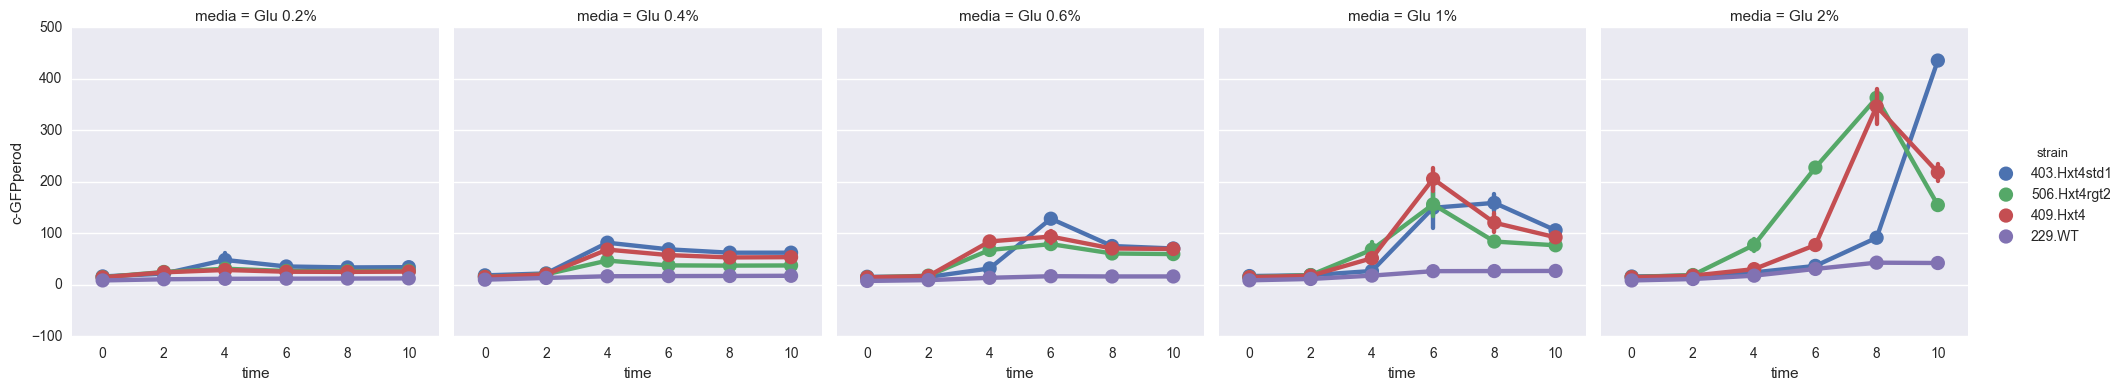

In [97]:

sns.factorplot(x='time', y='c-GFPperod',hue= 'strain', col='media', data=tidydf)



### Glucose response curve of Hxt4-yEGFP at different times

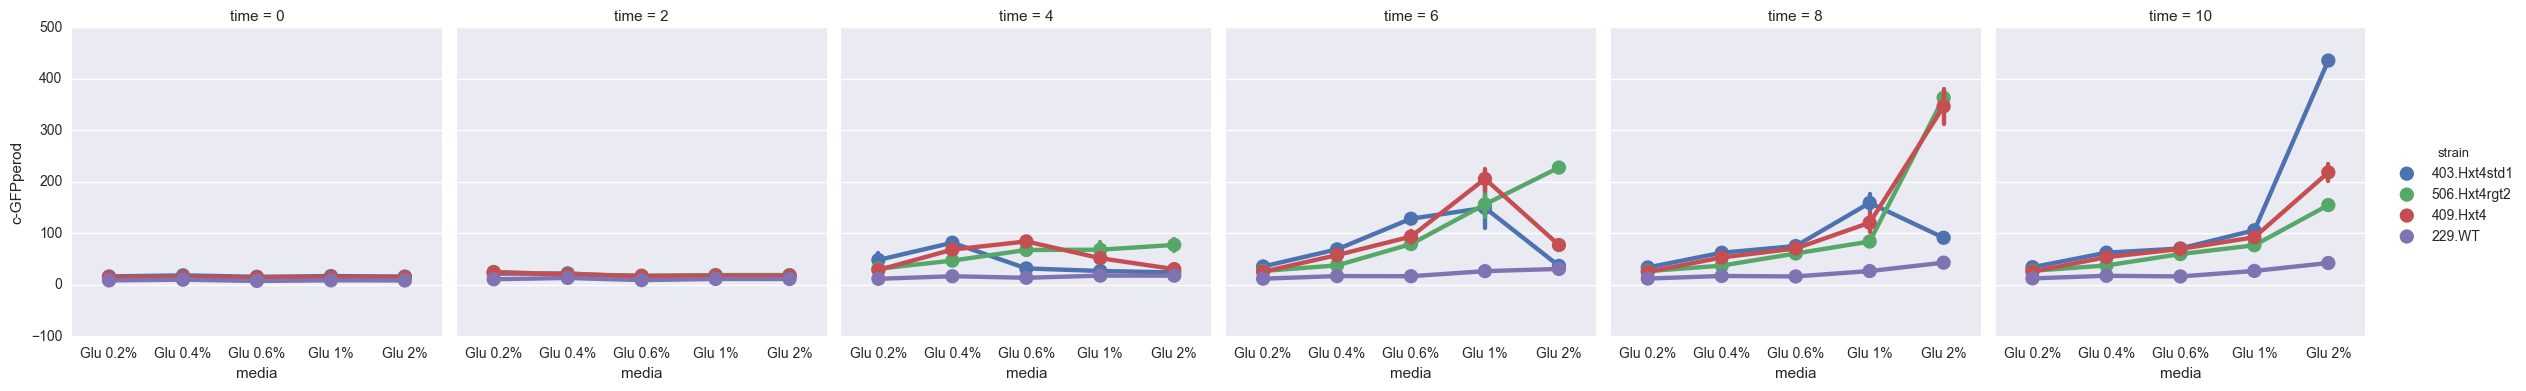

In [98]:
sns.factorplot(x='media', y='c-GFPperod',hue= 'strain', col='time', data=tidydf)


conclusion: the glucose dependency of Hxt4 depends heavily on time.



## Scatter plot coloured by a third variable

Often what we want to do is to generate a 2d scatterplot and color the dots by another variable. the function colorScatter does this for any 3 variables stored in time series. 

First we plot growth reate over time, coloring by the gene fluorescence



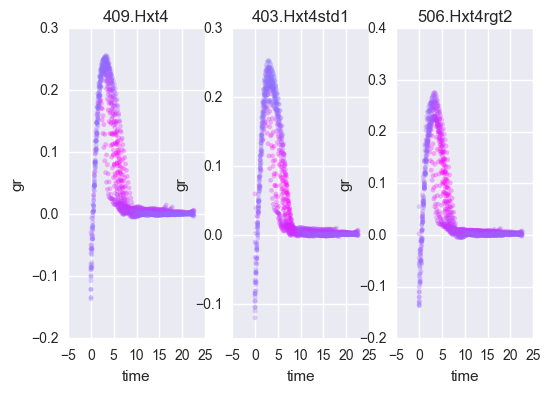

In [114]:
alpha=0.3
plt.subplot(131)
xstat='time'
ystat='gr'
stat='c-GFPperod'
strain='409.Hxt4'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
plt.title(strain)
plt.subplot(132)
strain='403.Hxt4std1'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
plt.title(strain)
plt.subplot(133)
strain='506.Hxt4rgt2'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
plt.title(strain)


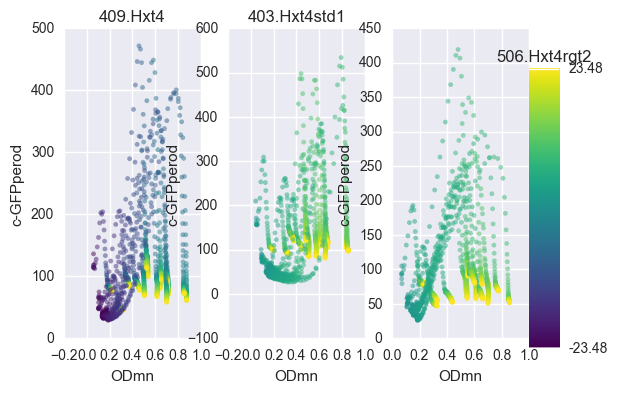

In [122]:
alpha=0.5
plt.subplot(131)
xstat='ODmn'
ystat='c-GFPperod'
stat='time'
strain='409.Hxt4'
cmap='viridis'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, symmetric=False,alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, symmetric=False,alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, symmetric=False,alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100,symmetric=False, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100,symmetric=False, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, symmetric=False,alpha=alpha)
plt.title(strain)
plt.subplot(132)
strain='403.Hxt4std1'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha)
plt.title(strain)
plt.subplot(133)
strain='506.Hxt4rgt2'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha, addLegend=True)
plt.title(strain)


It looks like Hxt4 expression is always allocated to the 'drop in growth' regime.

# Analysis of point statistics through dataframes and seaborn 


## Extracting single-point statistics of all experiments

We are usually interested in one point-statistics about our strains. We will extract a lot of useful statistics and put them into a very nice pandas dataframe, which we will use for analysis. we want to exclude the media conditions, which are irrelevant and provide a lot of missing values. 





In [116]:
hxt4df=xpr.extractAllInfo(excludeNull=True)
hxt4df

extracting 403.Hxt4std1 in Glu 0.4%
extracting 506.Hxt4rgt2 in Glu 0.4%
extracting 409.Hxt4 in Glu 0.4%
extracting 229.WT in Glu 0.4%
extracting 403.Hxt4std1 in Glu 1%
extracting 506.Hxt4rgt2 in Glu 1%
extracting 409.Hxt4 in Glu 1%
extracting 229.WT in Glu 1%
extracting 403.Hxt4std1 in Glu 1.5%
extracting 506.Hxt4rgt2 in Glu 1.5%
extracting 409.Hxt4 in Glu 1.5%
extracting 229.WT in Glu 1.5%
extracting 403.Hxt4std1 in Glu 2%
extracting 506.Hxt4rgt2 in Glu 2%
extracting 409.Hxt4 in Glu 2%
extracting 229.WT in Glu 2%
extracting 403.Hxt4std1 in Glu 0.2%
extracting 506.Hxt4rgt2 in Glu 0.2%
extracting 409.Hxt4 in Glu 0.2%
extracting 229.WT in Glu 0.2%
extracting 403.Hxt4std1 in Glu 0.6%
extracting 506.Hxt4rgt2 in Glu 0.6%
extracting 409.Hxt4 in Glu 0.6%
extracting 229.WT in Glu 0.6%
extracting 403.Hxt4std1 in Glu 0.8%
extracting 506.Hxt4rgt2 in Glu 0.8%
extracting 409.Hxt4 in Glu 0.8%
extracting 229.WT in Glu 0.8%


experiment         machine     media        strain  InitialOD  \
0   p20160701.pkl  Plate Reader 2  Glu 0.4%  403.Hxt4std1   0.179868   
1   p20160702.pkl  Plate Reader 2  Glu 0.4%  403.Hxt4std1   0.097033   
2   p20160701.pkl  Plate Reader 2  Glu 0.4%  506.Hxt4rgt2   0.145215   
3   p20160702.pkl  Plate Reader 2  Glu 0.4%  506.Hxt4rgt2   0.108281   
4   p20160701.pkl  Plate Reader 2  Glu 0.4%      409.Hxt4   0.148390   
5   p20160702.pkl  Plate Reader 2  Glu 0.4%      409.Hxt4   0.104999   
6   p20160701.pkl  Plate Reader 2  Glu 0.4%        229.WT   0.144191   
7   p20160702.pkl  Plate Reader 2  Glu 0.4%        229.WT   0.141769   
8   p20160701.pkl  Plate Reader 2    Glu 1%  403.Hxt4std1   0.182065   
9   p20160630.pkl  Plate Reader 2    Glu 1%  403.Hxt4std1   0.135943   
10  p20160704.pkl  Plate Reader 2    Glu 1%  403.Hxt4std1   0.165629   
11  p20160703.pkl  Plate Reader 2    Glu 1%  403.Hxt4std1   0.159572   
12  p20160629.pkl  Plate Reader 2    Glu 1%  403.Hxt4std1   0.090240   
13  p20160702.pkl  Plate Reader 2    Glu 1%  403.Hxt4std1   0.155605   
14  p20160701.pkl  Plate Reader 2    Glu 1%  506.Hxt4rgt2   0.143955   
15  p20160630.pkl  Plate Reader 2    Glu 1%  506.Hxt4rgt2   0.148384   
16  p20160704.pkl  Plate Reader 2    Glu 1%  506.Hxt4rgt2   0.180840   
17  p20160703.pkl  Plate Reader 2    Glu 1%  506.Hxt4rgt2   0.190679   
18  p20160629.pkl  Plate Reader 2    Glu 1%  506.Hxt4rgt2   0.115713   
19  p20160702.pkl  Plate Reader 2    Glu 1%  506.Hxt4rgt2   0.161146   
20  p20160701.pkl  Plate Reader 2    Glu 1%      409.Hxt4   0.145593   
21  p20160630.pkl  Plate Reader 2    Glu 1%      409.Hxt4   0.139596   
22  p20160704.pkl  Plate Reader 2    Glu 1%      409.Hxt4   0.174816   
23  p20160703.pkl  Plate Reader 2    Glu 1%      409.Hxt4   0.179708   
24  p20160629.pkl  Plate Reader 2    Glu 1%      409.Hxt4   0.108360   
25  p20160702.pkl  Plate Reader 2    Glu 1%      409.Hxt4   0.153791   
26  p20160701.pkl  Plate Reader 2    Glu 1%        229.WT   0.142993   
27  p20160630.pkl  Plate Reader 2    Glu 1%        229.WT   0.156449   
28  p20160704.pkl  Plate Reader 2    Glu 1%        229.WT   0.163717   
29  p20160703.pkl  Plate Reader 2    Glu 1%        229.WT   0.165323   
..            ...             ...       ...           ...        ...   
42  p20160630.pkl  Plate Reader 2    Glu 2%  506.Hxt4rgt2   0.141454   
43  p20160629.pkl  Plate Reader 2    Glu 2%  506.Hxt4rgt2   0.162889   
44  p20160630.pkl  Plate Reader 2    Glu 2%      409.Hxt4   0.134175   
45  p20160629.pkl  Plate Reader 2    Glu 2%      409.Hxt4   0.154877   
46  p20160630.pkl  Plate Reader 2    Glu 2%        229.WT   0.150542   
47  p20160629.pkl  Plate Reader 2    Glu 2%        229.WT   0.152487   
48  p20160630.pkl  Plate Reader 2  Glu 0.2%  403.Hxt4std1   0.139106   
49  p20160629.pkl  Plate Reader 2  Glu 0.2%  403.Hxt4std1   0.042972   
50  p20160630.pkl  Plate Reader 2  Glu 0.2%  506.Hxt4rgt2   0.152988   
51  p20160629.pkl  Plate Reader 2  Glu 0.2%  506.Hxt4rgt2   0.069496   
52  p20160630.pkl  Plate Reader 2  Glu 0.2%      409.Hxt4   0.145562   
53  p20160629.pkl  Plate Reader 2  Glu 0.2%      409.Hxt4   0.059580   
54  p20160630.pkl  Plate Reader 2  Glu 0.2%        229.WT   0.162455   
55  p20160629.pkl  Plate Reader 2  Glu 0.2%        229.WT   0.058362   
56  p20160704.pkl  Plate Reader 2  Glu 0.6%  403.Hxt4std1   0.162444   
57  p20160703.pkl  Plate Reader 2  Glu 0.6%  403.Hxt4std1   0.159221   
58  p20160704.pkl  Plate Reader 2  Glu 0.6%  506.Hxt4rgt2   0.186624   
59  p20160703.pkl  Plate Reader 2  Glu 0.6%  506.Hxt4rgt2   0.193136   
60  p20160704.pkl  Plate Reader 2  Glu 0.6%      409.Hxt4   0.177601   
61  p20160703.pkl  Plate Reader 2  Glu 0.6%      409.Hxt4   0.181965   
62  p20160704.pkl  Plate Reader 2  Glu 0.6%        229.WT   0.159846   
63  p20160703.pkl  Plate Reader 2  Glu 0.6%        229.WT   0.155800   
64  p20160704.pkl  Plate Reader 2  Glu 0.8%  403.Hxt4std1   0.160459   
65  p20160703.pkl  Plate Reader 2  Glu 0.8%  40

We can see that hxt4df contains the stats for each condition in each experiment.

* Note: extractAllInfo() also extracts time series in the form of a string in the variables ending with description ending in 'TS'.

## Using seaborn to easily plot single point statistics

The seaborn plotting library is very helpful in plotting data contained in a dataframe, particularly because it allows to seamlessly create comparative plots of data subgroups. it is related to R's ggplot2 though not quite the same. 

Seaborn plots come with predefined color maps and palettes to use, but if you are interested in building your own custom colormaps [here is a useful reference](http://seaborn.pydata.org/tutorial/color_palettes.html)


First, we want to obtain a classic monod curve that explains how the max growth rate is determined by the amount of available nutrient. 

We show how the final OD is a proxy for the amount of glucose in the medium, and build upon that.



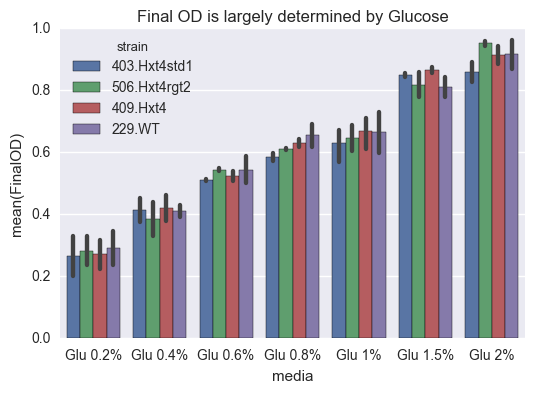

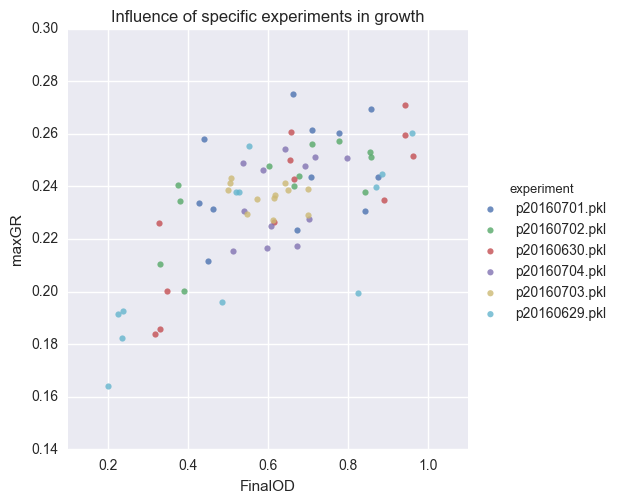

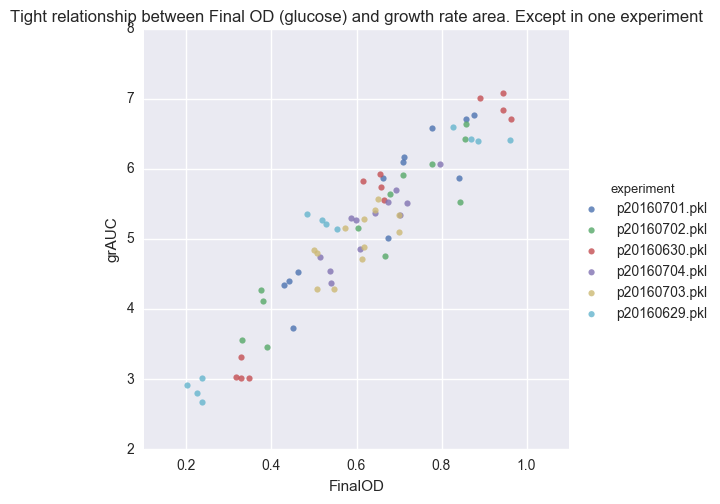

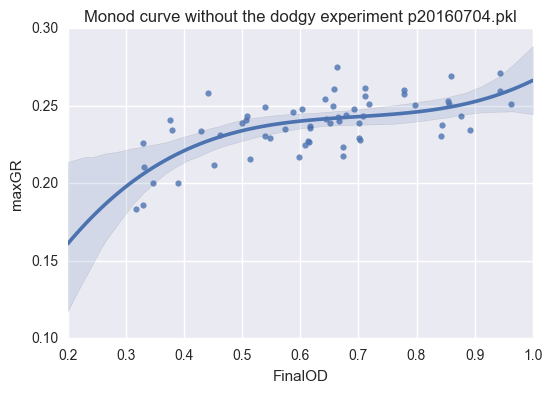

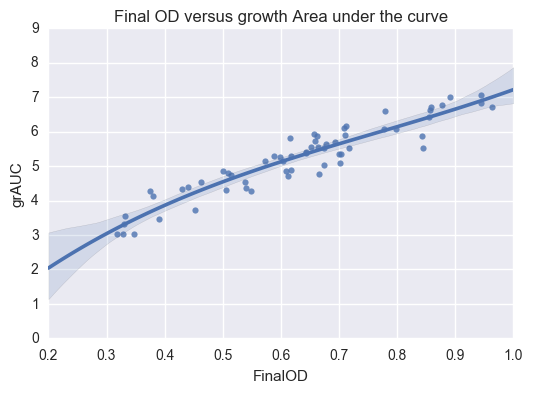

In [117]:

sns.barplot('media','FinalOD', order= ['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'], hue='strain', data=hxt4df)
plt.title('Final OD is largely determined by Glucose')
sns.lmplot('FinalOD','maxGR', hue='experiment', data=hxt4df, fit_reg=False)
plt.title('Influence of specific experiments in growth')
sns.lmplot('FinalOD','grAUC', hue='experiment', data=hxt4df, fit_reg=False)
plt.title('Tight relationship between Final OD (glucose) and growth rate area. Except in one experiment')
###monod curve excluding weird experiment
plt.figure()
hxt4df=ac.DFsubset(hxt4df, 'experiment', [ 'p20160630.pkl', 'p20160701.pkl', 'p20160702.pkl','p20160703.pkl', 'p20160704.pkl'])
sns.regplot('FinalOD','maxGR', data=hxt4df, order=3)
plt.title('Monod curve without the dodgy experiment p20160704.pkl')
##same plot without fittig the regression
plt.figure()
sns.regplot('FinalOD','grAUC', data=hxt4df, order=3)
plt.title('Final OD versus growth Area under the curve')

The results above show that one of the experiments included shows a dodgy behabiour with regard to the others. This opens the possibility to consider it an outlier.

<b>NOTE</b>: if growth looks oddly different than that from the other experiments, then it is probably worth rerunning getstats() on that experiment in case the gaussian process fit was suboptimal.

## Bar plots to compare statistics between media and strains

Naturally, we want to compare the expression obtained for all strains in all media. Normally ths would require plenty of code to organize the data and then format a plot. 

With seaborn, we do one-liners:

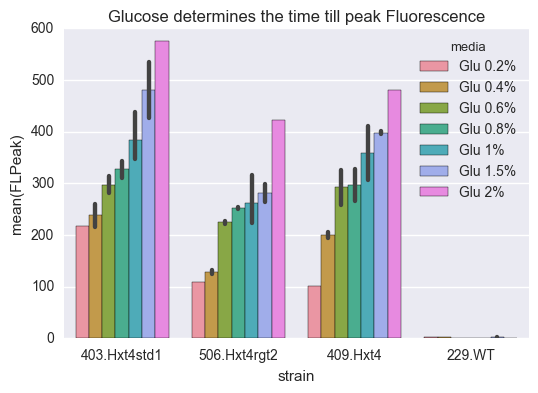

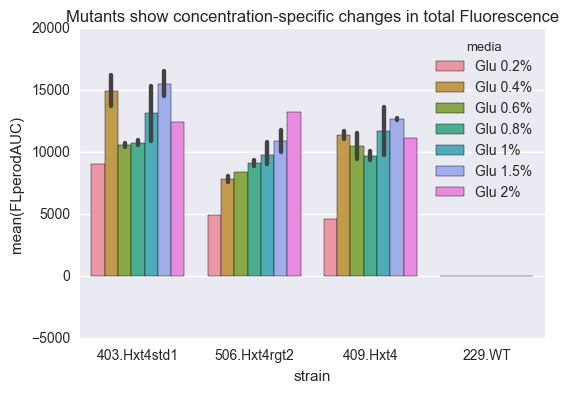

In [118]:
sns.barplot('strain', 'FLPeak', data=hxt4df, hue='media', hue_order= ['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'])
plt.title('Glucose determines the time till peak Fluorescence')
plt.figure()
sns.barplot('strain', 'FLperodAUC', data=hxt4df, hue='media', hue_order= ['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'])
plt.title('Mutants show concentration-specific changes in total Fluorescence')

## Linear models between variables 

### (Glucose vs FL Peak time)
We would like to know if the fluorescence peak time changes with glucose (proxied here by FinalOD) 
and with different genetic backgrounds.

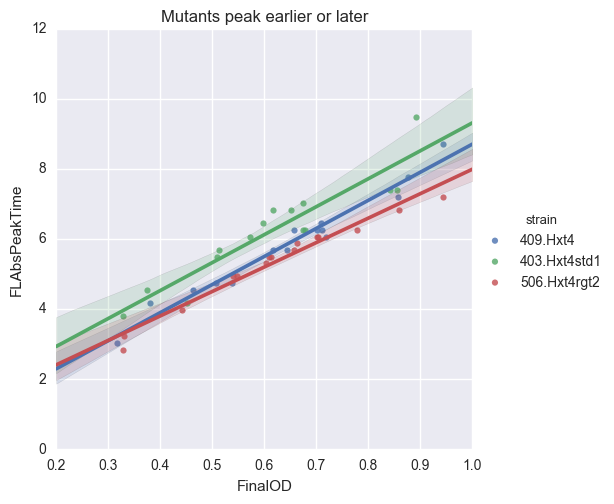

In [119]:
sns.lmplot('FinalOD', 'FLAbsPeakTime', hue='strain',data=ac.DFsubset(hxt4df, 'strain', ['409.Hxt4', '403.Hxt4std1','506.Hxt4rgt2']))
plt.title('Mutants peak earlier or later')

# More fancy accesspr features coming soon...


## Plotting the distribution of nulls


      media strain
0    Glu 1%   null
1  Glu 0.2%   null
2    Glu 2%   null
3  Glu 0.8%   null
4  Glu 0.6%   null
5  Glu 0.4%   null
6  Glu 1.5%   null
['p20160630.pkl', 'p20160704.pkl', 'p20160703.pkl', 'p20160702.pkl', 'p20160629.pkl', 'p20160701.pkl']
['p20160630.pkl', 'p20160629.pkl']
['p20160630.pkl', 'p20160629.pkl']
['p20160704.pkl', 'p20160703.pkl']
['p20160704.pkl', 'p20160703.pkl']
['p20160702.pkl', 'p20160701.pkl']
['p20160702.pkl', 'p20160701.pkl']


/Users/s1259407/anaconda3/lib/python3.5/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


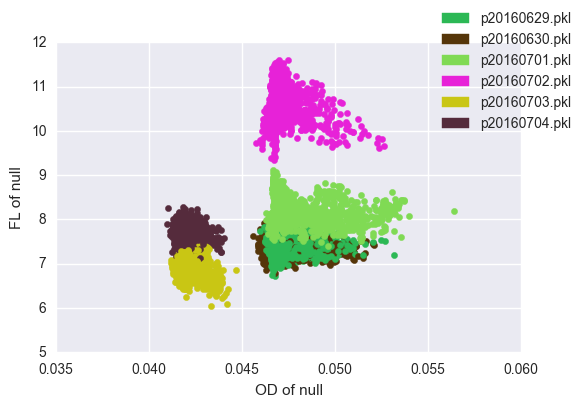

In [136]:
exptColors= colorDict(keys=xpr.allExperiments)
cl= ac.DFsubset(xpr.allContents, 'strain', ['null'])
cl=cl.reset_index(drop=True)
print(cl)
for j in range(0, np.size(cl, 0)):
    md=cl.loc[j, 'media']
    st=cl.loc[j, 'strain']
    xpr.containssetup(cl.loc[j, 'media'], cl.loc[j, 'strain'], strict=False)
    expts=xpr.containslist
    print(expts)
    for expt in expts:
        plt.scatter(xpr.data[expt].d[md][st]['OD'], xpr.data[expt].d[md][st][xpr.FL[expt]['mainFL']], color=exptColors[expt])
plt.xlabel('OD of null')
plt.ylabel('FL of null')
createFigLegend(dic=exptColors)

In [29]:
pickleFileFolder=homedir+'/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/processedPickles'
for expt in xpr.allExperiments:
    pickle.dump(xpr.data[expt], open(pickleFileFolder+'/'+expt, 'wb'))

In [25]:

pickleFileFolder


'/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/newPickles'